In [2]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
from math import e, pi
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization.bloch import Bloch
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram

In [2]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

In [3]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.circuit.library import QFT
import numpy as np

# 1. ÏûÖÎ†• Ïã†Ìò∏ Ï§ÄÎπÑ: ÏÉÅÌÉú |œà‚ü© = 1/sqrt(2)(|0‚ü© + |1‚ü©), |œÜ‚ü© = 1/2(sqrt(3)|0‚ü© + |1‚ü©)
psi = QuantumCircuit(1)
phi = QuantumCircuit(1)

# |œà‚ü© ÏÉÅÌÉú
psi.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)  # First qubit

# |œÜ‚ü© ÏÉÅÌÉú
phi.initialize([np.sqrt(3)/2, 1/2], 0)  # First qubit

state_psi = Statevector(phi)
state_phi = Statevector(psi)

psi_data = state_psi.data
phi_data = state_phi.data

print(psi_data, phi_data)
convolution_result = np.array([psi_data[0]*phi_data[0]+psi_data[1]*phi_data[1],psi_data[0]*phi_data[1]+psi_data[1]*phi_data[0]])

# Ïª®Î≥ºÎ£®ÏÖò Í≤∞Í≥ºÎ•º ÏÉàÎ°úÏö¥ StatevectorÎ°ú Î≥ÄÌôò
result_state = Statevector(convolution_result)

# Í≤∞Í≥º Ï∂úÎ†•
print("Convolution result as a quantum state:")
print(result_state)

[0.8660254+0.j 0.5      +0.j] [0.70710678+0.j 0.70710678+0.j]
Convolution result as a quantum state:
Statevector([0.96592583+0.j, 0.96592583+0.j],
            dims=(2,))


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


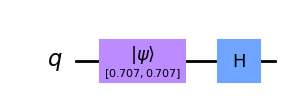

In [4]:
# 2. QFT Ï†ÅÏö©
qft_circuit = QFT(num_qubits=1).decompose()  # Create and decompose QFT for 2 qubits

psi_qft = psi.compose(qft_circuit)
psi_qft.draw('mpl')

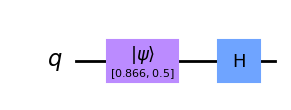

In [5]:
phi_qft = phi.compose(qft_circuit)
phi_qft.draw('mpl')

In [93]:
state_psi_qft = Statevector(psi_qft)
state_phi_qft = Statevector(phi_qft) 
print("|psi> = ", state_psi_qft)
print("|phi> = ", state_phi_qft)

element_wise = state_psi_qft.data * state_phi_qft.data
element_wise_result_state = Statevector(element_wise)

print("Element-wise product result = ", element_wise_result_state)
coeff = np.absolute(element_wise_result_state.data[0])
element_wise_result_state = element_wise_result_state / np.linalg.norm(element_wise_result_state.data)
element_wise_result = QuantumCircuit(1)
element_wise_result.initialize(element_wise_result_state)
elemen_wise_result_qft = element_wise_result.compose(qft_circuit)
elemen_wise_result_qft.draw('mpl')

|psi> =  Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
|phi> =  Statevector([0.96592583+0.j, 0.25881905+0.j],
            dims=(2,))
Element-wise product result =  Statevector([0.96592583+0.j, 0.        +0.j],
            dims=(2,))


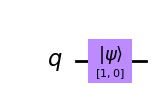

In [106]:
element_wise_result.draw('mpl')

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


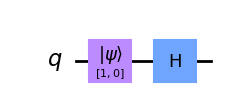

In [105]:
elemen_wise_result_qft.draw('mpl')

In [95]:
state_result_qft = Statevector(elemen_wise_result_qft)
state_result_qft = state_result_qft * np.sqrt(2) * coeff
state_result_qft

Statevector([0.96592583+0.j, 0.96592583+0.j],
            dims=(2,))


In [103]:
print( "Time domain convolution = ", result_state.data,"\n","Frequency domain multiplication = ",state_result_qft.data)

Time domain convolution =  [0.96592583+0.j 0.96592583+0.j] 
 Frequency domain multiplication =  [0.96592583+0.j 0.96592583+0.j]


# 3 qubits and 2 qubits Convolution

In [154]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.circuit.library import QFT
import numpy as np

In [209]:
# 1. ÏûÖÎ†• Ïã†Ìò∏ Ï§ÄÎπÑ: ÏÉÅÌÉú |œà‚ü© = 1/sqrt(2)(|0‚ü© + |1‚ü©), |œÜ‚ü© = 1/2(sqrt(3)|0‚ü© + |1‚ü©)
psi = QuantumCircuit(3)
phi = QuantumCircuit(2)

# |œà‚ü© ÏÉÅÌÉú
psi.h(range(0,3))  # First qubit

In [210]:
# |œÜ‚ü© ÏÉÅÌÉú
initial_state = np.array([1,np.sqrt(2),np.sqrt(3),2]) * (1/np.sqrt(10))

# 2-ÌÅêÎπó ÌöåÎ°ú ÏÉùÏÑ±
# Ï¥àÍ∏∞ ÏÉÅÌÉú ÏÑ§Ï†ï
phi.initialize(initial_state, [0, 1])

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


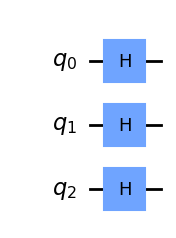

In [211]:
psi.draw('mpl')

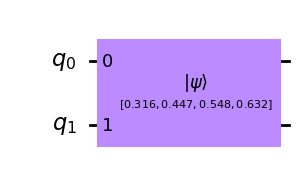

In [212]:
phi.draw('mpl')

In [160]:
state_psi = Statevector(phi)
state_phi = Statevector(psi)

psi_data = state_psi.data
phi_data = state_phi.data

print(psi_data, phi_data)
psi_real = psi_data.real
phi_real = phi_data.real

[0.31622777+0.j 0.4472136 +0.j 0.54772256+0.j 0.63245553+0.j] [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


In [162]:
# ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Ìï®Ïàò Ï†ïÏùò
def circular_convolution(x, y):
    L = len(y)  # yÏùò Í∏∏Ïù¥ (ÏàúÌôò Ï£ºÍ∏∞)
    N = len(x)  # xÏùò Í∏∏Ïù¥
    z = np.zeros(N)  # Í≤∞Í≥º Î∞∞Ïó¥ (xÏôÄ ÎèôÏùºÌïú Í∏∏Ïù¥)
    
    for v in range(N):  # xÏùò Í∞Å ÏöîÏÜåÏóê ÎåÄÌï¥
        for m in range(N):  # yÎ•º ÏàúÌôòÏ†ÅÏúºÎ°ú Ï†ëÍ∑º
            z[v] += x[m] * y[(v - m) % L]  # Î™®ÎìàÎ°ú Ïó∞ÏÇ∞ÏúºÎ°ú ÏàúÌôòÏ†Å Ï†ëÍ∑º
    return z


In [163]:
# ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≥ÑÏÇ∞
z = circular_convolution(psi_real, phi_real)

# Í≤∞Í≥º Ï∂úÎ†•
print("ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≤∞Í≥º:")
print(z)


ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≤∞Í≥º:
[0.68717325 0.68717325 0.68717325 0.68717325]


In [165]:
result_state = Statevector(z)

# Í≤∞Í≥º Ï∂úÎ†•
print("Convolution result as a quantum state:")
print(result_state)

Convolution result as a quantum state:
Statevector([0.68717325+0.j, 0.68717325+0.j, 0.68717325+0.j,
             0.68717325+0.j],
            dims=(2, 2))


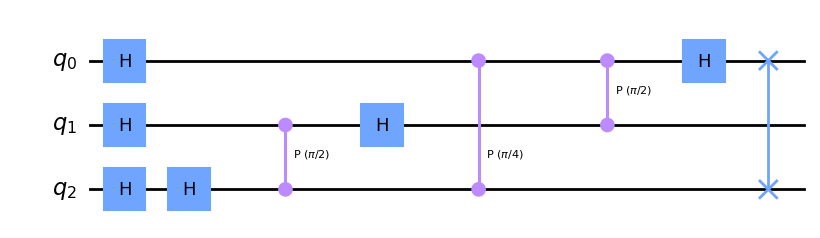

In [213]:
# 2. QFT Ï†ÅÏö©
qft_circuit = QFT(num_qubits=3).decompose()  # Create and decompose QFT for 2 qubits

psi_qft = psi.compose(qft_circuit)
psi_qft.draw('mpl')

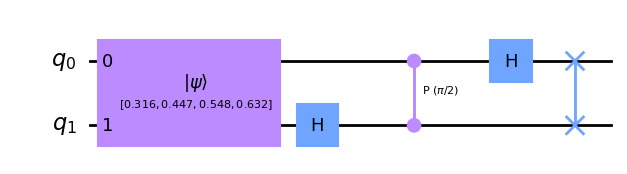

In [214]:
qft_circuit = QFT(num_qubits=2).decompose()
phi_qft = phi.compose(qft_circuit)
phi_qft.draw('mpl')

In [215]:
state_psi_qft = Statevector(psi_qft)
state_phi_qft = Statevector(phi_qft) 
print("|psi> = ", state_psi_qft)
print("|phi> = ", state_phi_qft)

|psi> =  Statevector([1.00000000e+00+0.00000000e+00j,
             1.55582133e-19+3.75608496e-19j,
             4.76210391e-18+4.76210391e-18j,
             1.55582133e-19+6.44442296e-20j,
             2.36158002e-17+0.00000000e+00j,
             1.55582133e-19-6.44442296e-20j,
             4.76210391e-18-4.76210391e-18j,
             1.55582133e-19-3.75608496e-19j],
            dims=(2, 2, 2))
|phi> =  Statevector([ 0.97180973+0.j        , -0.1157474 -0.09262097j,
             -0.1078594 +0.j        , -0.1157474 +0.09262097j],
            dims=(2, 2))


In [216]:
expanded_data = np.zeros(8, dtype=complex)  # 8Í∞úÏùò 0 Ï¥àÍ∏∞Ìôî
expanded_data[:4] = state_phi_qft.data  # ÏïûÏ™Ω 4Í∞úÏùò Ïä¨Î°ØÏóê |phi> Í∞í Î≥µÏÇ¨

# ÏÉàÎ°úÏö¥ ÏÉÅÌÉúÎ≤°ÌÑ∞ ÏÉùÏÑ±
phi_expanded = Statevector(expanded_data, dims=(2, 2, 2))

# Í≤∞Í≥º Ï∂úÎ†•
print("Expanded Statevector:")

print(phi_expanded)

Expanded Statevector:
Statevector([ 0.97180973+0.j        , -0.1157474 -0.09262097j,
             -0.1078594 +0.j        , -0.1157474 +0.09262097j,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


In [218]:
element_wise = state_psi_qft.data * phi_expanded.data
element_wise_result_state = Statevector(element_wise)

print("Element-wise product result = ", element_wise_result_state)
coeff = np.absolute(element_wise_result_state.data[0])
element_wise_result_state = element_wise_result_state / np.linalg.norm(element_wise_result_state.data)

Element-wise product result =  Statevector([ 9.71809726e-01+0.00000000e+00j,
              1.67809958e-20-5.78858730e-20j,
             -5.13637680e-19-5.13637680e-19j,
             -2.39771137e-20+6.95091606e-21j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2))


In [219]:
# Statevector Í∞ùÏ≤¥ ÏÉùÏÑ±
element_wise_result_state = Statevector(element_wise_result_state, dims=(2, 2, 2))

# Ïïû 4Í∞úÏùò ÏöîÏÜåÎßå ÏÑ†ÌÉù
trimmed_data = element_wise_result_state.data[:4]

# ÏÉàÎ°úÏö¥ 2-qubit Statevector ÏÉùÏÑ±
trimmed_state = Statevector(trimmed_data, dims=(2, 2))

# Í≤∞Í≥º Ï∂úÎ†•
print("Trimmed Statevector:")
print(trimmed_state)

Trimmed Statevector:
Statevector([ 1.00000000e+00+0.00000000e+00j,
              1.72677793e-20-5.95650275e-20j,
             -5.28537292e-19-5.28537292e-19j,
             -2.46726422e-20+7.15254837e-21j],
            dims=(2, 2))


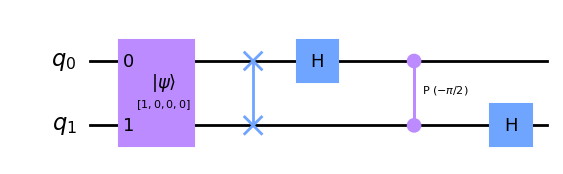

In [220]:
element_wise_result = QuantumCircuit(2)
element_wise_result.initialize(trimmed_state, [0,1,])
qft_circuit = QFT(num_qubits=2, inverse=True).decompose()
elemen_wise_result_qft = element_wise_result.compose(qft_circuit)
elemen_wise_result_qft.draw('mpl')

In [221]:
state_result_qft = Statevector(elemen_wise_result_qft)
state_result_qft = state_result_qft  * np.sqrt(2) * coeff
state_result_qft

Statevector([0.68717325-3.99213140e-19j, 0.68717325+3.34376351e-19j,
             0.68717325-3.27180233e-19j, 0.68717325+3.92017022e-19j],
            dims=(2, 2))


In [222]:
print( "Time domain convolution = ", result_state.data,"\n","Frequency domain multiplication = ",state_result_qft.data)

Time domain convolution =  [0.68717325+0.j 0.68717325+0.j 0.68717325+0.j 0.68717325+0.j] 
 Frequency domain multiplication =  [0.68717325-3.99213140e-19j 0.68717325+3.34376351e-19j
 0.68717325-3.27180233e-19j 0.68717325+3.92017022e-19j]


## Time Measurement

In [188]:
import time
import timeit
import cProfile

### Classical

In [4]:
def circular_convolution(x, y):
    L = len(y)  # yÏùò Í∏∏Ïù¥ (ÏàúÌôò Ï£ºÍ∏∞)
    N = len(x)  # xÏùò Í∏∏Ïù¥
    z = np.zeros(N)  # Í≤∞Í≥º Î∞∞Ïó¥ (xÏôÄ ÎèôÏùºÌïú Í∏∏Ïù¥)
    
    for v in range(N):  # xÏùò Í∞Å ÏöîÏÜåÏóê ÎåÄÌï¥
        for m in range(N):  # yÎ•º ÏàúÌôòÏ†ÅÏúºÎ°ú Ï†ëÍ∑º
            z[v] += x[m] * y[(v - m) % L]  # Î™®ÎìàÎ°ú Ïó∞ÏÇ∞ÏúºÎ°ú ÏàúÌôòÏ†Å Ï†ëÍ∑º
    return z

In [183]:
# ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≥ÑÏÇ∞
start = time.time()
psi_classic = np.array([1,1,1,1,1,1,1,1]) * (1/np.sqrt(8))
phi_classic = np.array([1,np.sqrt(2),np.sqrt(3),np.sqrt(4)]) * (1/np.sqrt(10))

z = circular_convolution(phi_classic,psi_classic)
end = time.time()

# Í≤∞Í≥º Ï∂úÎ†•
print("ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≤∞Í≥º:")
print(z)
print(f"{end - start:.5f} sec")


ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≤∞Í≥º:
[0.68717325 0.68717325 0.68717325 0.68717325]
0.00000 sec


In [185]:
code_to_test = """
psi_classic = np.array([1,1,1,1,1,1,1,1]) * (1/np.sqrt(8))
phi_classic = np.array([1,np.sqrt(2),np.sqrt(3),np.sqrt(4)]) * (1/np.sqrt(10))

z = circular_convolution(phi_classic,psi_classic)
"""

execution_time = timeit.timeit(code_to_test, globals=globals(), number=10000)
print(f"Execution time for 10,000 runs: {execution_time:.5f} seconds")

Execution time for 10,000 runs: 0.21080 seconds


In [ ]:
def calculate():
    psi_classic = np.array([1,1,1,1,1,1,1,1]) * (1/np.sqrt(8))
    phi_classic = np.array([1,np.sqrt(2),np.sqrt(3),np.sqrt(4)]) * (1/np.sqrt(10))

    z = circular_convolution(phi_classic,psi_classic)
    print(z)

cProfile.run("calculate()")

[0.68717325 0.68717325 0.68717325 0.68717325]
         185 function calls (181 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1372850889.py:1(circular_convolution)
        1    0.000    0.000    0.001    0.001 323326338.py:3(calculate)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 _ufunc_config.py:132(geterr)
        2    0.000    0.000    0.000    0.000 _ufunc_config.py:33(seterr)
        1    0.000    0.000    0.000    0.000 _ufunc_config.py:426(__init__)
        1    0.000    0.000    0.000    0.000 _ufunc_config.py:430(__enter__)
        1    0.000    0.000    0.000    0.000 _ufunc_config.py:435(__exit__)
        4    0.000    0.000    0.000    0.000 arrayprint.py:1018(__call__)
        1    0.000    0.000    0.000    0.000 arrayprint.py:1595(_array_str_implementation)
        1    

### Quantum circuit

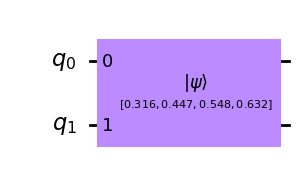

In [204]:
phi = QuantumCircuit(2)
initial_state = np.array([1,np.sqrt(2),np.sqrt(3),2]) * (1/np.sqrt(10))  # |00>, |01>, |10>, |11>Ïóê ÎåÄÌïú Í≥ÑÏàò

# 2-ÌÅêÎπó ÌöåÎ°ú ÏÉùÏÑ±
# Ï¥àÍ∏∞ ÏÉÅÌÉú ÏÑ§Ï†ï
phi.initialize(initial_state, [0, 1])
phi.draw('mpl')

In [ ]:
start = time.time()
# 1. ÏûÖÎ†• Ïã†Ìò∏ Ï§ÄÎπÑ: ÏÉÅÌÉú |œà‚ü© = 1/sqrt(2)(|0‚ü© + |1‚ü©), |œÜ‚ü© = 1/2(sqrt(3)|0‚ü© + |1‚ü©)
psi = QuantumCircuit(3)
phi = QuantumCircuit(2)

# |œà‚ü© ÏÉÅÌÉú
psi.h(range(0,3))  # First qubit

# |œÜ‚ü© ÏÉÅÌÉú
initial_state = np.array([1,np.sqrt(2),np.sqrt(3),2]) * (1/np.sqrt(10))

# 2-ÌÅêÎπó ÌöåÎ°ú ÏÉùÏÑ±
# Ï¥àÍ∏∞ ÏÉÅÌÉú ÏÑ§Ï†ï
phi.initialize(initial_state, [0, 1])

# 2. QFT Ï†ÅÏö©
qft_circuit = QFT(num_qubits=3).decompose()  # Create and decompose QFT for 2 qubits
psi_qft = psi.compose(qft_circuit)

qft_circuit = QFT(num_qubits=2).decompose()
phi_qft = phi.compose(qft_circuit)

state_psi_qft = Statevector(psi_qft)
state_phi_qft = Statevector(phi_qft) 

expanded_data = np.zeros(8, dtype=complex)  # 8Í∞úÏùò 0 Ï¥àÍ∏∞Ìôî
expanded_data[:4] = state_phi_qft.data  # ÏïûÏ™Ω 4Í∞úÏùò Ïä¨Î°ØÏóê |phi> Í∞í Î≥µÏÇ¨

# ÏÉàÎ°úÏö¥ ÏÉÅÌÉúÎ≤°ÌÑ∞ ÏÉùÏÑ±
phi_expanded = Statevector(expanded_data, dims=(2, 2, 2))

element_wise = state_psi_qft.data * phi_expanded.data
element_wise_result_state = Statevector(element_wise)

#print("Element-wise product result = ", element_wise_result_state)
coeff = np.absolute(element_wise_result_state.data[0])
element_wise_result_state = element_wise_result_state / np.linalg.norm(element_wise_result_state.data)

# Statevector Í∞ùÏ≤¥ ÏÉùÏÑ±
element_wise_result_state = Statevector(element_wise_result_state, dims=(2, 2, 2))

# Ïïû 4Í∞úÏùò ÏöîÏÜåÎßå ÏÑ†ÌÉù
trimmed_data = element_wise_result_state.data[:4]

# ÏÉàÎ°úÏö¥ 2-qubit Statevector ÏÉùÏÑ±
trimmed_state = Statevector(trimmed_data, dims=(2, 2))

element_wise_result = QuantumCircuit(2)
element_wise_result.initialize(trimmed_state, [0,1,])
elemen_wise_result_qft = element_wise_result.compose(qft_circuit)

state_result_qft = Statevector(elemen_wise_result_qft)
state_result_qft = state_result_qft  * np.sqrt(2) * coeff

end = time.time()
print("Frequency domain multiplication = ",state_result_qft.data)
print(f"{end - start:.5f} sec")

Frequency domain multiplication =  [0.68717325-3.99213140e-19j 0.68717325+3.92017022e-19j
 0.68717325-3.27180233e-19j 0.68717325+3.34376351e-19j]
0.00898 sec


In [206]:
code_to_test = """
psi = QuantumCircuit(3)
phi = QuantumCircuit(2)

# |œà‚ü© ÏÉÅÌÉú
psi.h(range(0,3))  # First qubit

# |œÜ‚ü© ÏÉÅÌÉú
initial_state = np.array([1,np.sqrt(2),np.sqrt(3),2]) * (1/np.sqrt(10))

# 2-ÌÅêÎπó ÌöåÎ°ú ÏÉùÏÑ±
# Ï¥àÍ∏∞ ÏÉÅÌÉú ÏÑ§Ï†ï
phi.initialize(initial_state, [0, 1])

# 2. QFT Ï†ÅÏö©
qft_circuit = QFT(num_qubits=3).decompose()  # Create and decompose QFT for 2 qubits
psi_qft = psi.compose(qft_circuit)

qft_circuit = QFT(num_qubits=2).decompose()
phi_qft = phi.compose(qft_circuit)

state_psi_qft = Statevector(psi_qft)
state_phi_qft = Statevector(phi_qft) 

expanded_data = np.zeros(8, dtype=complex)  # 8Í∞úÏùò 0 Ï¥àÍ∏∞Ìôî
expanded_data[:4] = state_phi_qft.data  # ÏïûÏ™Ω 4Í∞úÏùò Ïä¨Î°ØÏóê |phi> Í∞í Î≥µÏÇ¨

# ÏÉàÎ°úÏö¥ ÏÉÅÌÉúÎ≤°ÌÑ∞ ÏÉùÏÑ±
phi_expanded = Statevector(expanded_data, dims=(2, 2, 2))

element_wise = state_psi_qft.data * phi_expanded.data
element_wise_result_state = Statevector(element_wise)

#print("Element-wise product result = ", element_wise_result_state)
coeff = np.absolute(element_wise_result_state.data[0])
element_wise_result_state = element_wise_result_state / np.linalg.norm(element_wise_result_state.data)

# Statevector Í∞ùÏ≤¥ ÏÉùÏÑ±
element_wise_result_state = Statevector(element_wise_result_state, dims=(2, 2, 2))

# Ïïû 4Í∞úÏùò ÏöîÏÜåÎßå ÏÑ†ÌÉù
trimmed_data = element_wise_result_state.data[:4]

# ÏÉàÎ°úÏö¥ 2-qubit Statevector ÏÉùÏÑ±
trimmed_state = Statevector(trimmed_data, dims=(2, 2))

element_wise_result = QuantumCircuit(2)
element_wise_result.initialize(trimmed_state, [0,1,])
elemen_wise_result_qft = element_wise_result.compose(qft_circuit)

state_result_qft = Statevector(elemen_wise_result_qft)
state_result_qft = state_result_qft  * np.sqrt(2) * coeff
"""

execution_time = timeit.timeit(code_to_test, globals=globals(), number=10000)
print(f"Execution time for 10,000 runs: {execution_time:.5f} seconds")

Execution time for 10,000 runs: 44.98073 seconds


In [208]:
def calculate():
    psi = QuantumCircuit(3)
    phi = QuantumCircuit(2)

    # |œà‚ü© ÏÉÅÌÉú
    psi.h(range(0,3))  # First qubit

    # |œÜ‚ü© ÏÉÅÌÉú
    initial_state = np.array([1,np.sqrt(2),np.sqrt(3),2]) * (1/np.sqrt(10))

    # 2-ÌÅêÎπó ÌöåÎ°ú ÏÉùÏÑ±
    # Ï¥àÍ∏∞ ÏÉÅÌÉú ÏÑ§Ï†ï
    phi.initialize(initial_state, [0, 1])

    # 2. QFT Ï†ÅÏö©
    qft_circuit = QFT(num_qubits=3).decompose()  # Create and decompose QFT for 2 qubits
    psi_qft = psi.compose(qft_circuit)

    qft_circuit = QFT(num_qubits=2).decompose()
    phi_qft = phi.compose(qft_circuit)

    state_psi_qft = Statevector(psi_qft)
    state_phi_qft = Statevector(phi_qft) 

    expanded_data = np.zeros(8, dtype=complex)  # 8Í∞úÏùò 0 Ï¥àÍ∏∞Ìôî
    expanded_data[:4] = state_phi_qft.data  # ÏïûÏ™Ω 4Í∞úÏùò Ïä¨Î°ØÏóê |phi> Í∞í Î≥µÏÇ¨

    # ÏÉàÎ°úÏö¥ ÏÉÅÌÉúÎ≤°ÌÑ∞ ÏÉùÏÑ±
    phi_expanded = Statevector(expanded_data, dims=(2, 2, 2))

    element_wise = state_psi_qft.data * phi_expanded.data
    element_wise_result_state = Statevector(element_wise)

    #print("Element-wise product result = ", element_wise_result_state)
    coeff = np.absolute(element_wise_result_state.data[0])
    element_wise_result_state = element_wise_result_state / np.linalg.norm(element_wise_result_state.data)

    # Statevector Í∞ùÏ≤¥ ÏÉùÏÑ±
    element_wise_result_state = Statevector(element_wise_result_state, dims=(2, 2, 2))

    # Ïïû 4Í∞úÏùò ÏöîÏÜåÎßå ÏÑ†ÌÉù
    trimmed_data = element_wise_result_state.data[:4]

    # ÏÉàÎ°úÏö¥ 2-qubit Statevector ÏÉùÏÑ±
    trimmed_state = Statevector(trimmed_data, dims=(2, 2))

    element_wise_result = QuantumCircuit(2)
    element_wise_result.initialize(trimmed_state, [0,1,])
    elemen_wise_result_qft = element_wise_result.compose(qft_circuit)

    state_result_qft = Statevector(elemen_wise_result_qft)
    state_result_qft = state_result_qft  * np.sqrt(2) * coeff

    print("Frequency domain multiplication = ",state_result_qft.data)

cProfile.run("calculate()")

Frequency domain multiplication =  [0.68717325-3.99213140e-19j 0.68717325+3.92017022e-19j
 0.68717325-3.27180233e-19j 0.68717325+3.34376351e-19j]
         14018 function calls (13530 primitive calls) in 0.018 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.018    0.018 3831187040.py:1(calculate)
       10    0.000    0.000    0.000    0.000 <frozen _collections_abc>:812(__init__)
      266    0.000    0.000    0.000    0.000 <frozen abc>:117(__instancecheck__)
       44    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
       26    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1101(_sanity_check)
       26    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1165(_find_and_load)
       26    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1192(_gcd_import)
       25    0.000    0.000    0.000    0.000 <frozen importlib._boots

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT
import numpy as np

# Ï¥àÍ∏∞ ÏÉÅÌÉú |psi>ÏôÄ |phi>
psi = [1/np.sqrt(2), 1/np.sqrt(2)]  # |psi> = 1/sqrt(2) * (|0> + |1>)
phi = [1/2, np.sqrt(3)/2,1/2]           # |phi> = 1/2 * |0> + sqrt(3)/2 * |1>

# Qiskit StatevectorÎ°ú Î≥ÄÌôò
state_psi = Statevector(psi)
state_phi = Statevector(phi)

# Îëê ÏÉÅÌÉúÎ•º Î≥ëÌï© (ÌÖêÏÑúÍ≥±)
combined_state = state_psi.tensor(state_phi)

# QFT Ï†ÅÏö©ÏùÑ ÏúÑÌïú ÌöåÎ°ú ÏÉùÏÑ±
num_qubits = int(np.log2(len(combined_state.data)))  # Î≥ëÌï©Îêú ÏÉÅÌÉúÏùò Ï†ÑÏ≤¥ ÌÄ¥Îπó Ïàò
qft_circuit = QFT(num_qubits, do_swaps=False)        # QFT ÌöåÎ°ú ÏÉùÏÑ±

# QFT Ï†ÅÏö©
qft_result = combined_state.evolve(qft_circuit)

# QFT Í≤∞Í≥ºÏóêÏÑú element-wise multiplication ÏàòÌñâ
elementwise_product = qft_result.data * qft_result.data  # Îëê ÏÉÅÌÉúÎ•º ÏÑ±Î∂ÑÎ≥Ñ Í≥±ÏÖà

# Í≤∞Í≥ºÎ•º ÏÉàÎ°úÏö¥ StatevectorÎ°ú Î≥ÄÌôò
result_state = Statevector(elementwise_product)

# Í≤∞Í≥º Ï∂úÎ†•
print("Element-wise multiplication after QFT:")
print("Statevector:", result_state)


Element-wise multiplication after QFT:
Statevector: Statevector([ 9.33012702e-01+0.00000000e+00j,
              6.69872981e-02+0.00000000e+00j,
             -5.50479898e-35+4.33518933e-35j,
             -5.50479898e-35-4.33518933e-35j],
            dims=(2, 2))


In [ ]:
# ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≥ÑÏÇ∞
z = circular_convolution(psi_real, phi_real)

# Í≤∞Í≥º Ï∂úÎ†•
print("ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≤∞Í≥º:")
print(z)


In [7]:
image = np.array([0,1,0,0,1,0])
filter = np.array([0,1,0,1])
circular_convolution(image,filter)

array([1., 1., 1., 1., 1., 1.])

In [16]:
circular_convolution(filter,image)

array([0., 1., 1., 0.])

In [15]:
np.convolve(image,filter)

array([0, 0, 1, 0, 1, 1, 0, 1, 0])

In [13]:
image.reshape(-1,3)
filter.reshape(-1,2)

array([[0, 1],
       [0, 1]])

In [9]:
import scipy
from scipy import signal
from scipy.signal import convolve2d

convolve2d(image,filter)

ValueError: convolve2d inputs must both be 2-D arrays

In [2]:
import numpy as np

# Input image and filter
I = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
F = np.array([[1, 0],
              [0, 1]])

# Flatten input and filter
I_flat = I.flatten()
F_flat = F.flatten()

# Compute 1D convolution
window_size = F_flat.size
output_1d = np.array([
    np.sum(I_flat[i:i+window_size] * F_flat)
    for i in range(len(I_flat) - window_size + 1)
])

# Correctly reshape 1D output to match the 2D output shape
output_2d_shape = (I.shape[0] - F.shape[0] + 1, I.shape[1] - F.shape[1] + 1)  # (2, 2)
output_2d = output_1d[:np.prod(output_2d_shape)].reshape(output_2d_shape)

print("1D Output:", output_1d)
print("2D Output:\n", output_2d)


1D Output: [ 5  7  9 11 13 15]
2D Output:
 [[ 5  7]
 [ 9 11]]


In [7]:
I.shape

(3, 3)

In [5]:
I_flat

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
for i in range(len(I_flat) - window_size + 1):
    print(i)

0
1
2
3
4
5


In [4]:
window_size

4

In [3]:
output_1d

array([ 5,  7,  9, 11, 13, 15])

In [56]:
import numpy as np

def sliding_window_1d(image, filter_size):
    """Generates a sliding window matrix for the given image and filter size."""
    n = image.shape[0]
    k = filter_size
    output_size = (n - k + 1) ** 2
    patch_size = k * k

    # Generate sliding window patches
    patches = []
    for i in range(n - k + 1):
        for j in range(n - k + 1):
            patch = image[i:i+k, j:j+k].flatten()
            patches.append(patch)
    return np.array(patches)

def flatten_1d_convolution(image, kernel):
    """Computes 1D convolution equivalent to 2D convolution."""
    # Extract sliding window patches
    patches = sliding_window_1d(image, kernel.shape[0])
    kernel_flat = kernel.flatten()

    # Compute dot product for 1D convolution
    result = patches @ kernel_flat
    output_size = (image.shape[0] - kernel.shape[0] + 1, 
                   image.shape[1] - kernel.shape[1] + 1)
    return result.reshape(output_size)

# Input 2D image and kernel
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
kernel = np.array([[1, 0],
                   [0, 1]])

# Perform 1D convolution
output = flatten_1d_convolution(image, kernel)
print("2D Convolution result using 1D approach:\n", output)


2D Convolution result using 1D approach:
 [[ 6  8]
 [12 14]]


In [57]:
filter_flat = filter.flatten()
filter_flat
for i, coeff in enumerate(filter_flat):

    print(int(np.floor(np.sqrt(i))))

0
1
1
1


In [58]:
image.size

9

In [59]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np

def encode_image(qc, image):
    """Encodes the image into quantum amplitudes."""
    n = image.size
    norm = np.linalg.norm(image)
    normalized = image.flatten() / norm
    qc.initialize(normalized, range(int(np.log2(n))))

def apply_filter(qc, filter, image_size):
    """Applies a quantum filter operation by mapping filter values to states."""
    # Flatten and normalize filter (optional, if normalization is required)
    filter_flat = filter.flatten()
    
    # Apply RY rotations corresponding to the filter coefficients
    n_states = image_size**2  # Number of states
    for i, coeff in enumerate(filter_flat):
        if coeff != 0:
            angle = 2 * np.arcsin(coeff)  # Map filter value to rotation angle
            qc.ry(angle, int(np.floor(np.sqrt(i)))) # Apply rotation to the corresponding state

# Define 2x2 image and 2x2 filter
image = np.array([[1, 2],
                  [3, 4]])
filter = np.array([[1, 0],
                   [0, -1]])

# Quantum circuit setup  
n_qubits = int(np.log2(image.size))  # 2 qubits for 2x2 image
qc = QuantumCircuit(n_qubits)

# Encode image and apply filter
encode_image(qc, image)
apply_filter(qc, filter, image.size)

# Display circuit
print("Quantum Circuit:")
print(qc)


Quantum Circuit:
     ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê 
q_0: ‚î§0                                            ‚îú‚î§ Ry(œÄ) ‚îú‚îÄ
     ‚îÇ  Initialize(0.18257,0.36515,0.54772,0.7303) ‚îÇ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îê
q_1: ‚î§1                                            ‚îú‚î§ Ry(-œÄ) ‚îú
     ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


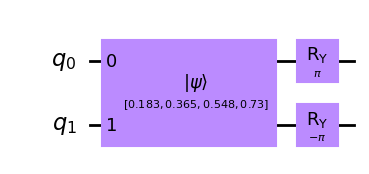

In [60]:
qc.draw('mpl')

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector

# Define 2D input and filter
image = np.array([[1, 2], [3, 4]])
filter_ = np.array([[1, 0], [0, -1]])

# Flatten the 2D arrays to 1D
image_flattened = image.flatten()
filter_flattened = filter_.flatten()

# Normalize for amplitude encoding
image_norm = image_flattened / np.linalg.norm(image_flattened)
filter_norm = filter_flattened / np.linalg.norm(filter_flattened)

# Create Quantum Circuit
n_qubits = int(np.ceil(np.log2(len(image_flattened))))
qc = QuantumCircuit(n_qubits)

# Amplitude encoding
def amplitude_encoding(qc, data):
    for i, amp in enumerate(data):
        if amp != 0:
            angle = 2 * np.arcsin(np.sqrt(abs(amp)))
            qc.ry(angle, i)

# Apply QFT
def qft(qc, n):
    for i in range(n):
        qc.h(i)
        for j in range(i + 1, n):
            qc.cp(np.pi / 2 ** (j - i), j, i)

# Apply IQFT
def iqft(qc, n):
    for i in range(n - 1, -1, -1):
        for j in range(i + 1, n):
            qc.cp(-np.pi / 2 ** (j - i), j, i)
        qc.h(i)

# Initialize and encode data
amplitude_encoding(qc, image_norm)
qft(qc, n_qubits)

# Apply filter in Fourier space
for i, coeff in enumerate(filter_norm):
    if coeff != 0:
        qc.ry(2 * np.arcsin(coeff), i)

# Inverse QFT
iqft(qc, n_qubits)

# Simulate and measure
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
state = Statevector(result.get_statevector(qc))

print("Resulting statevector (amplitude encoded convolution result):")
print(state)


CircuitError: 'Index 2 out of range for size 2.'

In [61]:
import numpy as np

# Original data
I = np.array([1, 2, 3, 4])
K = np.array([1, 0, 0, -1])

# Create masks for non-negative indices
mask = np.array([1 if n >= 0 else 0 for n in range(len(I))])

# Apply the mask to ignore negative indices
I_masked = I * mask
K_masked = K * mask

# Compute FT and IFT
FT_I = np.fft.fft(I_masked)
FT_K = np.fft.fft(K_masked)

# Convolution using FT
result = np.fft.ifft(FT_I * FT_K)

print("Convolution result:", result.real)


Convolution result: [-1. -1. -1.  3.]


# 2D image Convolution ÎπÑÍµê

In [66]:
import numpy as np

# Define a 2x2 input matrix
image = np.array([[1, 2],
                  [3, 4]])
filter=  np.array([[1,0],
                   [0,-1]])
# 2D Fourier Transform using numpy
ft_2d = np.fft.fft2(image)
ft_filter = np.fft.fft2(filter)

# Print the result
print("Original Image:")
print(image)

print("\n2D Fourier Transform:")
print(ft_2d)


print("Original Image:")
print(filter)

print("\n2D Fourier Transform:")
print(ft_filter)

Original Image:
[[1 2]
 [3 4]]

2D Fourier Transform:
[[10.+0.j -2.+0.j]
 [-4.+0.j  0.+0.j]]
Original Image:
[[ 1  0]
 [ 0 -1]]

2D Fourier Transform:
[[0.+0.j 2.+0.j]
 [2.+0.j 0.+0.j]]


In [68]:
# Element-wise multiplication in the Fourier domain
ft_result = ft_2d * ft_filter

# Inverse Fourier Transform to get the result back to spatial domain
result = np.fft.ifft2(ft_result)
result

array([[-3.+0.j, -1.+0.j],
       [ 1.+0.j,  3.+0.j]])

In [71]:
import numpy as np

def circular_convolution_2d(image, kernel):
    """
    2D ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖòÏùÑ ÏàòÌñâÌïòÎäî Ìï®Ïàò
    :param image: 2D ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ (numpy array)
    :param kernel: 2D Ïª§ÎÑê (numpy array)
    :return: 2D ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≤∞Í≥º (numpy array)
    """
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Í≤∞Í≥º Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
    result = np.zeros_like(image, dtype=float)

    # ÏàúÌôòÏ†Å Ïª®Î≥ºÎ£®ÏÖò ÏàòÌñâ
    for i in range(image_h):
        for j in range(image_w):
            for m in range(kernel_h):
                for n in range(kernel_w):
                    # ÏàúÌôòÏ†ÅÏúºÎ°ú Ïù∏Îç±Ïä§ Ï†ëÍ∑º
                    image_row = (i - m) % image_h
                    image_col = (j - n) % image_w
                    result[i, j] += image[image_row, image_col] * kernel[m, n]
    
    return result


In [72]:
circular_convolution_2d(image, filter)

array([[-3., -1.],
       [ 1.,  3.]])

## 2D image convolution with quantum circuit

In [15]:
# 1. ÏûÖÎ†• Ïã†Ìò∏ Ï§ÄÎπÑ: ÏÉÅÌÉú |œà‚ü© = 1/sqrt(2)(|0‚ü© + |1‚ü©), |œÜ‚ü© = 1/2(sqrt(3)|0‚ü© + |1‚ü©)
psi = QuantumCircuit(2)
phi = QuantumCircuit(2)

# |œà‚ü© ÏÉÅÌÉú
initial_psi_state = np.array([1,2,3,4]) * (1/np.sqrt(30))

# |œÜ‚ü© ÏÉÅÌÉú
initial_phi_state = np.array([1,0,0,-1]) * (1/np.sqrt(2))

psi.initialize(initial_psi_state,[0,1])
phi.initialize(initial_phi_state, [0, 1])

In [16]:
state_psi = Statevector(phi)
state_phi = Statevector(psi)

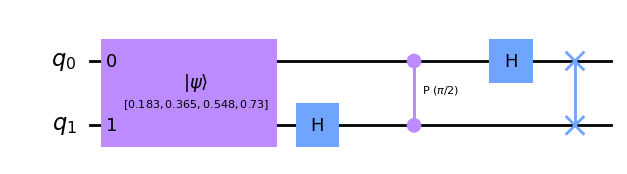

In [17]:
# 2. QFT Ï†ÅÏö©
qft_circuit = QFT(num_qubits=2).decompose()  # Create and decompose QFT for 2 qubits

psi_qft = psi.compose(qft_circuit)
phi_qft = phi.compose(qft_circuit)
psi_qft.draw('mpl')

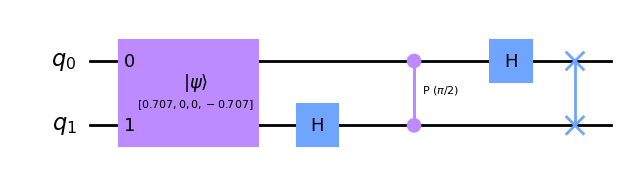

In [18]:
phi_qft.draw('mpl')

In [19]:
state_psi_qft = Statevector(psi_qft)
state_phi_qft = Statevector(phi_qft)
print(state_psi_qft)
print(state_phi_qft)

Statevector([ 0.91287093+0.j        , -0.18257419-0.18257419j,
             -0.18257419+0.j        , -0.18257419+0.18257419j],
            dims=(2, 2))
Statevector([2.29934717e-17+0.j        , 3.53553391e-01+0.35355339j,
             7.07106781e-01+0.j        , 3.53553391e-01-0.35355339j],
            dims=(2, 2))


In [152]:
element_wise = state_psi_qft.data * state_phi_qft.data
element_wise_state = Statevector(element_wise)
print("Element-wise multiplication result = ","\n",element_wise_state)
# element-wise Í≥±ÏÖà Í≤∞Í≥º ÌÅ¨Í∏∞Í∞Ä 1Ïù¥ ÏïÑÎãàÎØÄÎ°ú Ï†ïÍ∑úÌôî
element_wise_state_norm = element_wise_state / np.linalg.norm(element_wise_state.data)
print("Normalized element-wise multiplication = ","\n",element_wise_state_norm)

Element-wise multiplication result =  
 Statevector([ 2.09900719e-17+0.j        , -4.46641670e-18-0.12909944j,
             -1.29099445e-01+0.j        , -4.46641670e-18+0.12909944j],
            dims=(2, 2))
Normalized element-wise multiplication =  
 Statevector([ 9.38704551e-17+0.j        , -1.99744227e-17-0.57735027j,
             -5.77350269e-01+0.j        , -1.99744227e-17+0.57735027j],
            dims=(2, 2))


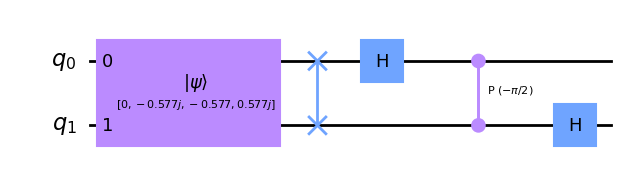

In [153]:
element_wise_qc = QuantumCircuit(2)
element_wise_qc.initialize(element_wise_state_norm)
iqft_circuit=QFT(num_qubits=2, inverse=True).decompose()
element_wise_qc_iqft = element_wise_qc.compose(iqft_circuit)
element_wise_qc_iqft.draw('mpl')

In [158]:
element_wise_qc_iqft_state = Statevector(element_wise_qc_iqft)
element_wise_qc_iqft_state

Statevector([-0.28867513-3.67503113e-18j, -0.28867513-3.53525080e-17j,
             -0.28867513+3.67503113e-18j,  0.8660254 +3.53525080e-17j],
            dims=(2, 2))


In [165]:
iqft_elementwise_state = Statevector(element_wise_qc_iqft)
iqft_elementwise_state = iqft_elementwise_state / np.sqrt(5)
print("Frequency domain multiplication = ","\n",iqft_elementwise_state.data)

Frequency domain multiplication =  
 [-0.12909944-1.64352388e-18j -0.12909944-1.58101222e-17j
 -0.12909944+1.64352388e-18j  0.38729833+1.58101222e-17j]


In [155]:
circular_convolution(initial_psi_state, initial_phi_state)

array([-0.12909944, -0.12909944, -0.12909944,  0.38729833])

# 2D Convolution 

In [5]:
def circular_convolution_2d(image, kernel):
    """
    2D ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖòÏùÑ ÏàòÌñâÌïòÎäî Ìï®Ïàò
    :param image: 2D ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ (numpy array)
    :param kernel: 2D Ïª§ÎÑê (numpy array)
    :return: 2D ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≤∞Í≥º (numpy array)
    """
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Í≤∞Í≥º Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
    result = np.zeros_like(image, dtype=float)

    # ÏàúÌôòÏ†Å Ïª®Î≥ºÎ£®ÏÖò ÏàòÌñâ
    for i in range(image_h):
        for j in range(image_w):
            for m in range(kernel_h):
                for n in range(kernel_w):
                    # ÏàúÌôòÏ†ÅÏúºÎ°ú Ïù∏Îç±Ïä§ Ï†ëÍ∑º
                    image_row = (i - m) % image_h
                    image_col = (j - n) % image_w
                    result[i, j] += image[image_row, image_col] * kernel[m, n]

    return result

In [6]:
image = np.array([[1, 2],
                  [3, 4]])
filter=  np.array([[1,0],
                   [0,-1]])
circular_convolution_2d(image, filter)

array([[-3., -1.],
       [ 1.,  3.]])

State  = Statevector([ 9.12870929e-01+0.j, -1.82574186e-01+0.j, -3.65148372e-01+0.j,
             -1.72086422e-17+0.j],
            dims=(2, 2))


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


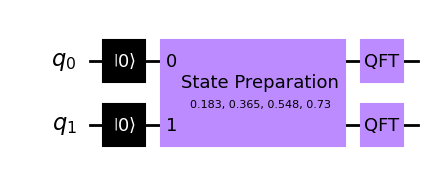

In [7]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT

# Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò

amplitudes = image.flatten() / np.sqrt(np.sum(image**2))  # ÏßÑÌè≠ Ï†ïÍ∑úÌôî

# ÌÅêÎπó Ïàò ÏÑ§Ï†ï
num_qubits = 2  # 2x2 Îç∞Ïù¥ÌÑ∞Ïóê ÌïÑÏöîÌïú ÌÅêÎπó Ïàò (2Í∞úÏùò ÌÅêÎπóÏúºÎ°ú |i, j> ÏÉÅÌÉú ÌëúÌòÑ)

# ÏñëÏûê ÌöåÎ°ú Ï¥àÍ∏∞Ìôî
psi = QuantumCircuit(num_qubits)

# ÏßÑÌè≠ Ïù∏ÏΩîÎî©
psi.initialize(amplitudes, range(num_qubits))

# 2D QFT ÏàòÌñâ
# Ìñâ(row)Ïóê ÎåÄÌï¥ QFT Ï†ÅÏö© (Ï≤´ Î≤àÏß∏ ÌÅêÎπó)
psi.append(QFT(1).to_gate(), [0])
# Ïó¥(column)Ïóê ÎåÄÌï¥ QFT Ï†ÅÏö© (Îëê Î≤àÏß∏ ÌÅêÎπó)
psi.append(QFT(1).to_gate(), [1])

state_psi  = Statevector(psi)
print("State  =",state_psi )
decomposed_qc = psi.decompose()
decomposed_qc.draw('mpl')

State  = Statevector([2.29934717e-17+0.j, 7.07106781e-01+0.j, 7.07106781e-01+0.j,
             2.29934717e-17+0.j],
            dims=(2, 2))


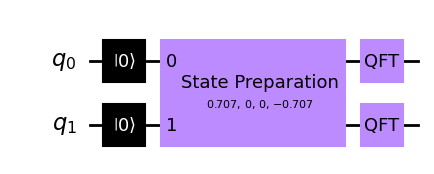

In [8]:
amplitudes_filter = filter.flatten() / np.sqrt(np.sum(filter**2))  # ÏßÑÌè≠ Ï†ïÍ∑úÌôî

# ÌÅêÎπó Ïàò ÏÑ§Ï†ï
num_qubits = 2  # 2x2 Îç∞Ïù¥ÌÑ∞Ïóê ÌïÑÏöîÌïú ÌÅêÎπó Ïàò (2Í∞úÏùò ÌÅêÎπóÏúºÎ°ú |i, j> ÏÉÅÌÉú ÌëúÌòÑ)

# ÏñëÏûê ÌöåÎ°ú Ï¥àÍ∏∞Ìôî
phi = QuantumCircuit(num_qubits)

# ÏßÑÌè≠ Ïù∏ÏΩîÎî©
phi.initialize(amplitudes_filter, range(num_qubits))

# 2D QFT ÏàòÌñâ
# Ìñâ(row)Ïóê ÎåÄÌï¥ QFT Ï†ÅÏö© (Ï≤´ Î≤àÏß∏ ÌÅêÎπó)
phi.append(QFT(1).to_gate(), [0])
# Ïó¥(column)Ïóê ÎåÄÌï¥ QFT Ï†ÅÏö© (Îëê Î≤àÏß∏ ÌÅêÎπó)
phi.append(QFT(1).to_gate(), [1])

state_phi = Statevector(phi)
print("State  =",state_phi)
decomposed_qc_filter = phi.decompose()
decomposed_qc_filter.draw('mpl')

In [10]:
state_psi_qft = Statevector(psi)
state_phi_qft = Statevector(phi)
print(state_psi_qft)
print(state_phi_qft)

element_wise = state_psi_qft.data * state_phi_qft.data
element_wise_state = Statevector(element_wise)
print("Element-wise multiplication result = ","\n",element_wise_state)
# element-wise Í≥±ÏÖà Í≤∞Í≥º ÌÅ¨Í∏∞Í∞Ä 1Ïù¥ ÏïÑÎãàÎØÄÎ°ú Ï†ïÍ∑úÌôî
element_wise_state_norm = element_wise_state / np.linalg.norm(element_wise_state.data)
print("Normalized element-wise multiplication = ","\n",element_wise_state_norm)

Statevector([ 9.12870929e-01+0.j, -1.82574186e-01+0.j, -3.65148372e-01+0.j,
             -1.72086422e-17+0.j],
            dims=(2, 2))
Statevector([2.29934717e-17+0.j, 7.07106781e-01+0.j, 7.07106781e-01+0.j,
             2.29934717e-17+0.j],
            dims=(2, 2))
Element-wise multiplication result =  
 Statevector([ 2.09900719e-17+0.j, -1.29099445e-01+0.j, -2.58198890e-01+0.j,
             -3.95686427e-34+0.j],
            dims=(2, 2))
Normalized element-wise multiplication =  
 Statevector([ 7.27117419e-17+0.j, -4.47213595e-01+0.j, -8.94427191e-01+0.j,
             -1.37069799e-33+0.j],
            dims=(2, 2))


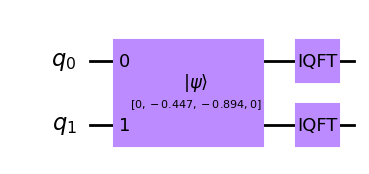

In [11]:
element_wise_qc = QuantumCircuit(2)
element_wise_qc.initialize(element_wise_state_norm)
element_wise_qc.append(QFT(1, inverse=True).to_gate(), [1])
element_wise_qc.append(QFT(1, inverse=True).to_gate(), [0])

element_wise_qc.draw('mpl')

In [13]:
element_wise_qc_iqft_state = Statevector(element_wise_qc)
print(element_wise_qc_iqft_state)
iqft_elementwise_state = Statevector(element_wise_qc)
#iqft_elementwise_state = iqft_elementwise_state / np.sqrt(5)
iqft_elementwise_state = iqft_elementwise_state * 10 / np.sqrt(5)
print("Frequency domain multiplication = ","\n",iqft_elementwise_state.data)

Statevector([-0.67082039+0.j, -0.2236068 +0.j,  0.2236068 +0.j,
              0.67082039+0.j],
            dims=(2, 2))
Frequency domain multiplication =  
 [-3.+0.j -1.+0.j  1.+0.j  3.+0.j]


# 2D Convolution with 3 X 3 Image and 2 X 2 Kernel

In [20]:
def circular_convolution_2d(image, kernel):
    """
    2D ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖòÏùÑ ÏàòÌñâÌïòÎäî Ìï®Ïàò
    :param image: 2D ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ (numpy array)
    :param kernel: 2D Ïª§ÎÑê (numpy array)
    :return: 2D ÏàúÌôò Ïª®Î≥ºÎ£®ÏÖò Í≤∞Í≥º (numpy array)
    """
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Í≤∞Í≥º Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
    result = np.zeros_like(image, dtype=float)

    # ÏàúÌôòÏ†Å Ïª®Î≥ºÎ£®ÏÖò ÏàòÌñâ
    for i in range(image_h):
        for j in range(image_w):
            for m in range(kernel_h):
                for n in range(kernel_w):
                    # ÏàúÌôòÏ†ÅÏúºÎ°ú Ïù∏Îç±Ïä§ Ï†ëÍ∑º
                    image_row = (i - m) % image_h
                    image_col = (j - n) % image_w
                    result[i, j] += image[image_row, image_col] * kernel[m, n]

    return result

In [22]:
image = np.array([[1,2,3],[4,5,6],[7,8,9]])
circular_convolution_2d(image,filter)

array([[-8., -5., -5.],
       [ 1.,  4.,  4.],
       [ 1.,  4.,  4.]])

# Quantum Fast Fourier Transform

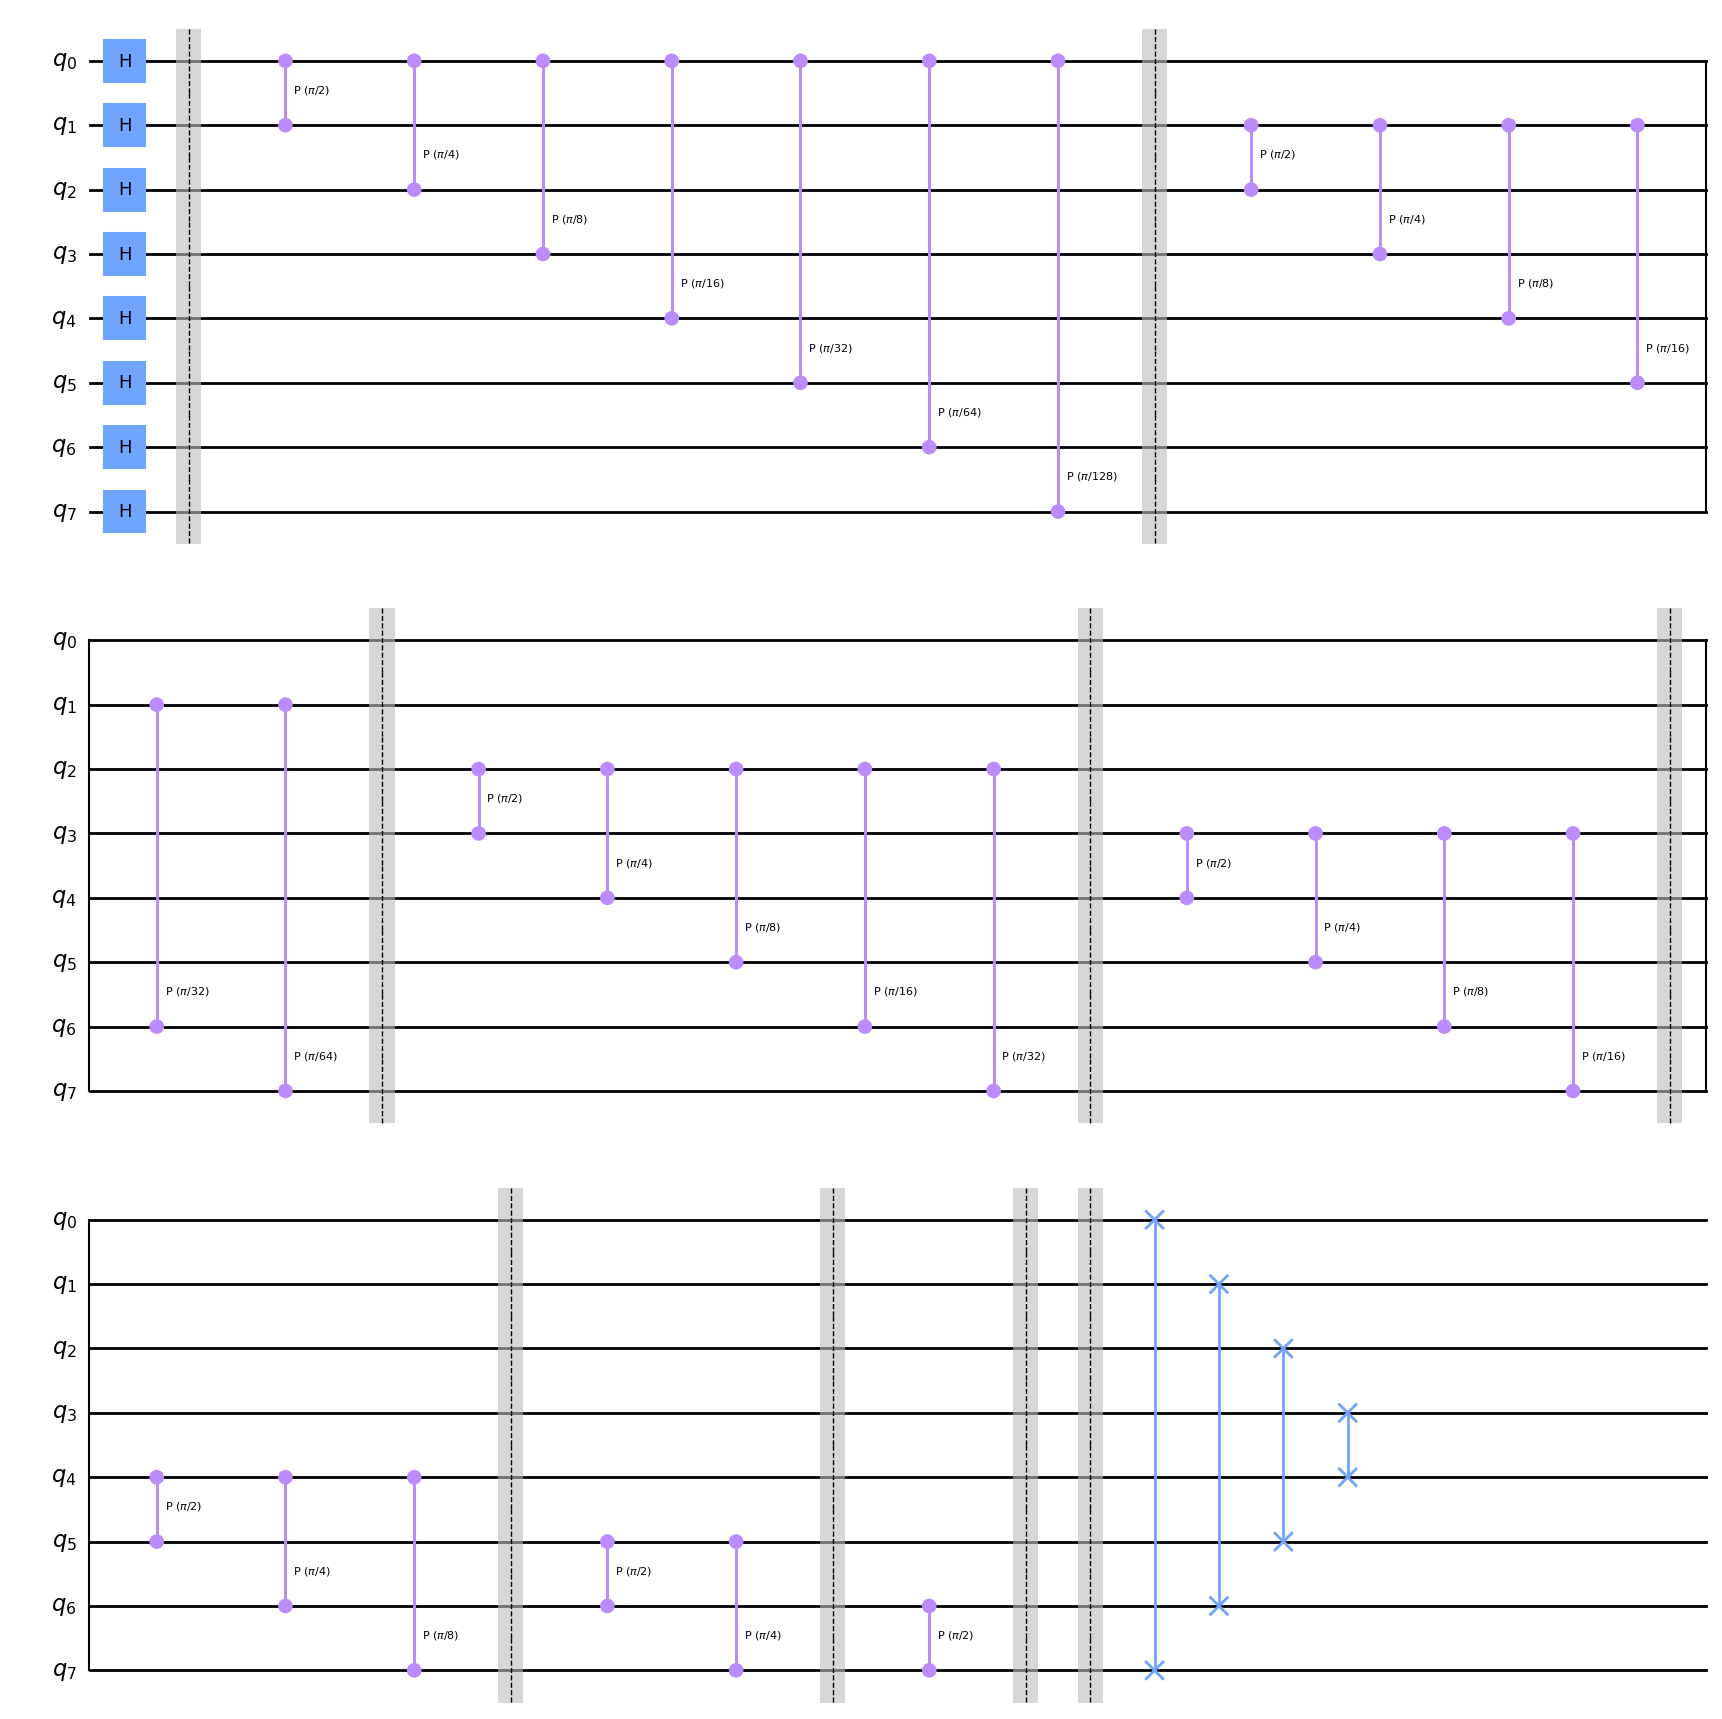

In [6]:
from qiskit import QuantumCircuit
import numpy as np

def quantum_fft(n):
    qc = QuantumCircuit(n)
    
    # Î™®Îì† ÌÅêÎπÑÌä∏Ïóê Hadamard Í≤åÏù¥Ìä∏ Ï†ÅÏö©
    for i in range(n):
        qc.h(i)
    qc.barrier()
    # Ï†úÏñ¥ ÏúÑÏÉÅ ÌöåÏ†Ñ Í≤åÏù¥Ìä∏ Ï†ÅÏö©
    for i in range(n):
        for j in range(i+1, n):
            qc.cp(np.pi / (2**(j-i)), j, i)
        qc.barrier()
    # ÌÅêÎπÑÌä∏ ÏàúÏÑú Îí§ÏßëÍ∏∞
    for i in range(n//2):
        qc.swap(i, n-i-1)

    return qc

# ÏòàÏãú: 3 ÌÅêÎπÑÌä∏ QFFT ÌöåÎ°ú ÏÉùÏÑ±
n_qubits = 8
qfft_circuit = quantum_fft(n_qubits)

# ÌöåÎ°ú Ï∂úÎ†•
qfft_circuit.draw('mpl')


{'000': 490, '100': 534}


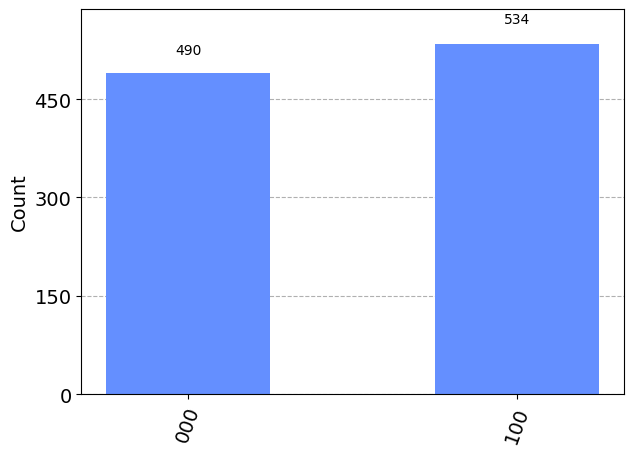

In [8]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Î≤ÑÌÑ∞ÌîåÎùºÏù¥ Ïó∞ÏÇ∞ Íµ¨ÌòÑ
def butterfly(qc, control, target, k):
    """ Î≤ÑÌÑ∞ÌîåÎùºÏù¥ Ïó∞ÏÇ∞: Ï†úÏñ¥ ÌöåÏ†ÑÍ≥º Ïä§Ïôë """
    # Ï†úÏñ¥ ÌöåÏ†Ñ
    qc.cp(np.pi / (2 ** k), control, target)
    # Ïä§Ïôë Í≤åÏù¥Ìä∏
    qc.swap(control, target)

# FFT ÌöåÎ°ú Íµ¨ÌòÑ
def quantum_fft(n):
    qc = QuantumCircuit(n)
    
    # Î≤ÑÌÑ∞ÌîåÎùºÏù¥ Íµ¨Ï°∞ Ï†ÅÏö©
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            butterfly(qc, control=n-j-1, target=n-i-1, k=j-i)
    
    # Ïä§ÏôëÏúºÎ°ú Ï∂úÎ†• ÏàúÏÑú Îí§ÏßëÍ∏∞
    for i in range(n//2):
        qc.swap(i, n-i-1)
        
    return qc

# 3-ÌÅêÎπó FFT Íµ¨ÌòÑ
n_qubits = 3
qc = quantum_fft(n_qubits)
qc.measure_all()

# ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ Ïã§Ìñâ
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = execute(compiled_circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)
plot_histogram(counts)


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


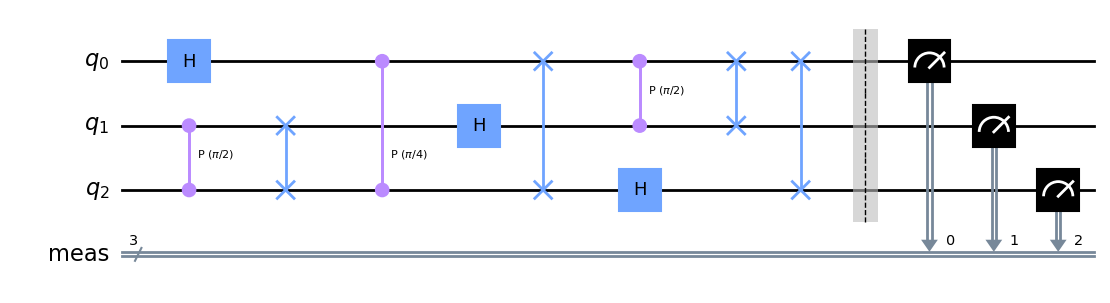

In [9]:
qc.draw('mpl')

                                             ‚îå‚îÄ‚îÄ‚îÄ‚îê    ‚ñë ‚îå‚îÄ‚îê      
   q_0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄX‚îÄ‚îÄ‚ñë‚îÄ‚î§M‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                      ‚îå‚îÄ‚îÄ‚îÄ‚îê ‚îÇ        ‚îÇP(œÄ/2) ‚îî‚îÄ‚îÄ‚îÄ‚îò ‚îÇ  ‚ñë ‚îî‚ï•‚îò‚îå‚îÄ‚îê   
   q_1: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ H ‚îú‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚ï´‚îÄ‚î§M‚îú‚îÄ‚îÄ‚îÄ
        ‚îå‚îÄ‚îÄ‚îÄ‚îê ‚îÇP(œÄ/2) ‚îî‚îÄ‚îÄ‚îÄ‚îò ‚îÇP(œÄ/4)                ‚îÇ  ‚ñë  ‚ïë ‚îî‚ï•‚îò‚îå‚îÄ‚îê
   q_2: ‚î§ H ‚îú‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄX‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚ï´‚îÄ‚îÄ‚ï´‚îÄ‚î§M‚îú
        ‚îî‚îÄ‚îÄ‚îÄ‚îò                                         ‚ñë  ‚ïë  ‚ïë ‚îî‚ï•‚îò
meas: 3/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚

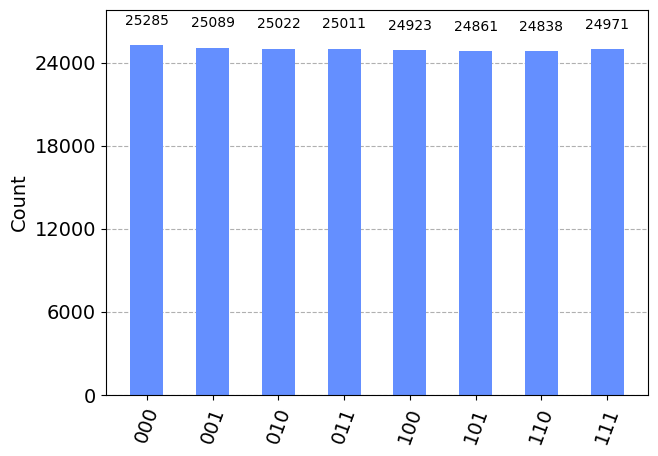

In [21]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

# 3-ÌÅêÎπó QFT ÌöåÎ°ú ÏÉùÏÑ±
n_qubits = 3
qft_circuit = QFT(num_qubits=n_qubits, do_swaps=True).decompose()  # do_swaps=True: Ï∂úÎ†• ÏàúÏÑú ÏûêÎèôÏúºÎ°ú Îí§ÏßëÏùå
qft_circuit.measure_all()

# ÌöåÎ°ú ÌôïÏù∏
print(qft_circuit.draw('text'))

# ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ Ïã§Ìñâ
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qft_circuit, simulator)
job = execute(compiled_circuit, backend=simulator, shots=200000)
result = job.result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print("QFT Result:", counts)
plot_histogram(counts)


        ‚îå‚îÄ‚îÄ‚îÄ‚îê              ‚ñë ‚îå‚îÄ‚îê   
   q_0: ‚î§ H ‚îú‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄX‚îÄ‚îÄ‚ñë‚îÄ‚î§M‚îú‚îÄ‚îÄ‚îÄ
        ‚îú‚îÄ‚îÄ‚îÄ‚î§ ‚îÇP(-œÄ/2)  ‚îÇ  ‚ñë ‚îî‚ï•‚îò‚îå‚îÄ‚îê
   q_1: ‚î§ H ‚îú‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄX‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚ï´‚îÄ‚î§M‚îú
        ‚îî‚îÄ‚îÄ‚îÄ‚îò              ‚ñë  ‚ïë ‚îî‚ï•‚îò
meas: 2/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê‚ïê‚ï©‚ïê
                              0  1 
Butterfly Quantum Result: {'10': 243, '11': 277, '00': 265, '01': 239}


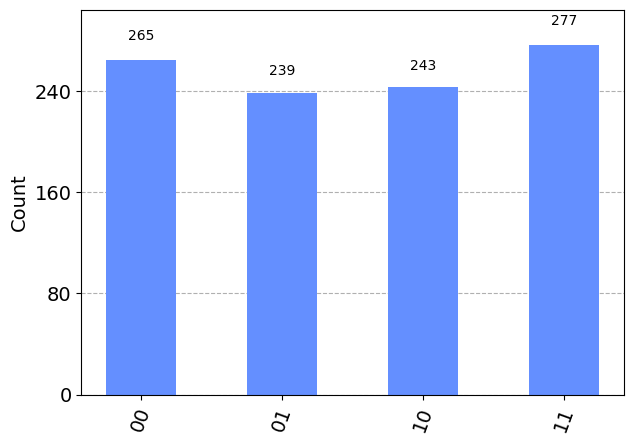

In [22]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Î≤ÑÌÑ∞ÌîåÎùºÏù¥ Ïó∞ÏÇ∞ (Ï†úÏñ¥ ÌöåÏ†Ñ + Ïä§Ïôë)
def butterfly(qc, control, target, k):
    """ Î≤ÑÌÑ∞ÌîåÎùºÏù¥ Ïó∞ÏÇ∞: Ï†úÏñ¥ ÌöåÏ†ÑÍ≥º Ïä§Ïôë """
    # Ï†úÏñ¥ ÌöåÏ†Ñ (Controlled-Phase)
    angle = -2 * np.pi / (2 ** (k + 1))
    qc.cp(angle, control, target)
    # Ïä§Ïôë Í≤åÏù¥Ìä∏
    qc.swap(control, target)

# Î≤ÑÌÑ∞ÌîåÎùºÏù¥ ÌÖåÏä§Ìä∏ ÌöåÎ°ú ÏÉùÏÑ±
def butterfly_test_circuit():
    qc = QuantumCircuit(2)
    
    # Ï¥àÍ∏∞ ÏÉÅÌÉú Ï§ÄÎπÑ (ÏäàÌçºÌè¨ÏßÄÏÖò ÏÉùÏÑ±)
    qc.h(0)
    qc.h(1)
    
    # Î≤ÑÌÑ∞ÌîåÎùºÏù¥ Ïó∞ÏÇ∞ Ï†ÅÏö©
    butterfly(qc, control=0, target=1, k=1)
    
    # Ï∏°Ï†ï
    qc.measure_all()
    
    return qc

# ÌöåÎ°ú ÏÉùÏÑ± Î∞è ÏãúÍ∞ÅÌôî
qc = butterfly_test_circuit()
print(qc.draw('text'))

# ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ Ïã§Ìñâ
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = execute(compiled_circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print("Butterfly Quantum Result:", counts)
plot_histogram(counts)


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


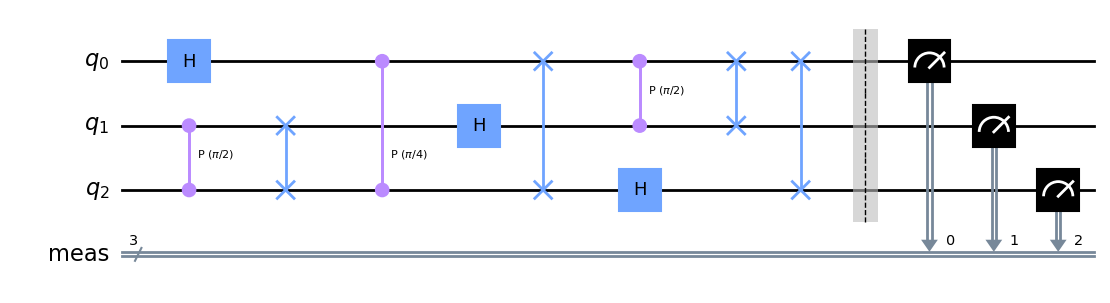

In [20]:
qc.draw('mpl')

In [27]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np

# Î≤ÑÌÑ∞ÌîåÎùºÏù¥ Ïó∞ÏÇ∞ (Ï†úÏñ¥ ÌöåÏ†Ñ + Ïä§Ïôë)
def butterfly(qc, control, target, k):
    """ Î≤ÑÌÑ∞ÌîåÎùºÏù¥ Ïó∞ÏÇ∞: Ï†úÏñ¥ ÌöåÏ†ÑÍ≥º Ïä§Ïôë """
    angle = -2 * np.pi / (2 ** (k + 1))
    qc.cp(angle, control, target)
    qc.swap(control, target)

# 4-ÌÅêÎπó Î≤ÑÌÑ∞ÌîåÎùºÏù¥ FFT ÌöåÎ°ú ÏÉùÏÑ±
def butterfly_fft_circuit():
    qc = QuantumCircuit(4)
    
    # Ï¥àÍ∏∞ ÏÉÅÌÉú Ï§ÄÎπÑ (ÏäàÌçºÌè¨ÏßÄÏÖò ÏÉùÏÑ±)
    for i in range(4):
        qc.h(i)
    
    # 1Îã®Í≥Ñ Î≤ÑÌÑ∞ÌîåÎùºÏù¥ (0-2, 1-3 ÌéòÏñ¥)
    butterfly(qc, 0, 2, k=1)
    butterfly(qc, 1, 3, k=1)
    
    # 2Îã®Í≥Ñ Î≤ÑÌÑ∞ÌîåÎùºÏù¥ (0-1, 2-3 ÌéòÏñ¥)
    butterfly(qc, 0, 1, k=2)
    butterfly(qc, 2, 3, k=2)
    
    # ÎπÑÌä∏ Î∞òÏ†Ñ (Ï∂úÎ†• ÏàúÏÑú Ï†ïÎ†¨)
    qc.swap(0, 3)
    qc.swap(1, 2)
    
    return qc

# QFT ÌöåÎ°ú ÏÉùÏÑ± (n=4)
def qft_circuit(n):
    qc = QuantumCircuit(n)
    
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            angle = -2 * np.pi / (2 ** (j-i+1))
            qc.cp(angle, j, i)
    
    # ÎπÑÌä∏ Î∞òÏ†Ñ (QFTÎäî ÏûêÎèôÏúºÎ°ú Îí§ÏßëÏùå)
    for i in range(n//2):
        qc.swap(i, n-i-1)
    
    return qc

# 1. Î≤ÑÌÑ∞ÌîåÎùºÏù¥ FFT ÌöåÎ°ú ÏÉùÏÑ± Î∞è ÏÉÅÌÉú ÌôïÏù∏
qc_butterfly = butterfly_fft_circuit()
sv_butterfly = Statevector.from_instruction(qc_butterfly)
print("Butterfly FFT Statevector:", sv_butterfly)

# 2. QFT ÌöåÎ°ú ÏÉùÏÑ± Î∞è ÏÉÅÌÉú ÌôïÏù∏ (ÎπÑÍµêÏö©)
qc_qft = qft_circuit(4)
sv_qft = Statevector.from_instruction(qc_qft)
print("QFT Statevector:", sv_qft)

# 3. ÌöåÎ°ú ÏãúÍ∞ÅÌôî
print("Butterfly FFT Circuit:\n", qc_butterfly.draw('text'))
print("QFT Circuit:\n", qc_qft.draw('text'))

# 4. Ï∏°Ï†ï Î∞è ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ Ïã§Ìñâ
qc_butterfly.measure_all()
qc_qft.measure_all()

# Î≤ÑÌÑ∞ÌîåÎùºÏù¥ Ï∏°Ï†ï Í≤∞Í≥º
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit_butterfly = transpile(qc_butterfly, simulator)
job_butterfly = execute(compiled_circuit_butterfly, backend=simulator, shots=1024)
result_butterfly = job_butterfly.result()
counts_butterfly = result_butterfly.get_counts()
print("Butterfly Quantum Result:", counts_butterfly)
plot_histogram(counts_butterfly).show()

# QFT Ï∏°Ï†ï Í≤∞Í≥º
compiled_circuit_qft = transpile(qc_qft, simulator)
job_qft = execute(compiled_circuit_qft, backend=simulator, shots=1024)
result_qft = job_qft.result()
counts_qft = result_qft.get_counts()
print("QFT Quantum Result:", counts_qft)
plot_histogram(counts_qft).show()


Butterfly FFT Statevector: Statevector([ 2.50000000e-01+0.j       ,  2.50000000e-01+0.j       ,
              2.50000000e-01+0.j       ,  1.76776695e-01-0.1767767j,
              2.50000000e-01+0.j       ,  1.53080850e-17-0.25j     ,
              2.50000000e-01+0.j       , -1.76776695e-01-0.1767767j,
              2.50000000e-01+0.j       ,  2.50000000e-01+0.j       ,
              1.53080850e-17-0.25j     , -1.76776695e-01-0.1767767j,
              1.76776695e-01-0.1767767j, -1.76776695e-01-0.1767767j,
             -1.76776695e-01-0.1767767j, -4.16333634e-17+0.25j     ],
            dims=(2, 2, 2, 2))
QFT Statevector: Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))
Butterfly FFT Circuit:
      ‚îå‚îÄ‚îÄ‚îÄ‚îê                                             
q_0: ‚î§ H ‚îú‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

C:\Users\HCI\AppData\Local\Temp\ipykernel_1084\3570486737.py:76: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts_butterfly).show()
C:\Users\HCI\AppData\Local\Temp\ipykernel_1084\3570486737.py:84: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts_qft).show()


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


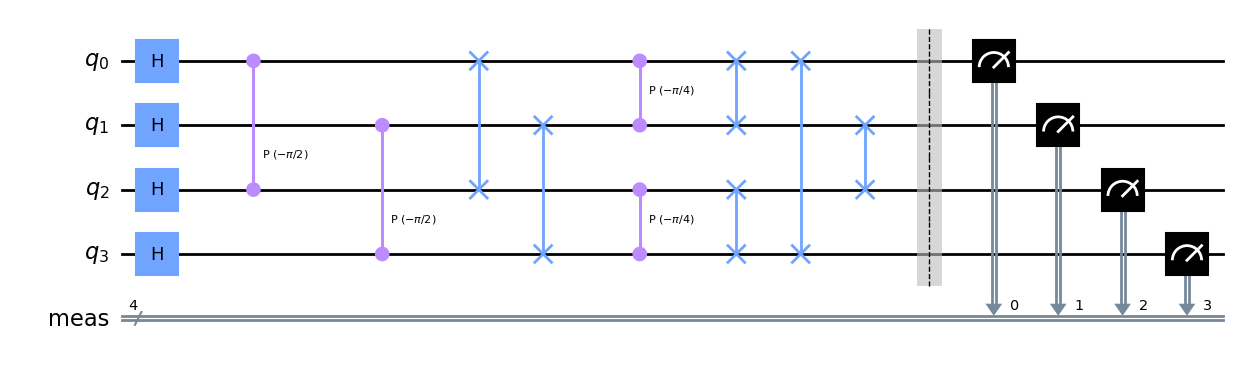

In [28]:
qc_butterfly.draw('mpl')

QFT Quantum Result: {'00': 262, '01': 240, '11': 269, '10': 253}


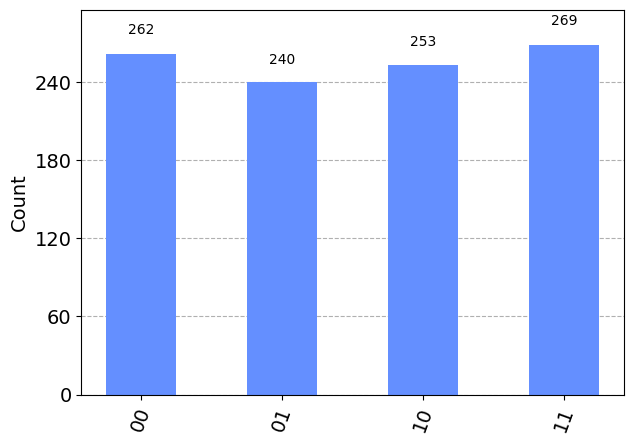

In [26]:

# QFT Ï∏°Ï†ï Í≤∞Í≥º
compiled_circuit_qft = transpile(qc_qft, simulator)
job_qft = execute(compiled_circuit_qft, backend=simulator, shots=1024)
result_qft = job_qft.result()
counts_qft = result_qft.get_counts()
print("QFT Quantum Result:", counts_qft)
plot_histogram(counts_qft)

# Color space QFT

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


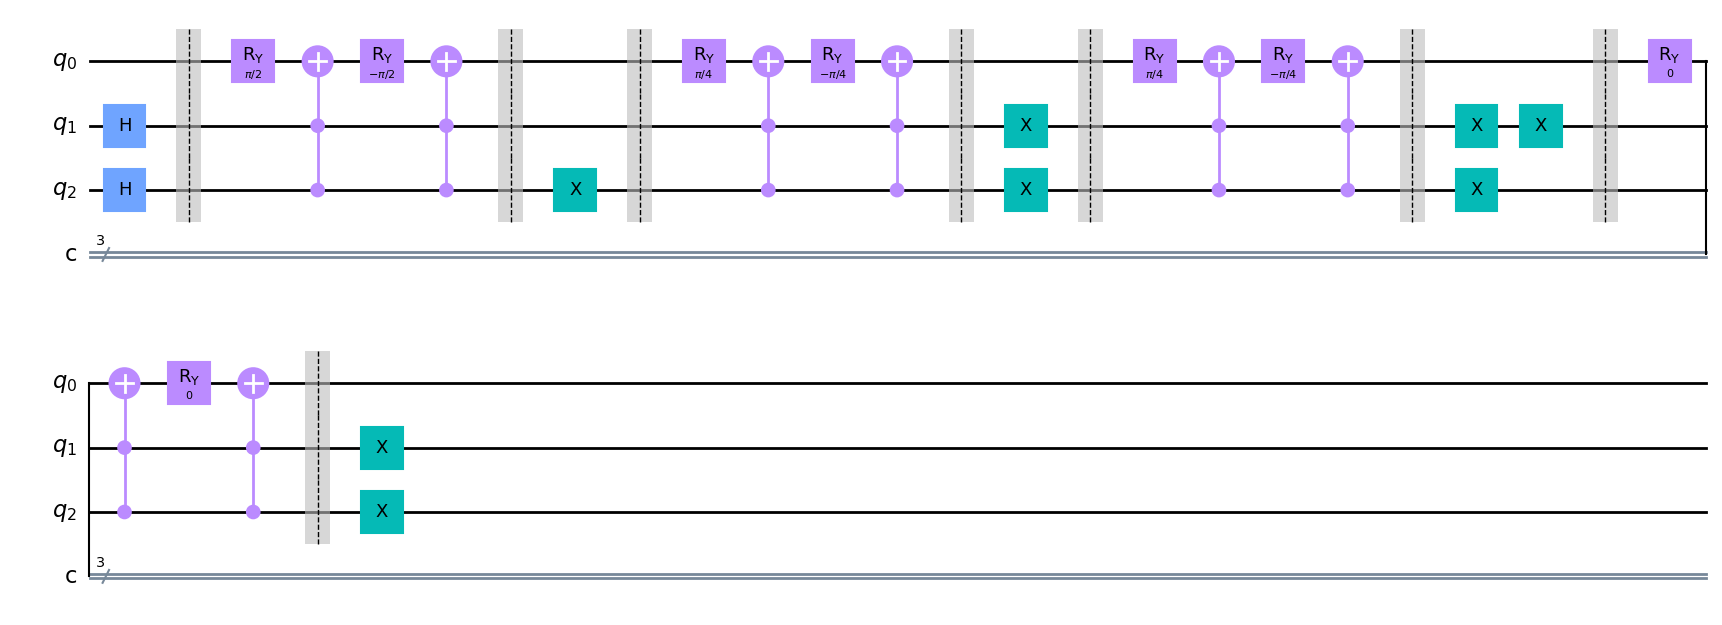

In [93]:
frqi = QuantumCircuit(3,3)
frqi.h(1)
frqi.h(2)

frqi.barrier()
frqi.mcry(np.pi,[1,2],0)
frqi.barrier()

frqi.x(2)
frqi.barrier()
frqi.mcry(np.pi/2,[1,2],0)
frqi.barrier()
frqi.x(2)

frqi.x(1)
frqi.barrier()
frqi.mcry(np.pi/2,[1,2],0)
frqi.barrier()
frqi.x(1)

frqi.x(1)
frqi.x(2)
frqi.barrier()
frqi.mcry(0,[1,2],0)
frqi.barrier()
frqi.x(2)
frqi.x(1)


frqi.draw('mpl')

In [74]:
sv_frqi = Statevector.from_instruction(frqi)
print("FRQI Statevector:", sv_frqi)

FRQI Statevector: Statevector([ 5.00000000e-01+0.j, -1.08174986e-17+0.j,  3.53553391e-01+0.j,
              3.53553391e-01+0.j,  3.53553391e-01+0.j,  3.53553391e-01+0.j,
             -1.08174986e-17+0.j,  5.00000000e-01+0.j],
            dims=(2, 2, 2))


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


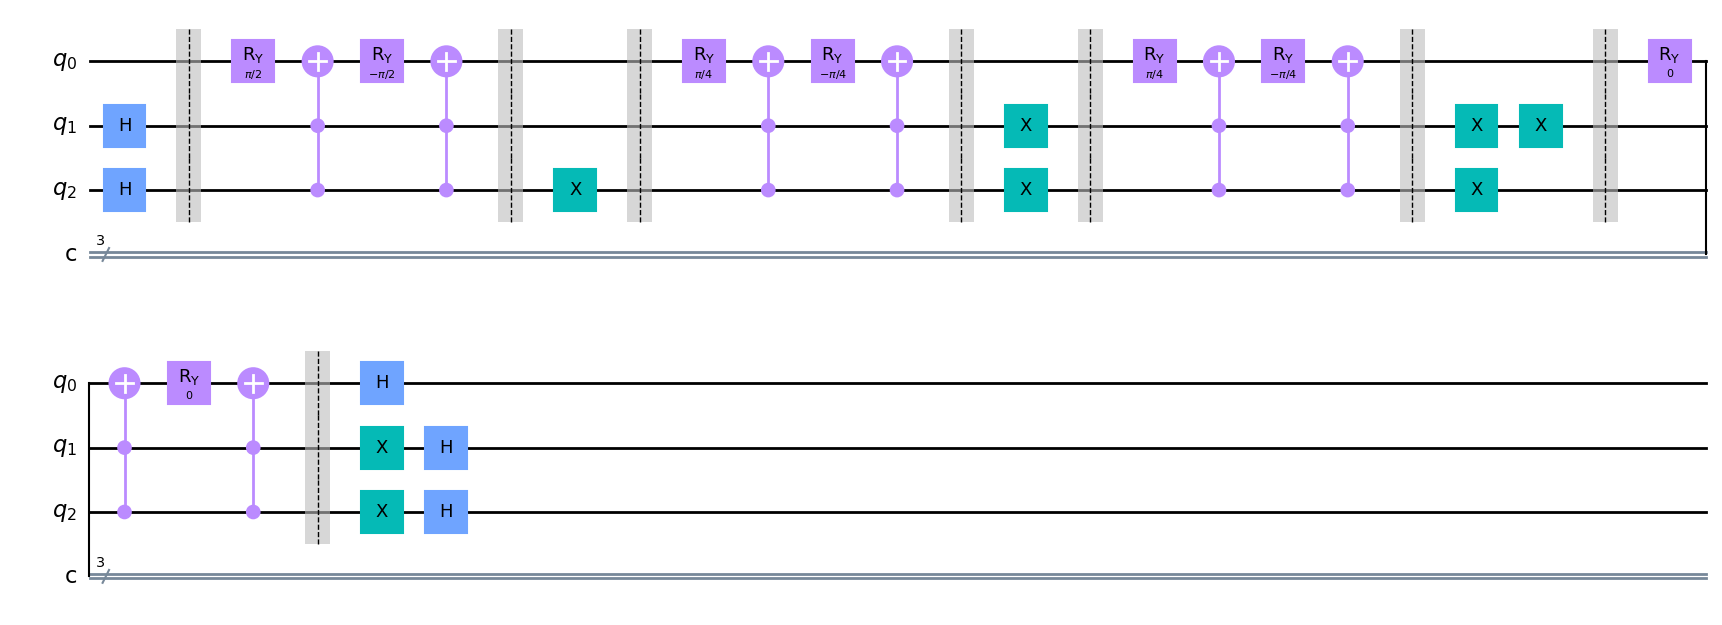

In [94]:
frqi.h([0,1,2])
frqi.draw('mpl')

In [95]:
frqi.measure(range(3),[2,1,0])

{'000': 7297, '101': 1272, '110': 1206, '011': 225}


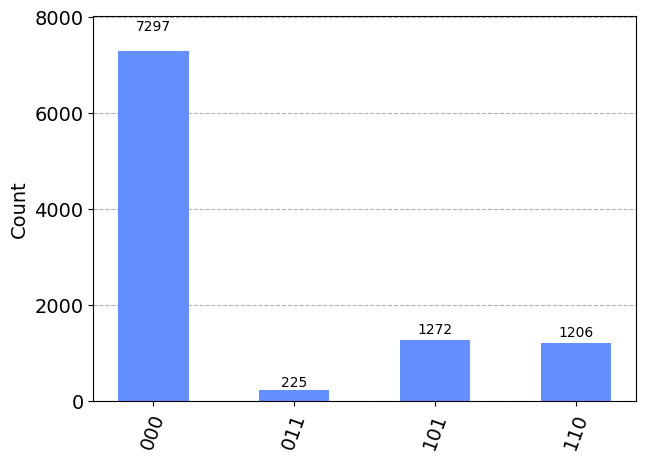

In [96]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(frqi, simulator)
job = execute(compiled_circuit, backend=simulator, shots=10000)
result = job.result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)
plot_histogram(counts)

In [102]:
frqi_result = [7297/7297, 0/(1272), 0/1206, 0]

In [98]:
kernel = QuantumCircuit(3,3)
kernel.h(1)
kernel.h(2)

kernel.barrier()
kernel.mcry(np.pi,[1,2],0)
kernel.barrier()

kernel.x(2)
kernel.barrier()
kernel.mcry(0,[1,2],0)
kernel.barrier()
kernel.x(2)

kernel.x(1)
kernel.barrier()
kernel.mcry(0,[1,2],0)
kernel.barrier()
kernel.x(1)

kernel.x(1)
kernel.x(2)
kernel.barrier()
kernel.mcry(0,[1,2],0)
kernel.barrier()
kernel.x(2)
kernel.x(1)

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


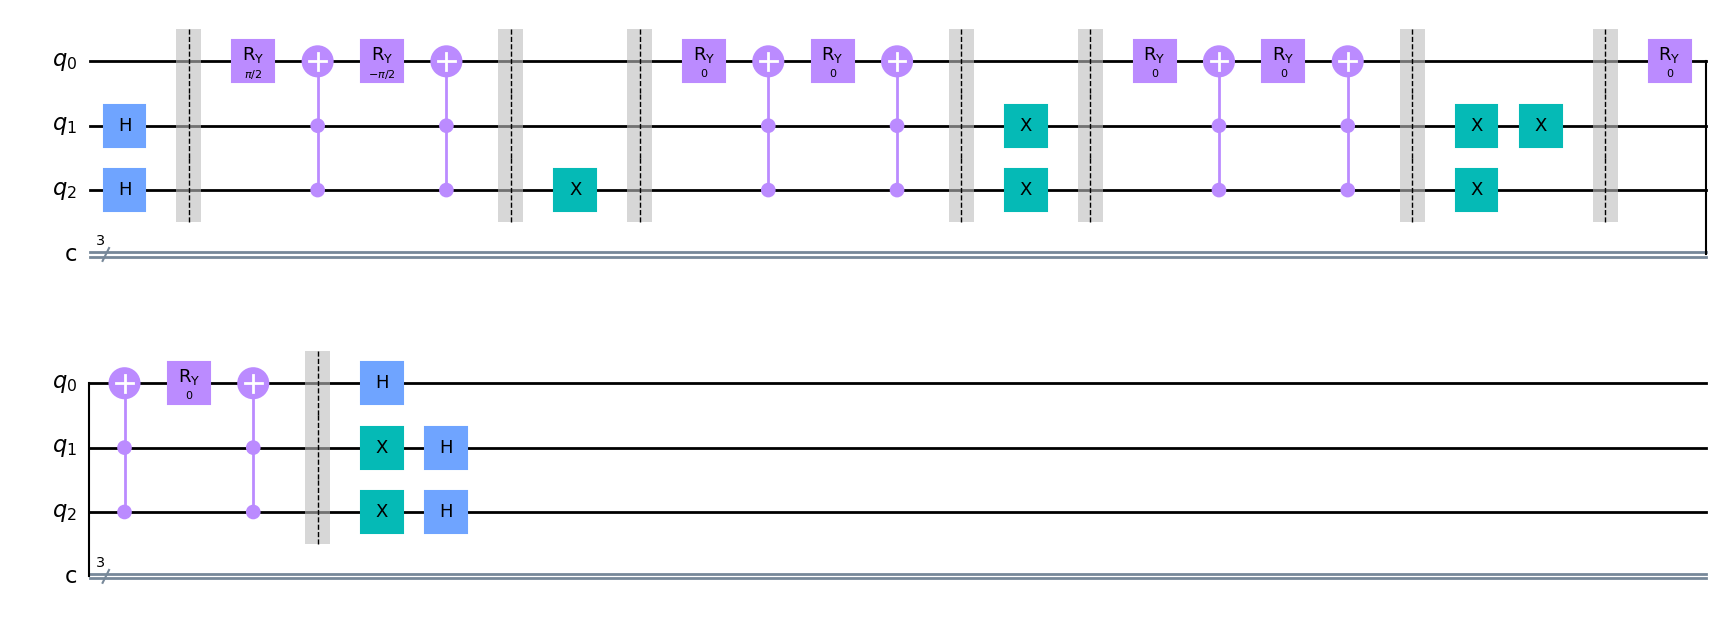

In [99]:
kernel.h([0,1,2])
kernel.draw('mpl')

In [100]:
kernel.measure(range(3),[2,1,0])

{'000': 5025, '111': 1221, '101': 1212, '100': 1348, '110': 1194}


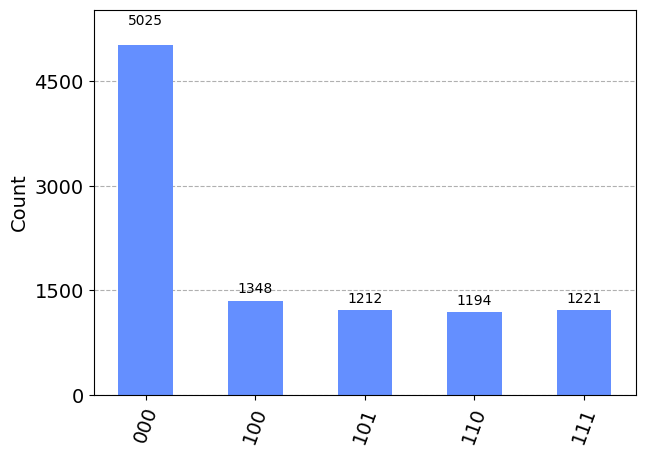

In [101]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(kernel, simulator)
job = execute(compiled_circuit, backend=simulator, shots=10000)
result = job.result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)
plot_histogram(counts)

In [103]:
kernel_result = [5025/(5025+1348),0,0,0]

In [104]:
frqi_result = np.array(frqi_result)
kernel_result = np.array(kernel_result)
result = frqi_result * kernel_result
print(result)

[0.78848266 0.         0.         0.        ]


In [109]:
inverseQFT = np.fft.ifft(result)
recon= []
for i in range(len(inverseQFT)):
    recon.append(2 * np.arccos(np.sqrt(inverseQFT[i])))

recon = np.array(recon)* 255/np.pi

print(recon)

[180.31822782+0.j 180.31822782+0.j 180.31822782+0.j 180.31822782+0.j]


In [111]:
filter = [0,0,0,1]
filter_fft= np.fft.fft(filter)
print(filter_fft)
filter_ifft = np.fft.ifft(filter_fft)
print("Ifft",filter_ifft)

[ 1.+0.j  0.+1.j -1.+0.j  0.-1.j]
Ifft [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [49]:
element_wise_result_state = Statevector(element_wise)

print("Element-wise product result = ", element_wise_result_state)
coeff = np.absolute(element_wise_result_state.data[0])
element_wise_result_state = element_wise_result_state / np.linalg.norm(element_wise_result_state.data)

Element-wise product result =  Statevector([ 2.50000000e-01+0.j,  5.48800716e-35-0.j,  1.76776695e-01+0.j,
             -1.79367117e-18+0.j,  1.76776695e-01+0.j, -1.79367117e-18+0.j,
              5.48800716e-35-0.j,  2.50000000e-01+0.j],
            dims=(2, 2, 2))


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


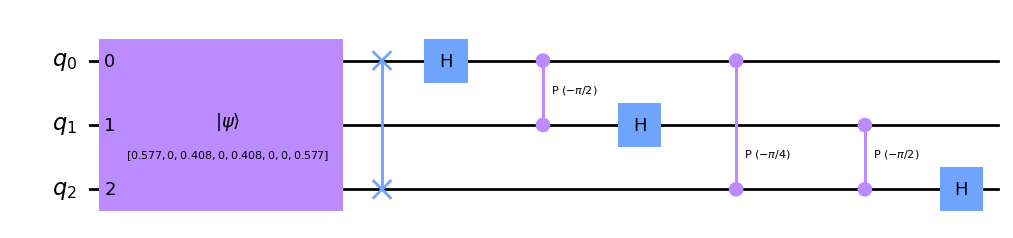

In [51]:
element_wise_result_state = Statevector(element_wise_result_state, dims=(2, 2, 2))
element_wise_result = QuantumCircuit(3)
element_wise_result.initialize(element_wise_result_state, [0,1,2])
qft_circuit = QFT(num_qubits=3, inverse=True).decompose()
elemen_wise_result_qft = element_wise_result.compose(qft_circuit)
elemen_wise_result_qft.draw('mpl')

In [55]:
state_result_qft = Statevector(elemen_wise_result_qft)
state_result_qft = state_result_qft  * np.sqrt(2) * coeff
state_result_qft

Statevector([ 0.24639964+0.00000000e+00j,  0.07216878+8.35371057e-18j,
              0.07216878+7.21687836e-02j, -0.02989329+1.02062073e-01j,
              0.10206207+0.00000000e+00j, -0.02989329-1.02062073e-01j,
              0.07216878-7.21687836e-02j,  0.07216878-1.41481667e-18j],
            dims=(2, 2, 2))


In [113]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import plot_histogram

# 1. Image and Filter definition
image = [0, 127, 127, 255]
filter_ = [0, 0, 0, 1]
n_qubits = int(np.log2(len(image)))

# 2. Quantum Fourier Transform (QFT)
def qft(qc, n):
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            qc.cp(np.pi / (2 ** (j-i)), j, i)

# 3. QFT on image and filter
def qft_measure(input_list):
    qc = QuantumCircuit(n_qubits, n_qubits)
    for i, val in enumerate(input_list):
        bin_val = format(i, f"0{n_qubits}b")
        for j, bit in enumerate(bin_val):
            if bit == '1':
                qc.x(n_qubits - j - 1)

        qc.h(range(n_qubits))  # Angular encoding using Hadamard gates
        qc.barrier()
    
    qft(qc, n_qubits)
    qc.barrier()
    qc.measure(range(n_qubits), range(n_qubits))

    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = execute(compiled_circuit, backend=simulator, shots=10000)
    result = job.result()
    counts = result.get_counts()
    
    return counts

# QFT and measurement for image and filter
qft_image_counts = qft_measure(image)
qft_filter_counts = qft_measure(filter_)

# 4. Combine measurement results for element-wise multiplication
def combine_counts(counts1, counts2):
    combined = {}
    for state1, count1 in counts1.items():
        for state2, count2 in counts2.items():
            combined_state = int(state1, 2) * int(state2, 2)
            if combined_state in combined:
                combined[combined_state] += count1 * count2
            else:
                combined[combined_state] = count1 * count2
    return combined

combined_counts = combine_counts(qft_image_counts, qft_filter_counts)

# 5. Inverse FFT using Numpy
combined_array = np.zeros(len(image), dtype=complex)
for state, amplitude in combined_counts.items():
    combined_array[state % len(image)] = amplitude

ifft_result = np.fft.ifft(combined_array)

# 6. Coefficient adjustment
factor = 1 / len(image)
conv_result = np.real(factor * ifft_result)

qft_image_counts, qft_filter_counts, combined_counts, conv_result


({'10': 2545, '00': 2449, '11': 2482, '01': 2524},
 {'10': 2547, '00': 2402, '01': 2506, '11': 2545},
 {4: 6482115,
  0: 42627502,
  2: 12806398,
  6: 12798679,
  3: 12643472,
  9: 6316690,
  1: 6325144},
 array([4649674.8125, 1864301.4375, 2278597.8125, 1864301.4375]))

# 2D DFT and IDFT

In [125]:
import numpy as np

# 1. Image and Filter definition
image = [[0, 50], [127, 255]]
filter_ = [[0, 0], [0, 1]]

# 2. QFT using Numpy FFT
qft_image = np.fft.fft2(image)
qft_filter = np.fft.fft2(filter_)

# 3. Element-wise Multiplication
qft_result = qft_image * qft_filter

# 4. Inverse FFT using Numpy
ifft_result = np.fft.ifft2(qft_result)

# 5. Coefficient adjustment
factor = 1 / len(image)
conv_result = np.real(factor * ifft_result)

qft_image, qft_filter, qft_result, ifft_result


(array([[ 432.+0.j, -178.+0.j],
        [-332.+0.j,   78.+0.j]]),
 array([[ 1.+0.j, -1.+0.j],
        [-1.+0.j,  1.+0.j]]),
 array([[432.+0.j, 178.-0.j],
        [332.-0.j,  78.+0.j]]),
 array([[255.+0.j, 127.+0.j],
        [ 50.+0.j,   0.+0.j]]))

In [132]:
import numpy as np

def circular_convolution(image, kernel):
    # ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÏôÄ Ïª§ÎÑêÏùò ÌÅ¨Í∏∞
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Ïª§ÎÑêÏùÑ Ï¢åÏö∞, ÏÉÅÌïòÎ°ú Îí§ÏßëÍ∏∞ (Í≥†Ï†ÑÏ†ÅÏù∏ convolution)
    kernel_flipped = kernel

    # Ï∂úÎ†• Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
    result = np.zeros_like(image)
    
    # 2D Circular Convolution Í≥ÑÏÇ∞
    for i in range(image_height):
        for j in range(image_width):
            # Ïª§ÎÑêÏù¥ Ï†ÅÏö©Îê† ÏúÑÏπòÏóê ÎåÄÌï¥ Circular IndexingÏùÑ ÏÇ¨Ïö©
            sum_result = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    # Circular Ïù∏Îç±Ïä§
                    x = (i - m) % image_height
                    y = (j - n) % image_width
                    sum_result += image[x, y] * kernel_flipped[m, n]
            
            result[i, j] = sum_result
    
    return result

# ÏòàÏãú: 2x2 Ïù¥ÎØ∏ÏßÄÏôÄ 2x2 ÌïÑÌÑ∞
image = np.array([[0, 50], [127, 255]], dtype=float)
kernel = np.array([[0, 0], [0, 1]], dtype=float)

# Circular Convolution ÏàòÌñâ
output = circular_convolution(image, kernel)

print("Input Image:\n", image)
print("Kernel (Flipped):\n", kernel)
print("Circular Convolution Output:\n", output)


Input Image:
 [[  0.  50.]
 [127. 255.]]
Kernel (Flipped):
 [[0. 0.]
 [0. 1.]]
Circular Convolution Output:
 [[255. 127.]
 [ 50.   0.]]


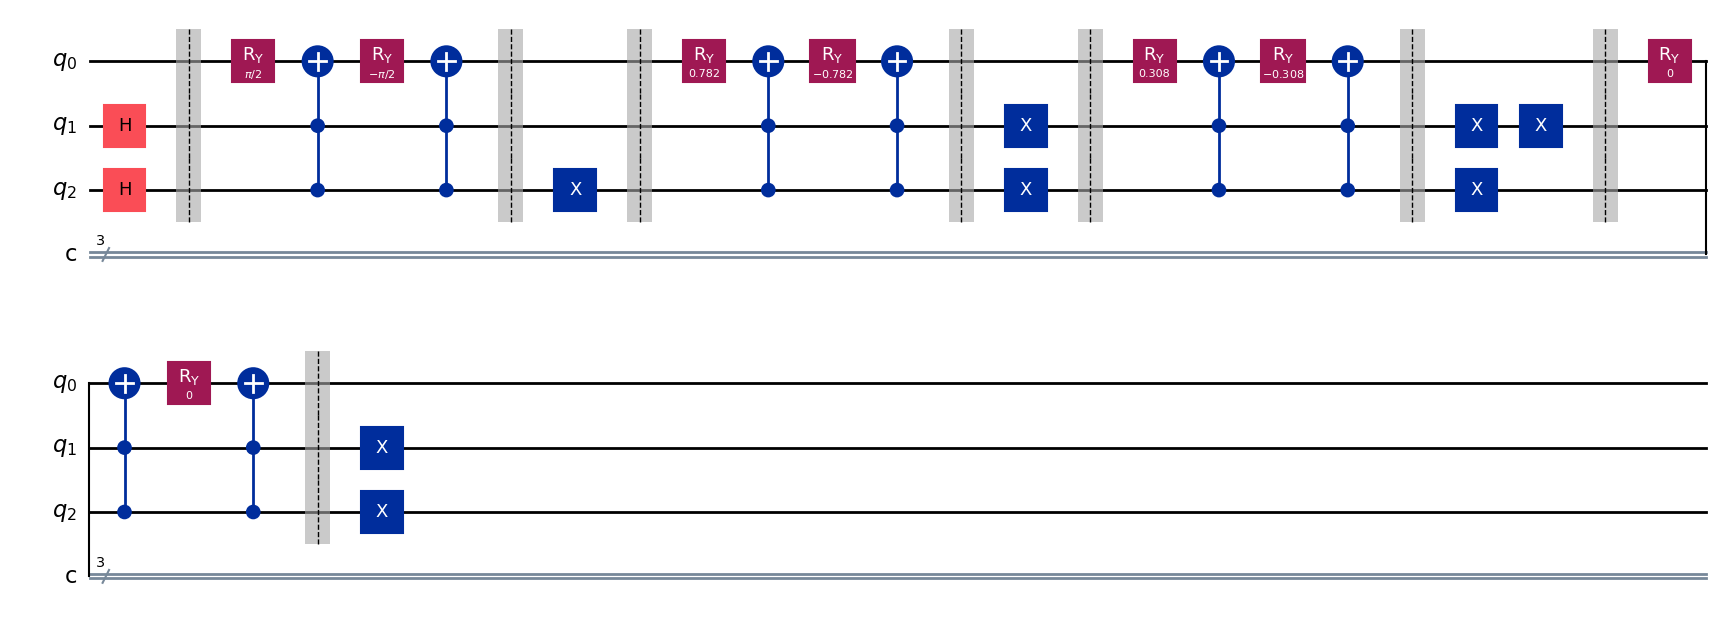

In [182]:
frqi = QuantumCircuit(3,3)
frqi.h(1)
frqi.h(2)

frqi.barrier()
frqi.mcry(np.pi,[1,2],0)
frqi.barrier()

frqi.x(2)
frqi.barrier()
frqi.mcry(127/255 * np.pi,[1,2],0)
frqi.barrier()
frqi.x(2)

frqi.x(1)
frqi.barrier()
frqi.mcry(50/255 *np.pi,[1,2],0)
frqi.barrier()
frqi.x(1)

frqi.x(1)
frqi.x(2)
frqi.barrier()
frqi.mcry(0,[1,2],0)
frqi.barrier()
frqi.x(2)
frqi.x(1)

frqi.draw('mpl')

In [175]:
state_frqi = Statevector(frqi)
state_frqi

Statevector([ 5.00000000e-01+0.j, -1.49530717e-17+0.j,  3.54640654e-01+0.j,
              3.52462773e-01+0.j,  4.76471000e-01+0.j,  1.51576337e-01+0.j,
             -1.51173088e-17+0.j,  5.00000000e-01+0.j],
            dims=(2, 2, 2))


{'010': 12510, '100': 22475, '011': 12592, '000': 25019, '111': 25077, '101': 2327}


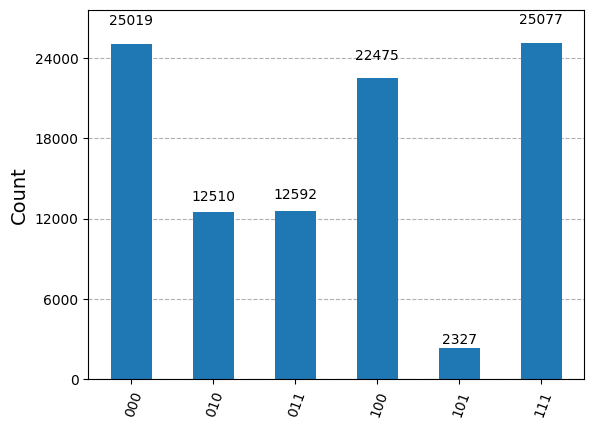

In [156]:
frqi.measure([0,1,2],[0,1,2])
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(frqi, simulator)
#job = execute(compiled_circuit, backend=simulator, shots=100000)
result = simulator.run(compiled_circuit,shots=100000).result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)
plot_histogram(counts)

{'001': 22971, '111': 24988, '110': 12344, '000': 24918, '010': 12519, '101': 2260}


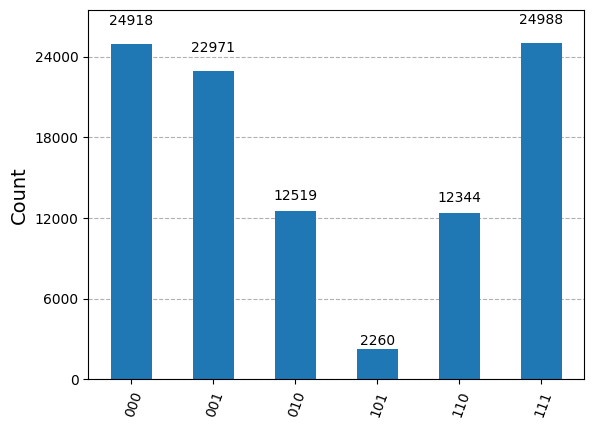

In [176]:
frqi.measure([0,1,2],[2,1,0])
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(frqi, simulator)
#job = execute(compiled_circuit, backend=simulator, shots=100000)
result = simulator.run(compiled_circuit,shots=100000).result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)
plot_histogram(counts)

In [189]:
import numpy as np
from scipy.optimize import least_squares

# Ï∏°Ï†ïÎêú state Í∞úÏàò (prob ÎåÄÏã† countÎ°ú Î≥ÄÍ≤Ω)
count = {
    '000': 25313,
    '001': 22594,
    '010': 12541,
    '011': 0,
    '100': 0,
    '101': 2228,
    '110': 12392,
    '111': 24932
}

# Ï¥ù ÏÉ∑ Ïàò (Î™®Îì† state ÏàòÏùò Ìï©)
total_shots = sum(count.values())

# ÌôïÎ•†Î°ú Î≥ÄÌôò
measured_probs = {key: value / total_shots for key, value in count.items()}

# Ï¥àÍ∏∞ statevector ÏÑ§Ï†ï (Î¨¥ÏûëÏúÑ Î≥µÏÜåÏàò Î≤°ÌÑ∞)
num_qubits = 3
state_vector_init = np.random.rand(2**num_qubits) + 1j * np.random.rand(2**num_qubits)
state_vector_init /= np.linalg.norm(state_vector_init)  # Ï†ïÍ∑úÌôî

# Í∞Å ÌîΩÏÖÄÏùò ÏúÑÏÉÅÏùÑ Î≥µÏõêÌïòÎäî Ìï®Ïàò
def estimate_angle(state_0, state_1):
    if state_0 + state_1 == 0:
        return 0  # Î∂ÑÎ™®Í∞Ä 0Ïù¥Î©¥ 0ÏúºÎ°ú Ï≤òÎ¶¨ (Ìï¥Îãπ ÏÉÅÌÉú ÏóÜÏùå)
    ratio = state_0 / (state_0 + state_1)
    theta = 2 * np.arccos(np.sqrt(ratio))
    return (255 / np.pi) * theta  # 255*pi Í∏∞Ï§Ä Î≥ÄÌôò

# Î≥µÏõêÎêú Í∑∏Î†àÏù¥Ïä§ÏºÄÏùº Í∞í (Í∞Å ÌîΩÏÖÄÏùò ÏúÑÏÉÅ Î≥µÏõê)
gray_1 = estimate_angle(count['000'], count['100'])  # '01'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú
gray_2 = estimate_angle(count['001'], count['101'])  # '10'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú
gray_3 = estimate_angle(count['010'], count['110'])  # '01'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú
gray_4 = estimate_angle(count['011'], count['111'])  # '10'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú
print(f"Î≥µÏõêÎêú Grayscale Í∞í: {gray_1:.2f}, {gray_2:.2f},{gray_3:.2f}, {gray_4:.2f}")

# ÏµúÏÜå Ï†úÍ≥±Î≤ïÏùÑ Ïù¥Ïö©Ìï¥ statevector ÏµúÏ†ÅÌôî
def optimize_statevector(state_vector):
    state_vector = state_vector / np.linalg.norm(state_vector)  # Ï†ïÍ∑úÌôî
    probabilities = np.abs(state_vector)**2  # ÌôïÎ•† Í≥ÑÏÇ∞
    return np.array([probabilities[i] - measured_probs[list(measured_probs.keys())[i]] for i in range(len(measured_probs))])

# ÏµúÏ†ÅÌôî ÏàòÌñâ
result = least_squares(lambda x: optimize_statevector(x + 1j * np.zeros_like(x)), state_vector_init.real)

# ÏµúÏ†ÅÌôîÎêú statevector
restored_statevector = result.x + 1j * np.zeros_like(result.x)
restored_statevector /= np.linalg.norm(restored_statevector)  # Ï†ïÍ∑úÌôî

print("Î≥µÏõêÎêú statevector:", restored_statevector)


Î≥µÏõêÎêú Grayscale Í∞í: 0.00, 49.39,127.01, 255.00
Î≥µÏõêÎêú statevector: [5.03120252e-01+0.j 4.75331452e-01+0.j 3.54132735e-01+0.j
 1.96403008e-04+0.j 8.81530466e-05+0.j 1.49264862e-01+0.j
 3.52022718e-01+0.j 4.99319525e-01+0.j]


In [186]:
from collections import defaultdict

# Î™®Îì† Í∞ÄÎä•Ìïú ÏÉÅÌÉúÎ•º Ìè¨Ìï®Ìïú Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± (3 ÌÅêÎπÑÌä∏Ïùò Í≤ΩÏö∞ 8Í∞úÏùò ÏÉÅÌÉú)
states = ['000', '001', '010', '011', '100', '101', '110', '111']


# defaultdictÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞íÏù¥ ÏóÜÏúºÎ©¥ 0ÏúºÎ°ú ÏÑ§Ï†ï
count_with_zeros = defaultdict(int, count)

# Î™®Îì† Í∞ÄÎä•Ìïú ÏÉÅÌÉúÏóê ÎåÄÌï¥ 0ÏùÑ Ï±ÑÏö∞Í∏∞
for state in states:
    if state not in count_with_zeros:
        count_with_zeros[state] = 0

# Í≤∞Í≥º Ï∂úÎ†•
print("ÏµúÏ¢Ö count with zeros:")
print(dict(count_with_zeros))

count = count_with_zeros

ÏµúÏ¢Ö count with zeros:
{'111': 50097, '001': 44929, '000': 50203, '110': 24887, '010': 25294, '101': 4590, '011': 0, '100': 0}


### ÌôïÎ•† Ïó≠Î≥ÄÌôò

In [168]:
import numpy as np

# Ï∏°Ï†ï Í≤∞Í≥º (ÏÉ∑ Ïàò: 100000)
counts = {
    '000': 25313, '001': 22594, '010': 12541, '011': 0,
    '100': 0, '101': 2228, '110': 12392, '111': 24932
}

def flip_state(state):
    return state[::-1]

# Îí§ÏßëÏñ¥ÏßÑ ÏÉÅÌÉúÏóê Ìï¥ÎãπÌïòÎäî ÏÉàÎ°úÏö¥ count ÏÉùÏÑ±
reversed_count = {}

for state, count_value in counts.items():
    flipped_state = flip_state(state)  # ÏÉÅÌÉúÎ•º Îí§ÏßëÏùå
    reversed_count[flipped_state] = count_value  # Îí§ÏßëÏùÄ ÏÉÅÌÉúÏóê ÎßûÎäî Í∞úÏàò Ìï†Îãπ

sorted_reversed_count = dict(sorted(reversed_count.items()))
# Í≤∞Í≥º Ï∂úÎ†•
print("Îí§ÏßëÌûå ÏÉÅÌÉúÏùò Í∞úÏàò:")
print(sorted_reversed_count)

counts = sorted_reversed_count

# Ï¥ù ÏÉ∑ Ïàò
total_shots = sum(counts.values())

# ÌôïÎ•† Í≥ÑÏÇ∞
probabilities = {state: count / total_shots for state, count in counts.items()}

# Statevector Î≥µÏõê (ÏúÑÏÉÅÏùÄ 0ÏúºÎ°ú ÏÑ§Ï†ï)
restored_statevector = np.array([np.sqrt(prob) for prob in probabilities.values()])

# Ï†ïÍ∑úÌôî (Ïù¥Î°†Ï†ÅÏúºÎ°úÎäî ÌïÑÏöî ÏóÜÏßÄÎßå, ÏïàÏ†ÑÌïòÍ≤å Îã§Ïãú Ï†ïÍ∑úÌôî)
restored_statevector /= np.linalg.norm(restored_statevector)

# Í≤∞Í≥º Ï∂úÎ†•
print("Î≥µÏõêÎêú Statevector:", restored_statevector)


Îí§ÏßëÌûå ÏÉÅÌÉúÏùò Í∞úÏàò:
{'000': 25313, '001': 0, '010': 12541, '011': 12392, '100': 22594, '101': 2228, '110': 0, '111': 24932}
Î≥µÏõêÎêú Statevector: [0.50312026 0.         0.35413274 0.35202273 0.47533146 0.14926487
 0.         0.49931954]


In [169]:
restored_statevector

array([0.50312026, 0.        , 0.35413274, 0.35202273, 0.47533146,
       0.14926487, 0.        , 0.49931954])

In [170]:
state_frqi.data - restored_statevector

array([-3.12026395e-03+0.j, -1.49530717e-17+0.j,  5.07910330e-04+0.j,
        4.40046914e-04+0.j,  1.13953692e-03+0.j,  2.31147180e-03+0.j,
       -1.51173088e-17+0.j,  6.80463030e-04+0.j])

### ÏµúÏÜå Ï†úÍ≥±Î≤ï

In [172]:
import numpy as np
from scipy.optimize import least_squares

# Í∏∞Ï°¥ Ï∏°Ï†ïÎêú Í∞úÏàò (Îí§ÏßëÌûå ÏÉÅÌÉú)
reversed_count = {
    '000': 25313,
    '001': 0,
    '010': 12541,
    '011': 12392,
    '100': 22594,
    '101': 2228,
    '110': 0,
    '111': 24932
}

# ÏÉÅÌÉúÎ•º ÌôïÎ•†Î°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
def count_to_prob(count, total):
    return count / total

# Ï∏°Ï†ïÎêú ÌôïÎ•†ÏùÑ Í≥ÑÏÇ∞
total_measurements = sum(reversed_count.values())
probabilities = {state: count_to_prob(count, total_measurements) for state, count in reversed_count.items()}

# Ï¥àÍ∏∞ ÏÉÅÌÉú Î≤°ÌÑ∞ (Î¨¥ÏûëÏúÑÎ°ú Ï¥àÍ∏∞Ìôî, 8Í∞úÏùò ÏÉÅÌÉúÎ•º 3 qubitÎ°ú ÌëúÌòÑ)
# statevectorÎäî 8Í∞ú ÏõêÏÜåÎ•º Í∞ÄÏ†∏Ïïº ÌïòÎØÄÎ°ú, 8Ï∞®ÏõêÏùò Î≤°ÌÑ∞Î°ú ÏãúÏûë
initial_statevector = np.ones(8) / np.sqrt(8)  # Í∑†Îì± Î∂ÑÌè¨Î°ú Ï¥àÍ∏∞Ìôî

# Ï∏°Ï†ïÎêú ÌôïÎ•†ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏµúÏÜå Ï†úÍ≥±Î≤ïÏùÑ Ïù¥Ïö©Ìï¥ ÏÉÅÌÉú Î≤°ÌÑ∞Î•º ÏµúÏ†ÅÌôîÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def optimize_statevector(state_vector):
    state_vector = state_vector / np.linalg.norm(state_vector)  # Ï†ïÍ∑úÌôî
    probabilities_from_state = np.abs(state_vector)**2  # ÏÉÅÌÉúÎ≤°ÌÑ∞ÏóêÏÑú ÌôïÎ•† Ï∂îÏ∂ú
    # ÌôïÎ•†Í≥º Ï∏°Ï†ïÎêú ÌôïÎ•† Ï∞®Ïù¥Ïùò Ï†úÍ≥±Ìï©ÏùÑ Í≥ÑÏÇ∞
    residuals = [probabilities_from_state[i] - probabilities[list(probabilities.keys())[i]] for i in range(len(probabilities))]
    return residuals

# ÏµúÏÜå Ï†úÍ≥±Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ statevector ÏµúÏ†ÅÌôî
result = least_squares(optimize_statevector, initial_statevector)

# ÏµúÏ†ÅÌôîÎêú statevector
restored_statevector = result.x / np.linalg.norm(result.x)

# ÏµúÏ†ÅÌôîÎêú statevector Ï∂úÎ†•
print("Î≥µÏõêÎêú statevector:")
print(restored_statevector)


Î≥µÏõêÎêú statevector:
[5.03120247e-01 1.80955356e-04 3.54132732e-01 3.52022715e-01
 4.75331448e-01 1.49264860e-01 1.80955355e-04 4.99319521e-01]


In [173]:
state_frqi.data - restored_statevector

array([-0.00312025+0.j, -0.00018096+0.j,  0.00050792+0.j,  0.00044006+0.j,
        0.00113955+0.j,  0.00231148+0.j, -0.00018096+0.j,  0.00068048+0.j])

### Îã§Î•∏ ÌöåÎ°ú but ÎèôÏùºÌïú statevector

In [125]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector

# Ï≤´ Î≤àÏß∏ ÌöåÎ°ú
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0, 1)

# Îëê Î≤àÏß∏ ÌöåÎ°ú (Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Bell State ÏÉùÏÑ±)
qc2 = QuantumCircuit(2)
qc2.h(1)
qc2.cx(1, 0)

# ÏÉÅÌÉú Î≤°ÌÑ∞ ÎπÑÍµê
sv1 = Statevector(qc1)
sv2 = Statevector(qc2)

print("Statevector 1:", sv1)
print("Statevector 2:", sv2)


Statevector 1: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Statevector 2: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


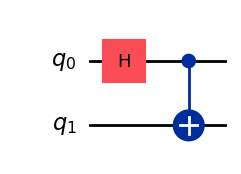

In [126]:
qc1.draw('mpl')

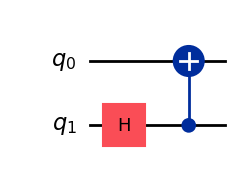

In [127]:
qc2.draw('mpl')

Measurement results for QC1: {'00': 5001, '11': 4999}
Measurement results for QC2: {'11': 4968, '00': 5032}


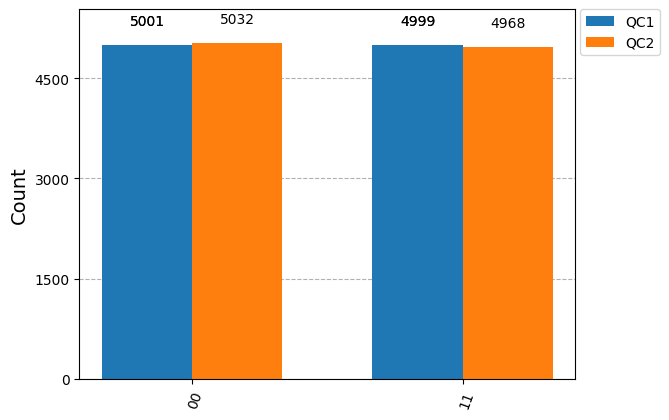

In [130]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

# Ï≤´ Î≤àÏß∏ ÌöåÎ°ú (Hadamard + CNOT)
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.cx(0, 1)
qc1.measure([0,1], [0,1])  # Ï∏°Ï†ï

# Îëê Î≤àÏß∏ ÌöåÎ°ú (Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Bell State ÏÉùÏÑ±)
qc2 = QuantumCircuit(2, 2)
qc2.h(1)
qc2.cx(1, 0)
qc2.measure([0,1], [0,1])  # Ï∏°Ï†ï


# ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ ÏÑ§Ï†ï
simulator = Aer.get_backend("qasm_simulator")

# Ï≤´ Î≤àÏß∏ ÌöåÎ°ú Ïã§Ìñâ
compiled_qc1 = transpile(qc1, simulator)
result1 = simulator.run(compiled_qc1, shots=10000).result()

counts1 = result1.get_counts()

# Îëê Î≤àÏß∏ ÌöåÎ°ú Ïã§Ìñâ
compiled_qc2 = transpile(qc2, simulator)
result2= simulator.run(compiled_qc2, shots=10000).result()
counts2 = result2.get_counts()


# Ï∏°Ï†ï Í≤∞Í≥º ÎπÑÍµê
print("Measurement results for QC1:", counts1)
print("Measurement results for QC2:", counts2)

# ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÏãúÍ∞ÅÌôî
plot_histogram([counts1, counts2], legend=["QC1", "QC2"])


### frqi with QFT

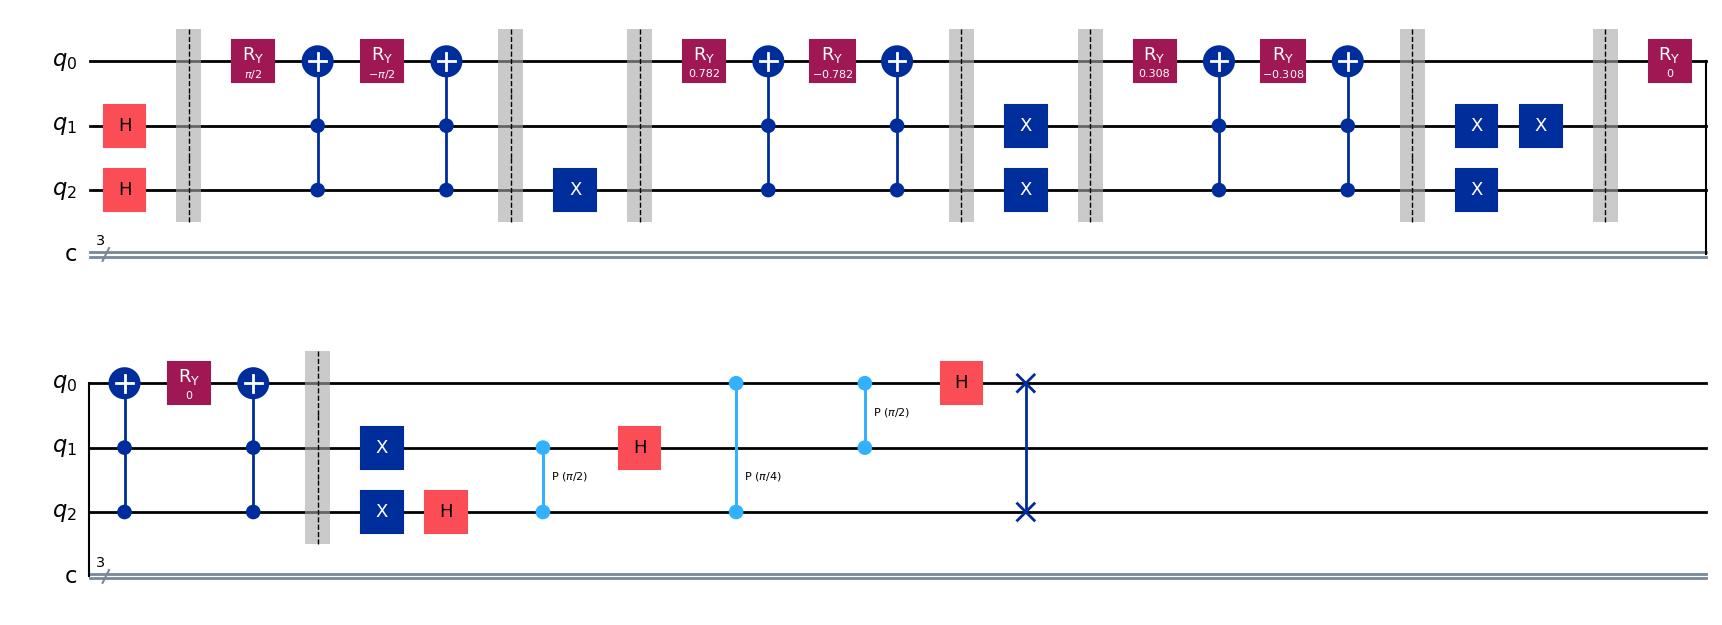

In [231]:
frqi = QuantumCircuit(3,3)
frqi.h(1)
frqi.h(2)

frqi.barrier()
frqi.mcry(np.pi,[1,2],0)
frqi.barrier()

frqi.x(2)
frqi.barrier()
frqi.mcry(127/255 * np.pi,[1,2],0)
frqi.barrier()
frqi.x(2)

frqi.x(1)
frqi.barrier()
frqi.mcry(50/255 *np.pi,[1,2],0)
frqi.barrier()
frqi.x(1)

frqi.x(1)
frqi.x(2)
frqi.barrier()
frqi.mcry(0,[1,2],0)
frqi.barrier()
frqi.x(2)
frqi.x(1)

# 2. QFT Ï†ÅÏö©
qft_circuit = QFT(num_qubits=3).decompose()  # Create and decompose QFT for 2 qubits

frqi_qft = frqi.compose(qft_circuit)
frqi_qft.draw('mpl')

{'000': 681143, '010': 109806, '101': 39770, '011': 110087, '001': 13211, '110': 40744, '100': 2606, '111': 2633}


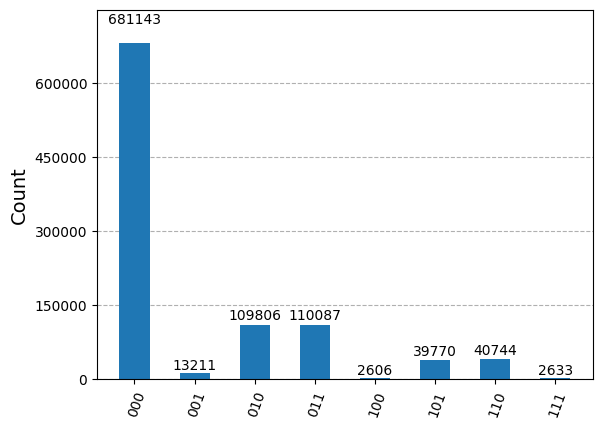

In [200]:
frqi_qft.measure([0,1,2],[2,1,0])
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(frqi_qft, simulator)
#job = execute(compiled_circuit, backend=simulator, shots=100000)
result = simulator.run(compiled_circuit,shots=1000000).result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)
plot_histogram(counts)

In [ ]:
statevector_frqi_qft = Statevector(frqi_qft).data
statevector_frqi_qft

array([0.82560047+0.j        , 0.00730898+0.05060601j,
       0.21985023-0.24780078j, 0.00932854-0.2001628j ,
       0.11563761+0.j        , 0.00932854+0.2001628j ,
       0.21985023+0.24780078j, 0.00730898-0.05060601j])

In [204]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.ignis.verification import state_tomography

frqi_qft.measure([0,1,2],[2,1,0])

# 'state_tomography'Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌöåÎ°úÏùò ÏÉÅÌÉúÎ•º Ï∂îÏ†ï
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=100000)
result = job.result()

# Ï∏°Ï†ïÎêú counts
counts = result.get_counts(qc)
print("Counts:", counts)

# State TomographyÎ•º ÏúÑÌïú ÌöåÎ°ú ÎßåÎì§Í∏∞
tomography_circuits = state_tomography.state_tomography_circuits(qc, [0, 1, 2])

# Î∞ÄÎèÑ ÌñâÎ†¨ Ï∂îÏ†ï
tomography_results = [simulator.run(circuit, shots=100000).result() for circuit in tomography_circuits]
state_tomography_results = [result.get_counts() for result in tomography_results]

# Î∞ÄÎèÑ ÌñâÎ†¨ Î≥µÏõê (ÌõÑÏ≤òÎ¶¨)
density_matrix = DensityMatrix.from_tomography_data(state_tomography_results)
print("Density Matrix:", density_matrix)

# Î∞ÄÎèÑ ÌñâÎ†¨ÏóêÏÑú ÏÉÅÌÉú Î≤°ÌÑ∞Î°ú Î≥µÏõê
state_vector = density_matrix.to_statevector()
print("Restored State Vector:", state_vector)


ModuleNotFoundError: No module named 'qiskit.ignis'

In [205]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT

# Ï∏°Ï†ï Í≤∞Í≥º
counts = {
    '000': 25313, '001': 22594, '010': 12541, '011': 0,
    '100': 0, '101': 2228, '110': 12392, '111': 24932
}
total_shots = sum(counts.values())

# ÌôïÎ•† Í≥ÑÏÇ∞
probabilities = {state: count / total_shots for state, count in counts.items()}

# ÏßÑÌè≠ Î≥µÏõê (ÏúÑÏÉÅÏùÄ ÎØ∏Ï†ï)
amplitudes = np.array([np.sqrt(prob) for prob in probabilities.values()])

# Ï†ïÍ∑úÌôî
amplitudes /= np.linalg.norm(amplitudes)

# Statevector Î≥µÏõê
restored_sv = Statevector(amplitudes)

print("üîπ Î≥µÏõêÎêú ÏßÑÌè≠ Í∏∞Î∞ò Statevector:", restored_sv)

### QPE Ï†ÅÏö© ###
# 3Í∞ú Îç∞Ïù¥ÌÑ∞ ÌÅêÎπó + 3Í∞ú ancilla ÌÅêÎπó ÏÇ¨Ïö©
n_qubits = 3  # Îç∞Ïù¥ÌÑ∞ ÌÅêÎπó Í∞úÏàò
ancilla_qubits = 3  # ÏúÑÏÉÅ Ï∏°Ï†ïÏö© ÌÅêÎπó

qpe = QuantumCircuit(n_qubits + ancilla_qubits, ancilla_qubits)

# Ï¥àÍ∏∞ ÏÉÅÌÉú Î°úÎìú (Î≥µÏõêÎêú ÏÉÅÌÉú Î≤°ÌÑ∞Î•º Ï†ÅÏö©)
qpe.initialize(restored_sv, range(n_qubits))

# Hadamard Ï†ÅÏö© (Ancilla ÌÅêÎπó Ï¥àÍ∏∞Ìôî)
for qubit in range(n_qubits, n_qubits + ancilla_qubits):
    qpe.h(qubit)

# Controlled-U Ïó∞ÏÇ∞ (ÏòàÏ†úÏóêÏÑúÎäî Îã®Ïàú Rz Ï†ÅÏö©)
for i in range(ancilla_qubits):
    angle = np.pi / (2 ** i)  # QPE ÏúÑÏÉÅ Îã®ÏúÑ (Í∞ÄÏÉÅÏùò Ïú†ÎãàÌÉÄÎ¶¨)
    qpe.cp(angle, i, n_qubits)  # Controlled-Phase Ï†ÅÏö©

# Ïó≠ QFT Ï†ÅÏö©
qpe.append(QFT(ancilla_qubits).inverse(), range(n_qubits, n_qubits + ancilla_qubits))

# Ï∏°Ï†ï
qpe.measure(range(n_qubits, n_qubits + ancilla_qubits), range(ancilla_qubits))

# ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ
sim = Aer.get_backend('aer_simulator')
qpe = transpile(qpe, sim)
#qobj = assemble(qpe, shots=10000)
result = sim.run(qpe, shots=10000).result()
counts = result.get_counts()

print("üîπ QPE Ï∏°Ï†ï Í≤∞Í≥º:", counts)


üîπ Î≥µÏõêÎêú ÏßÑÌè≠ Í∏∞Î∞ò Statevector: Statevector([0.50312026+0.j, 0.47533146+0.j, 0.35413274+0.j,
             0.        +0.j, 0.        +0.j, 0.14926487+0.j,
             0.35202273+0.j, 0.49931954+0.j],
            dims=(2, 2, 2))
üîπ QPE Ï∏°Ï†ï Í≤∞Í≥º: {'100': 4540, '000': 5460}


In [96]:
from qiskit import QuantumCircuit
import numpy as np

# 1. ÏÉÅÌÉú Ï¥àÍ∏∞Ìôî: Ï≤´ Î≤àÏß∏ ÌÅêÎπóÏóê Hadamard Ï†ÅÏö©
qc = QuantumCircuit(3, 3)
qc.h(0)  # Ï≤´ Î≤àÏß∏ ÌÅêÎπóÏóê Hadamard Ïó∞ÏÇ∞

# 2. Ïú†ÎãàÌÉÄÎ¶¨ Ïó∞ÏÇ∞: Ï≤´ Î≤àÏß∏ ÌÅêÎπóÏóê U = e^(iœï) Ïó∞ÏÇ∞ Ï†ÅÏö©
œï = np.pi / 4  # ÏòàÏãúÎ°ú œï = œÄ/4Î°ú ÏÑ§Ï†ï
qc.rz(œï, 0)  # Ï≤´ Î≤àÏß∏ ÌÅêÎπóÏóê rz(œï) Ïó∞ÏÇ∞ Ï†ÅÏö©

# 3. QFT Ï†ÅÏö©: ÏúÑÏÉÅ Ï∂îÏ†ïÏùÑ ÏúÑÌïú ÏñëÏûê Ìë∏Î¶¨Ïóê Î≥ÄÌôò
qc.h(1)
qc.cx(0, 1)
qc.h(2)
qc.cx(0, 2)

# 4. Ï∏°Ï†ï
qc.measure([0, 1, 2], [0, 1, 2])

# 5. ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ Ïã§Ìñâ
simulator = Aer.get_backend('qasm_simulator')
qc_tran=transpile(qc,simulator)
result = simulator.run(qc_tran, shots=100000).result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print("Ï∏°Ï†ï Í≤∞Í≥º:", counts)

# Ïù¥ Í≤∞Í≥ºÏóêÏÑú ÏúÑÏÉÅ Ï†ïÎ≥¥ (œï)Î•º Ï∂îÏ†ïÌï† Ïàò ÏûàÏùå


Ï∏°Ï†ï Í≤∞Í≥º: {'011': 12492, '001': 12587, '101': 12247, '010': 12769, '100': 12460, '110': 12552, '000': 12402, '111': 12491}


In [98]:
import numpy as np
from scipy.optimize import minimize

# üìå Ï£ºÏñ¥ÏßÑ Ï∏°Ï†ï Í≤∞Í≥º (Counts)
counts = {
    '000': 25313, '001': 22594, '010': 12541, '011': 0,
    '100': 0, '101': 2228, '110': 12392, '111': 24932
}

# üìå Ï∏°Ï†ïÎêú ÌôïÎ•†Î°ú Î≥ÄÌôò
total_shots = sum(counts.values())
probabilities = {state: count / total_shots for state, count in counts.items()}

# üìå Ï¥àÍ∏∞ statevector ÏÑ§Ï†ï (ÎûúÎç§ ÏúÑÏÉÅ & ÏßÑÌè≠)
num_states = len(probabilities)
initial_params = np.random.rand(2 * num_states)  # ÏßÑÌè≠(num_states) + ÏúÑÏÉÅ(num_states)

# üìå ÏÜêÏã§ Ìï®Ïàò Ï†ïÏùò (ÏµúÏÜåÌôîÌï† ÎåÄÏÉÅ)
def loss_function(params):
    amplitudes = params[:num_states]  # ÏßÑÌè≠ (ÏñëÏàò)
    phases = params[num_states:]      # ÏúÑÏÉÅ (-pi ~ pi)
    
    # Ï†ïÍ∑úÌôî
    amplitudes /= np.linalg.norm(amplitudes)
    
    # Î≥µÏÜåÏàò ÌòïÌÉúÏùò statevector Î≥µÏõê
    reconstructed_sv = amplitudes * np.exp(1j * phases)
    
    # Î≥µÏõêÎêú ÌôïÎ•† Í≥ÑÏÇ∞
    reconstructed_probs = np.abs(reconstructed_sv) ** 2
    
    # Ï∏°Ï†ïÎêú ÌôïÎ•†Í≥º ÎπÑÍµêÌïòÏó¨ Ïò§Ï∞®(loss) Í≥ÑÏÇ∞ (L2 Norm ÏÇ¨Ïö©)
    loss = np.sum((reconstructed_probs - np.array(list(probabilities.values())))**2)
    return loss

# üìå ÏµúÏ†ÅÌôî Ïã§Ìñâ (SPSA, COBYLA, BFGS Îì± ÏÇ¨Ïö© Í∞ÄÎä•)
result = minimize(loss_function, initial_params, method='BFGS')

# üìå ÏµúÏ†ÅÌôîÎêú statevector Î≥µÏõê
optimized_amplitudes = result.x[:num_states]
optimized_phases = result.x[num_states:]

# Ï†ïÍ∑úÌôî
optimized_amplitudes /= np.linalg.norm(optimized_amplitudes)

# ÏµúÏ¢Ö Î≥µÏõêÎêú statevector
restored_statevector = optimized_amplitudes * np.exp(1j * optimized_phases)

# Í≤∞Í≥º Ï∂úÎ†•
print("Î≥µÏõêÎêú statevector:", restored_statevector)


Î≥µÏõêÎêú statevector: [ 0.50141705+0.04123167j  0.4731792 +0.04491481j  0.23860451+0.26164818j
 -0.00394439-0.00533885j  0.00592512+0.00542334j  0.12655799+0.07904809j
  0.34878033+0.04746732j  0.45175133+0.21264732j]


In [101]:
import numpy as np
from qiskit import QuantumCircuit,  assemble
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import state_fidelity, DensityMatrix
from qiskit_experiments.library.tomography import StateTomography
from qiskit_experiments.framework import ExperimentData

# üìå Ï£ºÏñ¥ÏßÑ Ï∏°Ï†ï Í≤∞Í≥º (Counts)
counts = {
    '000': 25313, '001': 22594, '010': 12541, '011': 0,
    '100': 0, '101': 2228, '110': 12392, '111': 24932
}

# üìå QSTÎ•º ÏúÑÌïú ÌöåÎ°ú ÏÉùÏÑ± (3 Qubit Í∏∞Ï§Ä)
num_qubits = 3
qst_circuit = QuantumCircuit(num_qubits)

# QST Ïã§Ìóò ÏàòÌñâ (Ïó¨Îü¨ Í∏∞Ï†ÄÏóêÏÑú Ï∏°Ï†ï)
qst_experiment = StateTomography(qst_circuit)

# QST Ïã§Ìóò Ïã§Ìñâ (ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ ÏÇ¨Ïö©)
simulator = Aer.get_backend('qasm_simulator')
qst_result = qst_experiment.run(simulator).block_for_results()

# üìå Î≥µÏõêÎêú Î∞ÄÎèÑ ÌñâÎ†¨ (Density Matrix)
reconstructed_rho = qst_result.analysis_results("state").value

# üìå Î≥µÏõêÎêú ÏÉÅÌÉú Î≤°ÌÑ∞ Ï∂îÏ∂ú (Í≥†Ïú†Í∞í Î∂ÑÌï¥)
eigvals, eigvecs = np.linalg.eigh(reconstructed_rho)

# Í∞ÄÏû• ÌÅ∞ Í≥†Ïú†Í∞íÏóê Ìï¥ÎãπÌïòÎäî Í≥†Ïú† Î≤°ÌÑ∞ ÏÑ†ÌÉù
restored_statevector = eigvecs[:, np.argmax(eigvals)]

# üìå Î≥µÏõêÎêú StateVector Ï∂úÎ†•
print("Î≥µÏõêÎêú statevector:", restored_statevector)


Î≥µÏõêÎêú statevector: [-0.99976476+0.j         -0.00388354+0.00152658j  0.0103991 +0.00145687j
 -0.00334051-0.00301006j  0.0093978 +0.00308891j  0.00701239+0.00065238j
 -0.00497609-0.00154912j -0.01197167+0.00214197j]


In [207]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

# üìå 1Ô∏è‚É£ Ï¥àÍ∏∞ ÏÉÅÌÉúÎ•º ÏÉùÏÑ±ÌïòÎäî ÏñëÏûê ÌöåÎ°ú
qc = QuantumCircuit(3)
qc.h(1)
qc.h(2)
qc.mcry(np.pi, [1,2], 0)
qc.x(2)
qc.mcry(127/255 * np.pi, [1,2], 0)
qc.x(2)
qc.x(1)
qc.mcry(50/255 * np.pi, [1,2], 0)
qc.x(1)
qc.x(1)
qc.x(2)
qc.mcry(0, [1,2], 0)
qc.x(2)
qc.x(1)

# üìå 2Ô∏è‚É£ QPEÎ•º ÏúÑÌïú Î≥¥Ï°∞ Ìï®Ïàò Ï†ïÏùò
def qpe_circuit(target_circuit, num_qubits):
    """
    QPEÎ•º ÏúÑÌïú ÌöåÎ°ú ÏÉùÏÑ±
    target_circuit: ÏúÑÏÉÅÏùÑ Ï∏°Ï†ïÌï† Ïú†ÎãàÌÉÄÎ¶¨ Ïó∞ÏÇ∞Ïù¥ Ìè¨Ìï®Îêú ÌöåÎ°ú
    num_qubits: ÏúÑÏÉÅÏùÑ Ï∏°Ï†ïÌï† ÏãúÏä§ÌÖúÏùò ÌÅêÎπÑÌä∏ Ïàò
    """
    qpe = QuantumCircuit(num_qubits + 1, num_qubits)  # Î≥¥Ï°∞ ÌÅêÎπÑÌä∏ Ìè¨Ìï®
    
    # Hadamard Ï†ÅÏö©ÌïòÏó¨ Í∑†Îì±Ìïú ÏÉÅÌÉú Ï§ÄÎπÑ
    for qubit in range(num_qubits):
        qpe.h(qubit)
    
    # Target ÌöåÎ°ú(ÏúÑÏÉÅ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî Ïú†ÎãàÌÉÄÎ¶¨ Ïó∞ÏÇ∞) Ï†ÅÏö©
    target_instruction = target_circuit.to_instruction()
    qpe.append(target_instruction, list(range(num_qubits + 1)))  # Ïò¨Î∞îÎ•∏ ÌÅêÎπÑÌä∏ Ïó∞Í≤∞

    # Inverse QFT Ï†ÅÏö© (QFT Ïó≠Î≥ÄÌôòÏùÑ Ìï¥Ïïº Ï†ïÌôïÌïú ÏúÑÏÉÅ Ï∏°Ï†ï Í∞ÄÎä•)
    for i in range(num_qubits // 2):
        qpe.swap(i, num_qubits - i - 1)

    # Ï∏°Ï†ï
    qpe.measure(range(num_qubits), range(num_qubits))
    
    return qpe

# üìå 3Ô∏è‚É£ QPE ÌöåÎ°ú Ïã§Ìñâ
qpe_qc = qpe_circuit(qc, 2)

# üìå 4Ô∏è‚É£ QPE ÌöåÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò
simulator = Aer.get_backend('qasm_simulator')
t_qc = transpile(qpe_qc, simulator)

qpe_result = simulator.run(t_qc, shots=10000).result()
qpe_counts = qpe_result.get_counts()

# üìå 5Ô∏è‚É£ Ï∂úÎ†•
print("QPE Ï∏°Ï†ï Í≤∞Í≥º:", qpe_counts)


QPE Ï∏°Ï†ï Í≤∞Í≥º: {'00': 3682, '10': 6318}


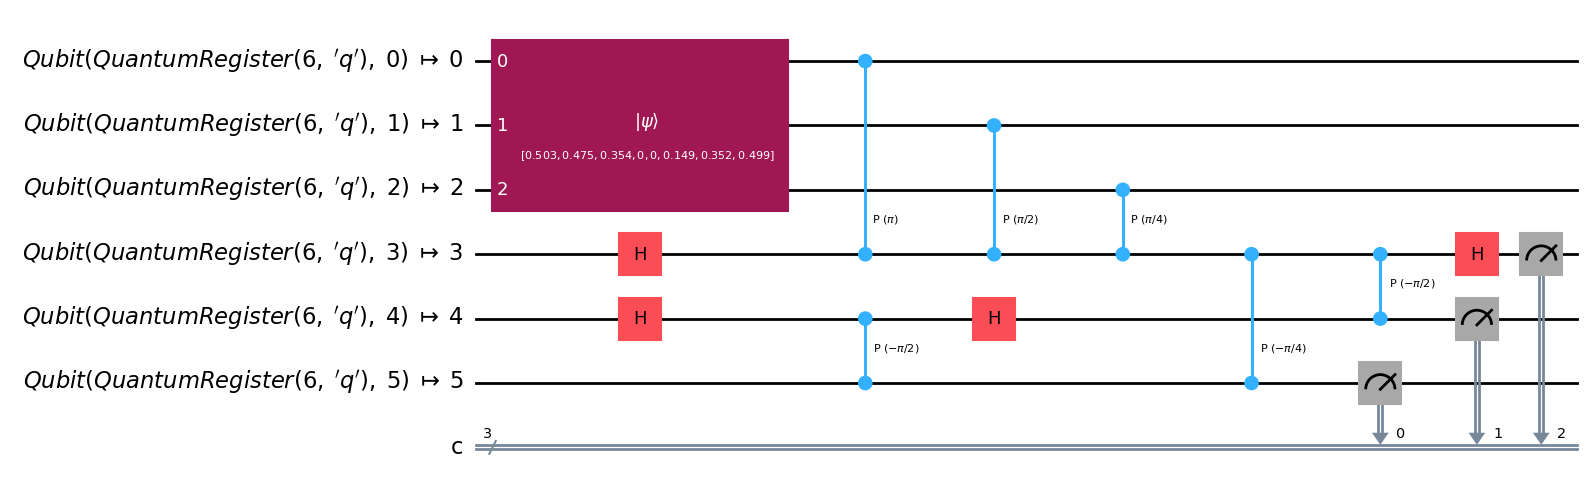

In [208]:
qpe.draw('mpl')

In [230]:
def reverse_and_sort_counts(counts):
    """
    Ï∏°Ï†ïÎêú stateÎì§ÏùÑ ÎπÑÌä∏ ÏàúÏÑúÎ•º Î∞òÎåÄÎ°ú Î∞îÍæº ÌõÑ Ï†ïÎ†¨ÌïòÏó¨ Ï†ÄÏû•ÌïòÎäî Ìï®Ïàò
    """
    reversed_counts = {}

    # 1. ÎπÑÌä∏ ÏàúÏÑú Îí§ÏßëÍ∏∞
    for state, value in counts.items():
        reversed_state = state[::-1]  # ÎπÑÌä∏ Îí§ÏßëÍ∏∞
        reversed_counts[reversed_state] = value

    # 2. Ï†ïÎ†¨ (stateÎ•º 2ÏßÑÏàò Í∞í Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨)
    sorted_counts = dict(sorted(reversed_counts.items(), key=lambda x: int(x[0], 2)))

    return sorted_counts

# ÏòàÏ†ú Ï∏°Ï†ï Í≤∞Í≥º
counts = {
    '000': 25313,
    '001': 22594,
    '010': 12541,
    '011': 0,
    '100': 0,
    '101': 2228,
    '110': 12392,
    '111': 24932
}

# Ìï®Ïàò Ïã§Ìñâ
sorted_reversed_counts = reverse_and_sort_counts(counts)

# Í≤∞Í≥º Ï∂úÎ†•
print(sorted_reversed_counts)


{'000': 25313, '001': 0, '010': 12541, '011': 12392, '100': 22594, '101': 2228, '110': 0, '111': 24932}


In [74]:
state_frqi

Statevector([ 5.00000000e-01+0.j, -1.49530717e-17+0.j,  3.54640654e-01+0.j,
              3.52462773e-01+0.j,  4.76471000e-01+0.j,  1.51576337e-01+0.j,
             -1.51173088e-17+0.j,  5.00000000e-01+0.j],
            dims=(2, 2, 2))


In [75]:
error = np.array(state_frqi)-restored_statevector
error

array([-0.01256549+0.j, -0.49199223+0.j,  0.01295989+0.j,  0.35246269+0.j,
        0.47647092+0.j,  0.15157821+0.j, -0.34126627+0.j, -0.01187093+0.j])

Before qft =  Statevector([ 5.00000000e-01+0.j, -1.49530717e-17+0.j,  3.54640654e-01+0.j,
              3.52462773e-01+0.j,  4.76471000e-01+0.j,  1.51576337e-01+0.j,
             -1.51173088e-17+0.j,  5.00000000e-01+0.j],
            dims=(2, 2, 2))


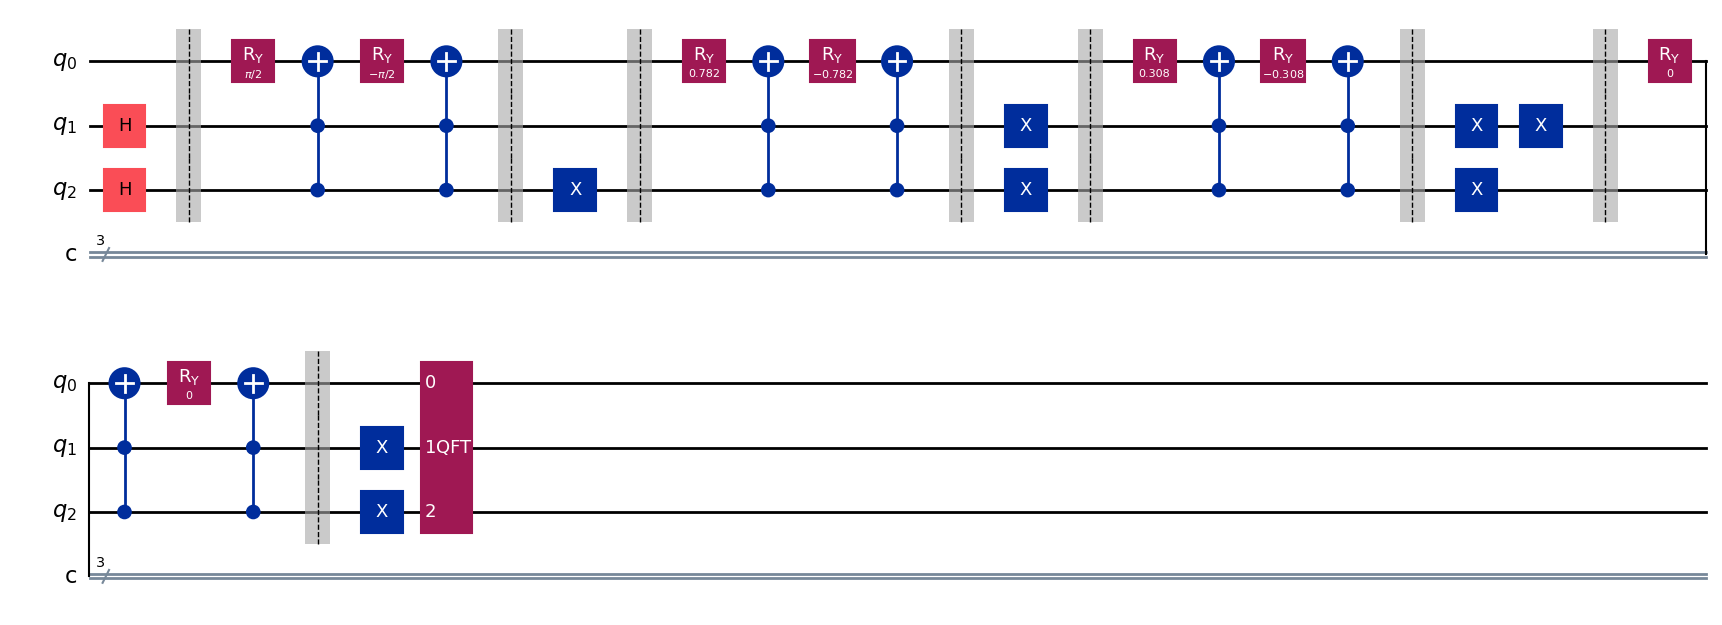

In [40]:
frqi_state = Statevector(frqi)
print("Before qft = ", frqi_state)


qft_circuit = QFT(num_qubits=3, do_swaps=False).decompose()  # Create and decompose QFT for 2 qubits
#frqi_qft = frqi.compose(qft_circuit)
frqi.append(qft_circuit,[0,1,2])
#frqi.h([0,1,2])
frqi.draw('mpl')

In [41]:
frqi_qft_state = Statevector(frqi)

frqi_qft_state_classic = frqi_qft_state.data
print("After qft =",frqi_qft_state_classic)

After qft = [0.82560047+0.j         0.11563761+0.j         0.21985023-0.24780078j
 0.21985023+0.24780078j 0.00730898+0.05060601j 0.00932854+0.2001628j
 0.00932854-0.2001628j  0.00730898-0.05060601j]


In [240]:
idft_qft_frqi_state_classic = np.fft.fft(frqi_qft_state_classic)
idft_qft_frqi_state_classic = 0.5*np.array(idft_qft_frqi_state_classic)
idft_qft_frqi_state_classic

array([0.70710678+2.77555756e-17j, 0.38250251-4.19565433e-01j,
       0.30334936+3.00381326e-01j, 0.50525798+1.43498195e-01j,
       0.35498143-3.97357558e-01j, 0.388151  +1.58437726e-01j,
       0.30038133+1.98188261e-01j, 0.36067149+1.64174820e-02j])

In [258]:
frqi_qft_state = Statevector(qc)

frqi_qft_state_classic = frqi_qft_state.data
print("After qft =",frqi_qft_state_classic)

After qft = [ 0.82560047+0.j         -0.02795055+0.j         -0.04527157+0.07322212j
 -0.04527157-0.07322212j  0.30232117-0.00958792j  0.05123223+0.23932314j
  0.05123223-0.23932314j  0.30232117+0.00958792j]


In [259]:
idft_qft_frqi_state_classic = np.fft.fft(frqi_qft_state_classic)
idft_qft_frqi_state_classic = 0.5*np.array(idft_qft_frqi_state_classic)
idft_qft_frqi_state_classic

array([ 0.70710678+0.j        ,  0.39891826+0.14859805j,
        0.71245916+0.19514051j, -0.10342151+0.16276573j,
        0.42677551-0.17568894j,  0.43690631-0.04250633j,
        0.40950182-0.03862741j,  0.31415555-0.2496816j ])

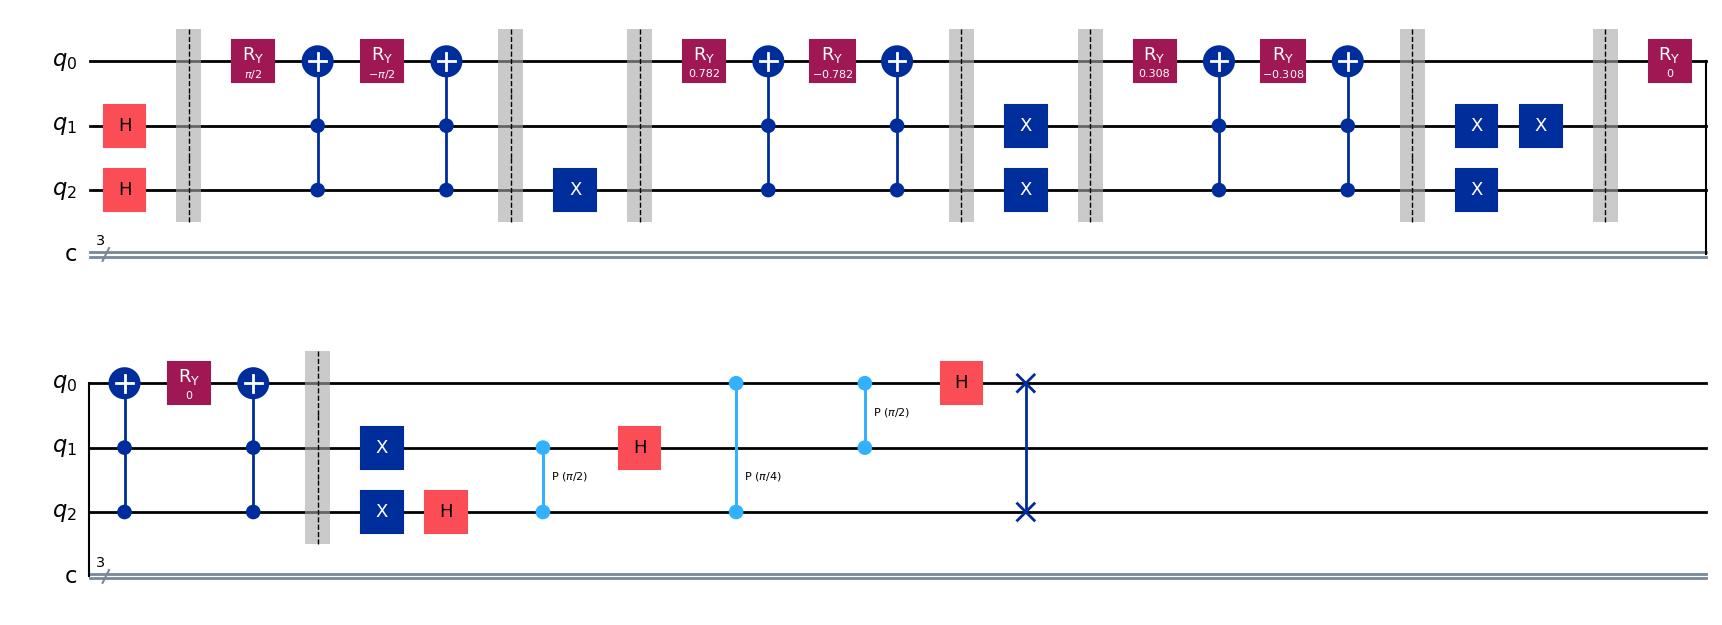

In [247]:
frqi_qft = QuantumCircuit(3,3)
frqi_qft.h(1)
frqi_qft.h(2)

frqi_qft.barrier()
frqi_qft.mcry(np.pi,[1,2],0)
frqi_qft.barrier()

frqi_qft.x(2)
frqi_qft.barrier()
frqi_qft.mcry(127/255 * np.pi,[1,2],0)
frqi_qft.barrier()
frqi_qft.x(2)

frqi_qft.x(1)
frqi_qft.barrier()
frqi_qft.mcry(50/255 *np.pi,[1,2],0)
frqi_qft.barrier()
frqi_qft.x(1)

frqi_qft.x(1)
frqi_qft.x(2)
frqi_qft.barrier()
frqi_qft.mcry(0,[1,2],0)
frqi_qft.barrier()
frqi_qft.x(2)
frqi_qft.x(1)

qft_circuit = QFT(num_qubits=3).decompose()
frqi_qft = frqi_qft.compose(qft_circuit)
frqi_qft.draw('mpl')


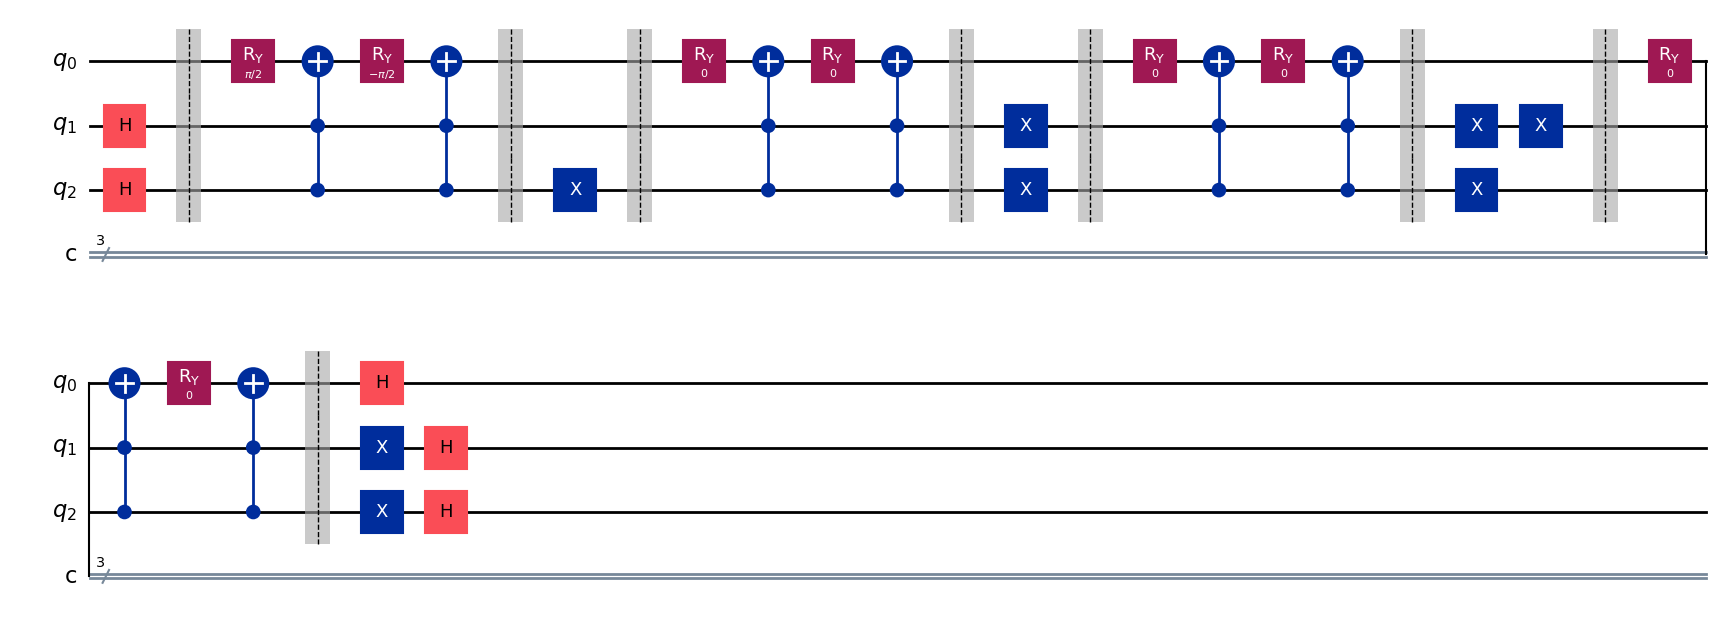

In [ ]:
filter_qft = QuantumCircuit(3,3)
filter_qft.h(1)
filter_qft.h(2)

filter_qft.barrier()
filter_qft.mcry(np.pi,[1,2],0)
filter_qft.barrier()

filter_qft.x(2)
filter_qft.barrier()
filter_qft.mcry(0 * np.pi,[1,2],0)
filter_qft.barrier()
filter_qft.x(2)

filter_qft.x(1)
filter_qft.barrier()
filter_qft.mcry(0 *np.pi,[1,2],0)
filter_qft.barrier()
filter_qft.x(1)

filter_qft.x(1)
filter_qft.x(2)
filter_qft.barrier()
filter_qft.mcry(0,[1,2],0)
filter_qft.barrier()
filter_qft.x(2)
filter_qft.x(1)


qft_circuit = QFT(num_qubits=3).decompose()
filter_qft = filter_qft.compose(qft_circuit)
filter_qft.draw('mpl')

In [246]:
element_wise_result_state.data

array([ 9.48708330e-01+0.j,  6.64403454e-02+0.j,  7.18524030e-19+0.j,
        2.68691951e-01+0.j,  1.04441396e-18+0.j,  1.37580888e-01+0.j,
       -9.95980088e-36+0.j,  6.64403454e-02+0.j])

|frqi> =  Statevector([ 0.82560047+0.j,  0.11563761+0.j, -0.02795055+0.j,
              0.467651  +0.j,  0.02795055+0.j,  0.23945578+0.j,
             -0.11849369+0.j, -0.11563761+0.j],
            dims=(2, 2, 2))
|filter> =  Statevector([ 7.07106781e-01+0.j,  3.53553391e-01+0.j, -1.58187870e-17+0.j,
              3.53553391e-01+0.j,  2.29934717e-17+0.j,  3.53553391e-01+0.j,
              5.17222793e-35+0.j, -3.53553391e-01+0.j],
            dims=(2, 2, 2))
Element-wise product result =  Statevector([ 5.83787691e-01+0.j,  4.08840679e-02+0.j,  4.42143777e-19-0.j,
              1.65339598e-01+0.j,  6.42680150e-19+0.j,  8.46604021e-02+0.j,
             -6.12876368e-36+0.j,  4.08840679e-02-0.j],
            dims=(2, 2, 2))


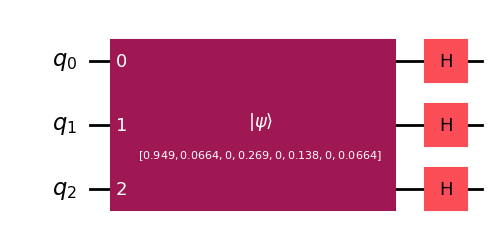

In [240]:
state_frqi_qft = Statevector(frqi_qft)
state_filter_qft = Statevector(filter_qft) 
print("|frqi> = ", state_frqi_qft)
print("|filter> = ", state_filter_qft)

element_wise = state_frqi_qft.data * state_filter_qft.data
element_wise_result_state = Statevector(element_wise)

print("Element-wise product result = ", element_wise_result_state)
coeff = np.absolute(element_wise_result_state.data[0])
element_wise_result_state = element_wise_result_state / np.linalg.norm(element_wise_result_state.data)
element_wise_result = QuantumCircuit(3)
element_wise_result.initialize(element_wise_result_state)
element_wise_result.h([0,1,2])

element_wise_result.draw('mpl')

In [243]:
state_result_qft = Statevector(element_wise_result)
state_result_qft = state_result_qft * np.sqrt(2) * coeff
state_result_qft

Statevector([0.43429772+0.j, 0.11954653+0.j, 0.23865161+0.j,
             0.31519264+0.j, 0.31519264+0.j, 0.23865161+0.j,
             0.19712064+0.j, 0.35672361+0.j],
            dims=(2, 2, 2))


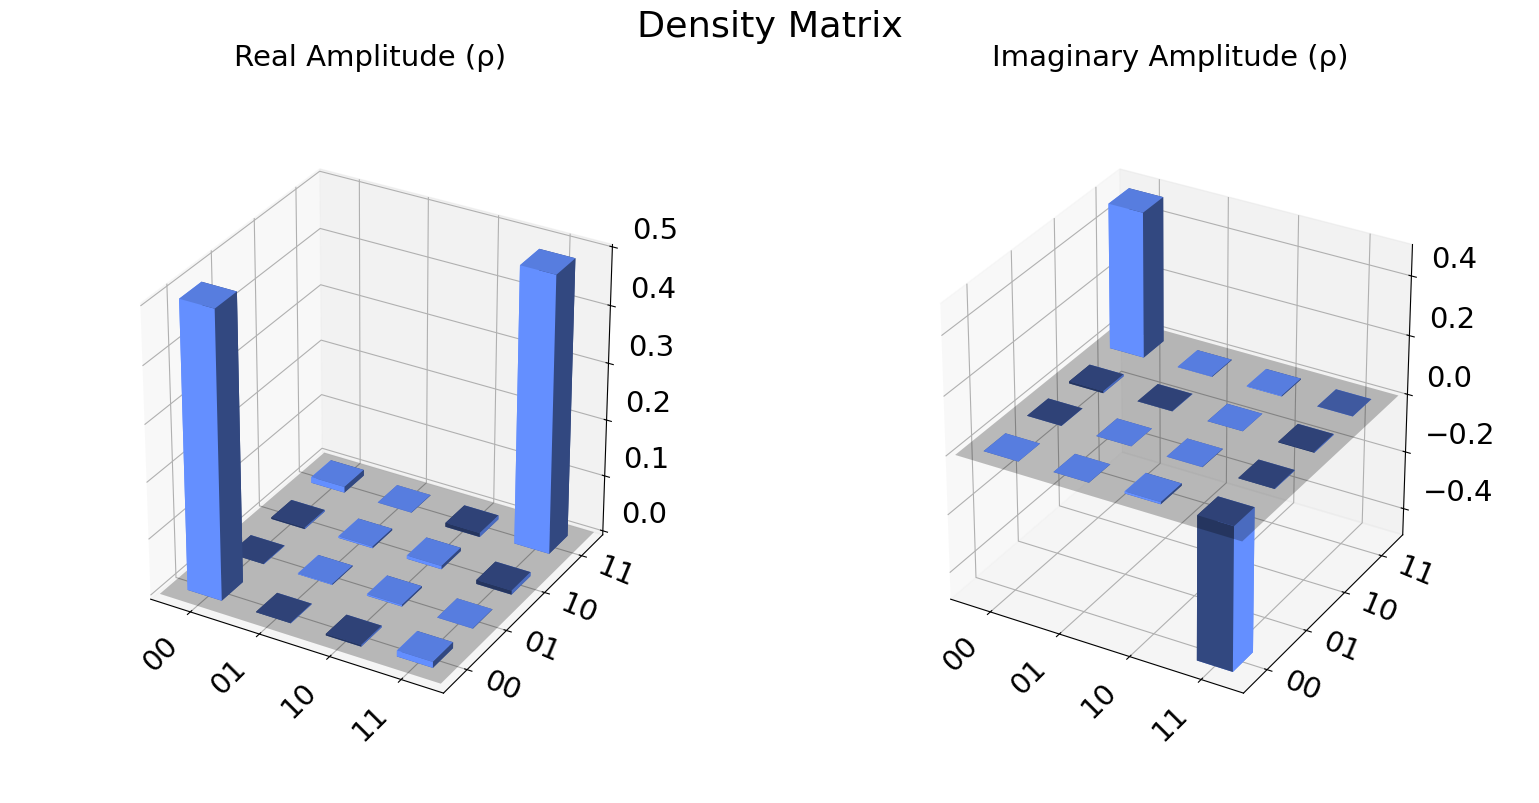

In [6]:
from qiskit import QuantumCircuit
from qiskit_experiments.library import StateTomography
from qiskit.visualization import plot_state_city

nq = 2
qc_ghz = QuantumCircuit(nq)
qc_ghz.h(0)
qc_ghz.s(0)

for i in range(1, nq):
    qc_ghz.cx(0, i)

backend = Aer.get_backend("aer_simulator")
qstexp = StateTomography(qc_ghz)
qstdata = qstexp.run(backend=backend,
                     shots=1000,
                     seed_simulator=100,).block_for_results()
state_result = qstdata.analysis_results("state")
plot_state_city(state_result.value, title="Density Matrix")

In [7]:
import qiskit
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography

# GHZ State preparation circuit
nq = 2
qc_ghz = qiskit.QuantumCircuit(nq)
qc_ghz.h(0)
qc_ghz.s(0)
for i in range(1, nq):
    qc_ghz.cx(0, i)

# QST Experiment
qstexp1 = StateTomography(qc_ghz)
qstdata1 = qstexp1.run(backend, seed_simulation=100).block_for_results()

# Print results
for result in qstdata1.analysis_results():
    print(result)

AnalysisResult
- name: state
- value: DensityMatrix([[ 0.49542657+0.00000000e+00j,  0.00282196-3.52136324e-05j,
                -0.00438556+3.75413994e-03j,  0.00910416-4.91917916e-01j],
               [ 0.00282196+3.52136324e-05j,  0.00506313+0.00000000e+00j,
                 0.00574857+1.05160009e-04j, -0.00195674+1.34573280e-03j],
               [-0.00438556-3.75413994e-03j,  0.00574857-1.05160009e-04j,
                 0.00667389-4.33680869e-19j, -0.00607687+9.06378400e-03j],
               [ 0.00910416+4.91917916e-01j, -0.00195674-1.34573280e-03j,
                -0.00607687-9.06378400e-03j,  0.4928364 -1.73472348e-18j]],
              dims=(2, 2))
- quality: unknown
- extra: <9 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: state_fidelity
- value: 0.9860494030239524
- quality: unknown
- extra: <9 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: positive
- value: True
- quality: unknown
- extra: <9 items>
- device

In [136]:
kernel = QuantumCircuit(3,3)
kernel.h(1)
kernel.h(2)

kernel.barrier()
kernel.mcry(np.pi,[1,2],0)
kernel.barrier()

kernel.x(2)
kernel.barrier()
kernel.mcry(0,[1,2],0)
kernel.barrier()
kernel.x(2)

kernel.x(1)
kernel.barrier()
kernel.mcry(0,[1,2],0)
kernel.barrier()
kernel.x(1)

kernel.x(1)
kernel.x(2)
kernel.barrier()
kernel.mcry(0,[1,2],0)
kernel.barrier()
kernel.x(2)
kernel.x(1)

kernel.h([0,1,2])

In [140]:
frqi_qft =frqi.from_instructions(frqi)
frqi_qft = Statevector(frqi_qft)

kernel_qft =kernel.from_instructions(kernel)
kernel_qft = Statevector(kernel_qft)
#print(frqi_qft, kernel_qft)

element_wise = frqi_qft.data * kernel_qft.data
element_wise_result_state = Statevector(element_wise)
print(element_wise)

[ 5.83787691e-01+0.j  4.42143777e-19-0.j  6.42680150e-19+0.j
 -6.12876368e-36+0.j  4.08840679e-02+0.j  1.65339598e-01+0.j
  8.46604021e-02+0.j  4.08840679e-02-0.j]


In [142]:
element_wise_ifft = np.fft.ifft(element_wise)
element_wise_ifft

array([0.11444448+0.j        , 0.05686253-0.02881032j,
       0.06750142+0.01555694j, 0.07886337-0.00764522j,
       0.06288856+0.j        , 0.07886337+0.00764522j,
       0.06750142-0.01555694j, 0.05686253+0.02881032j])

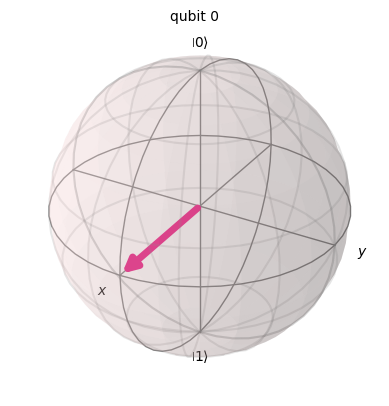

In [245]:
hgate=QuantumCircuit(1,1)
hgate.h(0)
state_hgate=Statevector(hgate)
plot_bloch_multivector(state_hgate)

{'1 0': 523, '0 0': 501}


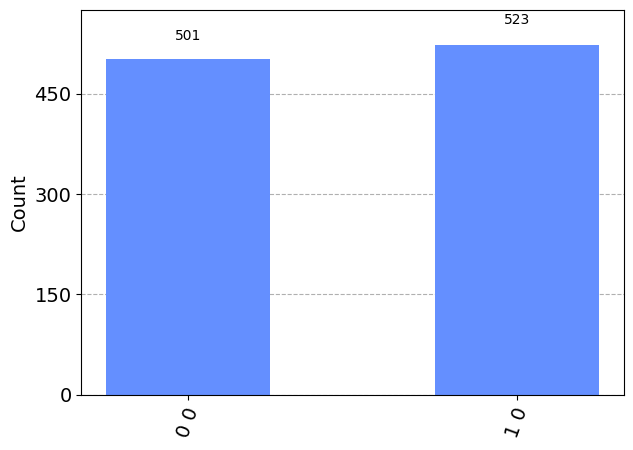

In [246]:
hgate.measure_all()
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(hgate, simulator)
job = execute(compiled_circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)
plot_histogram(counts)

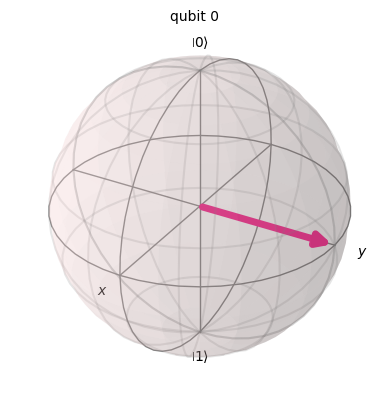

In [247]:
hgate_phase=QuantumCircuit(1,1)
hgate_phase.h(0)
hgate_phase.rz(np.pi/2,0)
state_hgate_phase=Statevector(hgate_phase)
plot_bloch_multivector(state_hgate_phase)


{'1 0': 531, '0 0': 493}


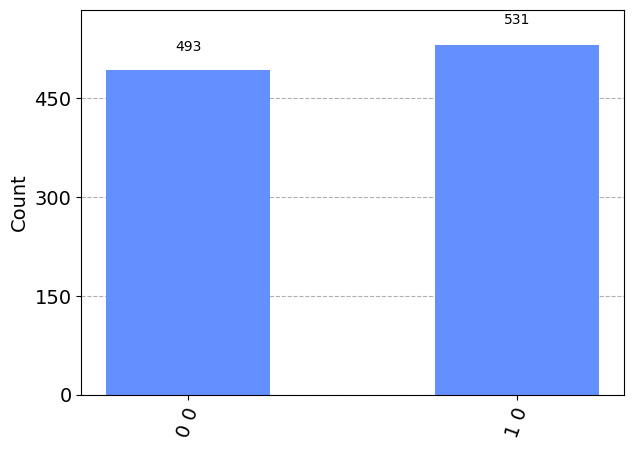

In [248]:
hgate_phase.measure_all()
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(hgate_phase, simulator)
job = execute(compiled_circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)
plot_histogram(counts)

In [117]:
from qiskit import QuantumCircuit, Aer, transpile, execute
import numpy as np

# 1. Image and Filter definition
image = [0, 50, 127, 255]
filter_ = [0, 0, 0, 1]
n_qubits = int(np.log2(len(image)))

# 2. QFT Quantum Circuit
def qft_circuit(data, n_qubits):
    qc = QuantumCircuit(n_qubits)
    # Angular encoding
    for i, value in enumerate(data):
        bin_index = format(i, f"0{n_qubits}b")
        for j, bit in enumerate(bin_index):
            if bit == '1':
                qc.x(n_qubits - j - 1)
        qc.p(2 * np.pi * value / 255, range(n_qubits))  # Angular Encoding
    
    # QFT
    for i in range(n_qubits):
        qc.h(i)
        for j in range(i+1, n_qubits):
            qc.cp(np.pi / (2 ** (j-i)), j, i)
    
    qc.barrier()
    return qc

# 3. Simulate QFT Circuit
def simulate_qft(qc, n_qubits):
    simulator = Aer.get_backend('statevector_simulator')
    transpiled = transpile(qc, simulator)
    job = execute(transpiled, backend=simulator)
    result = job.result()
    statevector = result.get_statevector()
    return statevector

# QFT on image and filter
qc_image = qft_circuit(image, n_qubits)
qc_filter = qft_circuit(filter_[::-1], n_qubits)  # Filter flipped for circular convolution

qft_image = simulate_qft(qc_image, n_qubits)
qft_filter = simulate_qft(qc_filter, n_qubits)

# 4. Element-wise Multiplication in Quantum State
qft_result = np.array(qft_image) * np.array(qft_filter)

# 5. Inverse FFT using Numpy
ifft_circular_result = np.fft.ifft(qft_result)

# 6. Coefficient adjustment
factor = 1 / len(image)
circular_conv_result = np.real(factor * ifft_circular_result)

qft_image, qft_filter, qft_result, circular_conv_result


(Statevector([-0.49864523+0.03678228j, -0.49864523+0.03678228j,
              -0.49864523+0.03678228j, -0.49864523+0.03678228j],
             dims=(2, 2)),
 Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
             dims=(2, 2)),
 array([-0.24932261+0.01839114j, -0.24932261+0.01839114j,
        -0.24932261+0.01839114j, -0.24932261+0.01839114j]),
 array([-0.06233065,  0.        ,  0.        ,  0.        ]))

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


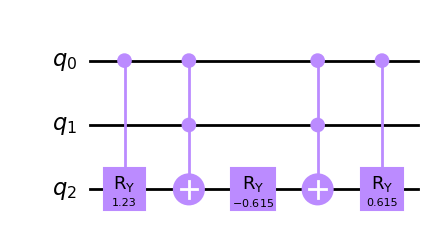

In [141]:
from qiskit.circuit.library import RYGate
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
theta = 1.23

# MCMTÎ°ú ÏßÅÏ†ë Ï∂îÍ∞ÄÌïòÏßÄ ÏïäÍ≥† Í∞úÎ≥Ñ Í≤åÏù¥Ìä∏Î•º Íµ¨ÏÑ±
qc.cry(theta, 0, 2)
qc.ccx(0, 1, 2)
qc.ry(-theta / 2, 2)
qc.ccx(0, 1, 2)
qc.cry(theta / 2, 0, 2)

qc.draw('mpl')


{'0000': 6701, '1101': 456, '0101': 999, '1011': 962, '0011': 416, '0111': 223, '0001': 6, '1001': 228, '1111': 9}


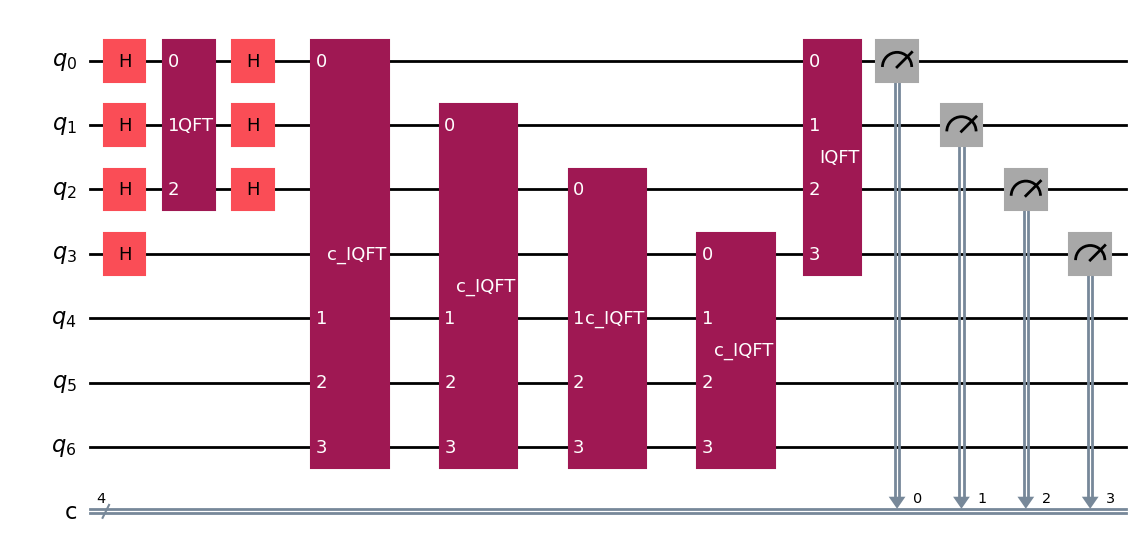

In [228]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
import numpy as np

# Number of qubits for image encoding (data qubits)
n_data = 3  # ÏòàÏ†úÏóêÏÑúÎäî 3Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÌÅêÎπÑÌä∏ ÏÇ¨Ïö©
n_ancilla = 4  # ÏúÑÏÉÅÏùÑ Ï∏°Ï†ïÌï† Î≥¥Ï°∞ ÌÅêÎπÑÌä∏ Í∞úÏàò

# Ï†ÑÏ≤¥ ÌÅêÎπÑÌä∏ Ïàò (Ancilla + Data)
n_total = n_data + n_ancilla

# Create Quantum Circuit
qc = QuantumCircuit(n_total, n_ancilla)

# Step 1: Image encoding (FRQI Î∞©ÏãùÏùÄ Ïó¨Í∏∞ÏóêÏÑú Í∞ÑÎûµÌôî)
# ÏòàÏ†úÏóêÏÑúÎäî |111> ÏÉÅÌÉúÎ•º Ï§ÄÎπÑ
qc.h(range(n_data))

# Step 2: Apply QFT (Fourier Transform to Frequency Domain)
qc.append(QFT(n_data), range(n_data))

# Step 3: Quantum Phase Estimation (QPE)
# 3.1 Apply Hadamard gates to Ancilla qubits
qc.h(range(n_ancilla))

# 3.2 Controlled-U gates (U = Inverse QFT)
for i in range(n_ancilla):
    qc.append(QFT(n_data).inverse().control(), [i] + list(range(n_ancilla, n_total)))

# 3.3 Apply inverse QFT on Ancilla qubits
qc.append(QFT(n_ancilla).inverse(), range(n_ancilla))

# Step 4: Measurement of Ancilla qubits
qc.measure(range(n_ancilla), range(n_ancilla))

# Run on Simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)

result = simulator.run(compiled_circuit, shots=10000).result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)

# Quantum Circuit Î≥¥Í∏∞
qc.draw('mpl')


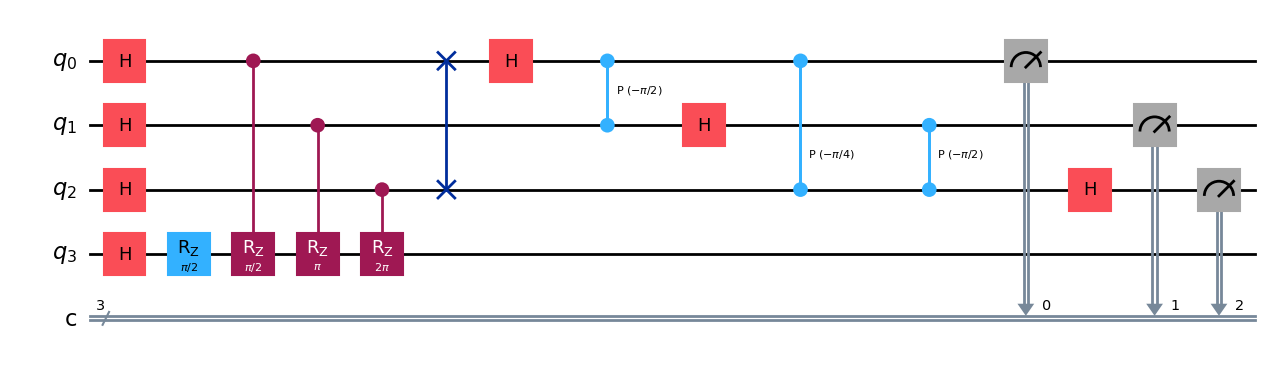

In [227]:
qc.draw('mpl')

{'1110': 93, '1010': 69, '0001': 46, '1000': 94, '0000': 89, '0111': 39, '1100': 83, '0100': 90, '0010': 84, '1001': 43, '0110': 90, '0011': 38, '1101': 33, '0101': 49, '1111': 48, '1011': 36}


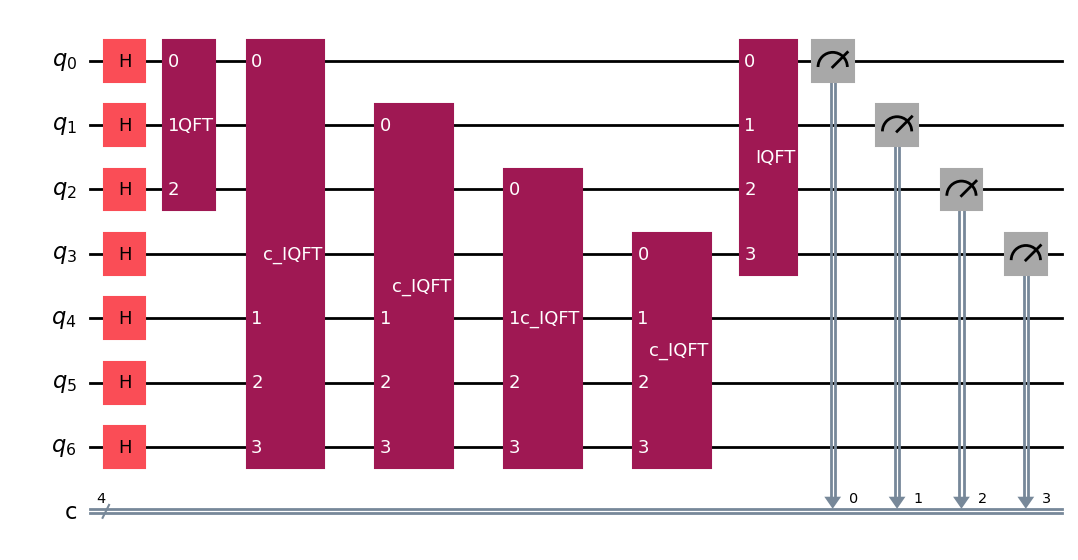

In [38]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.circuit.library import QFT
import numpy as np

# Number of qubits for image encoding (data qubits)
n_data = 3  # ÏòàÏ†úÏóêÏÑúÎäî 3Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÌÅêÎπÑÌä∏ ÏÇ¨Ïö©
n_ancilla = 4  # ÏúÑÏÉÅÏùÑ Ï∏°Ï†ïÌï† Î≥¥Ï°∞ ÌÅêÎπÑÌä∏ Í∞úÏàò

# Ï†ÑÏ≤¥ ÌÅêÎπÑÌä∏ Ïàò (Ancilla + Data)
n_total = n_data + n_ancilla

# Create Quantum Circuit
qc = QuantumCircuit(n_total, n_ancilla)

# Step 1: Image encoding (FRQI Î∞©ÏãùÏùÄ Ïó¨Í∏∞ÏóêÏÑú Í∞ÑÎûµÌôî)
# ÏòàÏ†úÏóêÏÑúÎäî |111> ÏÉÅÌÉúÎ•º Ï§ÄÎπÑ
qc.h(range(n_data))

# Step 2: Apply QFT (Fourier Transform to Frequency Domain)
qc.append(QFT(n_data), range(n_data))

# Step 3: Quantum Phase Estimation (QPE)
# 3.1 Apply Hadamard gates to Ancilla qubits
qc.h(range(n_data, n_total))

# 3.2 Controlled-U gates (U = Inverse QFT)
for i in range(n_ancilla):
    qc.append(QFT(n_data).inverse().control(), [i] + list(range(n_ancilla, n_total)))

# 3.3 Apply inverse QFT on Ancilla qubits
qc.append(QFT(n_ancilla).inverse(), range(n_ancilla))

# Step 4: Measurement of Ancilla qubits
qc.measure(range(n_ancilla), range(n_ancilla))

# Run on Simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
#qobj = assemble(compiled_circuit, shots=1000)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()

# Í≤∞Í≥º Ï∂úÎ†•
print(counts)

# Quantum Circuit Î≥¥Í∏∞
qc.draw('mpl')


In [42]:
import numpy as np

# ÏòàÏ†ú: Ï∏°Ï†ï Í≤∞Í≥º (ÏÉ∑ Ïàò Í∏∞Ï§Ä, ÏùºÎ∞òÏ†ÅÏù∏ n-qubit ÏºÄÏù¥Ïä§)
result_counts = {
    '000': 530, '001': 520, '010': 470, '011': 480,
    '100': 530, '101': 520, '110': 510, '111': 490
}

# Ï†ÑÏ≤¥ Ï∏°Ï†ï ÏÉ∑ Ïàò
total_shots = sum(result_counts.values())

# Í∞Å stateÏùò ÌôïÎ•† Í≥ÑÏÇ∞
prob = {state: count / total_shots for state, count in result_counts.items()}

# Í∏∞Ï§Ä state ÏÑ§Ï†ï (Ïòà: '000')
reference_state = '000'

# Î™®Îì† stateÏóê ÎåÄÌï¥ ÏúÑÏÉÅ Î≥µÏõê
phases = {}
for state in result_counts.keys():
    if state != reference_state:
        phases[state] = np.angle(prob[state] / prob[reference_state])

# Í≤∞Í≥º Ï∂úÎ†•
for state, phase in phases.items():
    print(f"ÏúÑÏÉÅ Î≥µÏõê Í≤∞Í≥º for {state}: {phase:.4f} ÎùºÎîîÏïà")


ÏúÑÏÉÅ Î≥µÏõê Í≤∞Í≥º for 001: 0.0000 ÎùºÎîîÏïà
ÏúÑÏÉÅ Î≥µÏõê Í≤∞Í≥º for 010: 0.0000 ÎùºÎîîÏïà
ÏúÑÏÉÅ Î≥µÏõê Í≤∞Í≥º for 011: 0.0000 ÎùºÎîîÏïà
ÏúÑÏÉÅ Î≥µÏõê Í≤∞Í≥º for 100: 0.0000 ÎùºÎîîÏïà
ÏúÑÏÉÅ Î≥µÏõê Í≤∞Í≥º for 101: 0.0000 ÎùºÎîîÏïà
ÏúÑÏÉÅ Î≥µÏõê Í≤∞Í≥º for 110: 0.0000 ÎùºÎîîÏïà
ÏúÑÏÉÅ Î≥µÏõê Í≤∞Í≥º for 111: 0.0000 ÎùºÎîîÏïà


In [2]:
n = 200
k = 100

start = time.time()
x = np.sin(n*np.pi/510) * np.cos(k * np.pi / (3 *n))
y = np.sin(n*np.pi/510) * np.sin(k * np.pi / (3 *n))
z = np.cos(n*np.pi/510)
phi = round(np.arctan2(y,x),4) / 2
theta = round(np.arccos(z),4) / 2
Q = np.array([x,y,z])

c_reg = QuantumRegister(1,name='c_reg')
color = QuantumRegister(1, name='color = [200,100,0]')
classic = ClassicalRegister(2, name = 'classical')
qc = QuantumCircuit(c_reg,color, classic)
qc.h(1)
qc.barrier()
qc.cry(theta,color,c_reg)
qc.barrier()
qc.x(1)
qc.barrier()
qc.cry(phi,color,c_reg)
qc.barrier()
qc.x(1)
qc.measure([0,1],[0,1])

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=200000)
job = aer_sim.run(qobj)
result = job.result()
counts = result.get_counts()
counts

C:\Users\HCI\AppData\Local\Temp\ipykernel_8340\2336452204.py:30: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = aer_sim.run(qobj)


{'10': 90999, '00': 98270, '11': 8966, '01': 1765}

C:\Users\HCI\AppData\Local\Temp\ipykernel_8340\1224835838.py:30: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = aer_sim.run(qobj)


0.40108 s
[array([201.36527588, 100.92918952,   0.        ])]


C:\Users\HCI\AppData\Local\Temp\ipykernel_8340\1224835838.py:102: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(1,1,c=colors, marker='o')


Text(0, 0.5, 'Green')

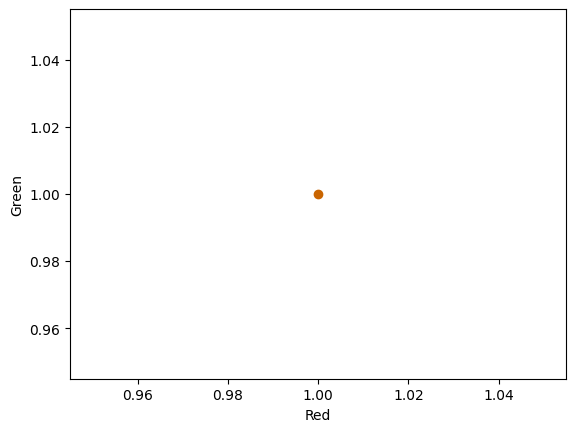

In [75]:
n = 200
k = 100

start = time.time()
x = np.sin(n*np.pi/510) * np.cos(k * np.pi / (3 *n))
y = np.sin(n*np.pi/510) * np.sin(k * np.pi / (3 *n))
z = np.cos(n*np.pi/510)
phi = round(np.arctan2(y,x),4) / 2
theta = round(np.arccos(z),4) / 2
Q = np.array([x,y,z])

c_reg = QuantumRegister(1,name='c_reg')
color = QuantumRegister(1, name='color = [200,100,0]')
classic = ClassicalRegister(2, name = 'classical')
qc = QuantumCircuit(c_reg,color, classic)
qc.h(1)
qc.barrier()
qc.cry(theta,color,c_reg)
qc.barrier()
qc.x(1)
qc.barrier()
qc.cry(phi,color,c_reg)
qc.barrier()
qc.x(1)
qc.measure([0,1],[0,1])

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=200000)
job = aer_sim.run(qobj)
result = job.result()
counts = result.get_counts()

pixel_color_theta_recon = []
pixel_color_phi_recon = []

pixel_color_theta = []
pixel_color_phi = []

for i in range(0, 1):
    for item in counts.items():
        key = item[0]
        amount = item[1]
        state = key[-1]
        decision = int(key[0])
        bin_coord = key[1:-1]

        if decision == 1:
            pixel_color_theta.append((state, amount))
        elif decision == 0:
            pixel_color_phi.append((state, amount))

# ======================== phi ====================================
total_phi_value = 0
for state in pixel_color_phi:
    state_value = state[1]
    total_phi_value += state_value

phi_state_0 = []
for phi, amount in pixel_color_phi:
    if not int(theta):
        phi_state_0.append((phi, amount))

for i in range(1):
    try:
        theta = np.arccos((phi_state_0[i][1]/total_phi_value)**(1/2))
        pixel_color_phi_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")
# ======================== theta ====================================

total_theta_value = 0
for state in pixel_color_theta:
    state_value = state[1]
    total_theta_value += state_value

theta_state_0 = []
for theta, amount in pixel_color_theta:
    if not int(theta):
        theta_state_0.append((theta, amount))

for i in range(1):
    try:
        theta = np.arccos((theta_state_0[i][1]/total_theta_value)**(1/2))
        pixel_color_theta_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")

recon_color = []
for i in range(len(pixel_color_phi_recon)):
    n_recon = pixel_color_theta_recon[i] * 1020 / np.pi
    k_recon = pixel_color_phi_recon[i] * 6 * n_recon / np.pi
    recon_color.append(np.array([n_recon,k_recon,0]))
end = time.time()
time_simul = end - start
print(f'{time_simul:.5f}', "s")
print(recon_color)
recon_color_index = recon_color[0]
fig = plt.figure()
ax = fig.add_subplot(111)
colors = recon_color_index / 255
ax.scatter(1,1,c=colors, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')

In [76]:
error = []
for i in range(1):
    del_x = recon_color[0][0] - n
    del_y = recon_color[0][1] - k
    err = del_x**2+del_y**2
    error.append(err)

print("error = ",error,"time = ", time_simul)

error =  [2.727371395714162] time =  0.40108275413513184


In [59]:
from qiskit_ionq import IonQProvider
provider = IonQProvider("api")

364.76714634895325 s
[array([206.00513058, 120.23284475,   0.        ])]


C:\Users\HCI\AppData\Local\Temp\ipykernel_8340\1410872363.py:100: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(1,1,c=colors_ionq, marker='o')


Text(0, 0.5, 'Green')

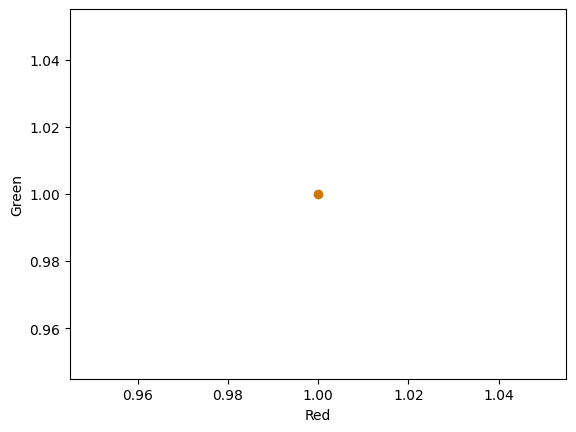

In [80]:
n = 200
k = 100

start = time.time()
x = np.sin(n*np.pi/510) * np.cos(k * np.pi / (3 *n))
y = np.sin(n*np.pi/510) * np.sin(k * np.pi / (3 *n))
z = np.cos(n*np.pi/510)
phi = round(np.arctan2(y,x),4) / 2
theta = round(np.arccos(z),4) / 2
Q = np.array([x,y,z])

c_reg = QuantumRegister(1,name='c_reg')
color = QuantumRegister(1, name='color = [200,100,0]')
classic = ClassicalRegister(2, name = 'classical')
qc = QuantumCircuit(c_reg,color, classic)
qc.h(1)
qc.barrier()
qc.cry(theta,color,c_reg)
qc.barrier()
qc.x(1)
qc.barrier()
qc.cry(phi,color,c_reg)
qc.barrier()
qc.x(1)
qc.measure([0,1],[0,1])

ionq_sim = provider.get_backend("ionq_simulator")
t_qc_image = transpile(qc, ionq_sim)
job_ionq = ionq_sim.run(t_qc_image, shots=200000, noise_model="aria-1")
result_ionq = job_ionq.result()
counts_ionq = result_ionq.get_counts()

pixel_color_theta_recon = []
pixel_color_phi_recon = []

pixel_color_theta = []
pixel_color_phi = []

for i in range(0, 1):
    for item in counts_ionq.items():
        key = item[0]
        amount = item[1]
        state = key[-1]
        decision = int(key[0])
        bin_coord = key[1:-1]

        if decision == 1:
            pixel_color_theta.append((state, amount))
        elif decision == 0:
            pixel_color_phi.append((state, amount))

# ======================== phi ====================================
total_phi_value = 0
for state in pixel_color_phi:
    state_value = state[1]
    total_phi_value += state_value

phi_state_0 = []
for phi, amount in pixel_color_phi:
    if not int(theta):
        phi_state_0.append((phi, amount))

for i in range(1):
    try:
        theta = np.arccos((phi_state_0[i][1]/total_phi_value)**(1/2))
        pixel_color_phi_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")
# ======================== theta ====================================

total_theta_value = 0
for state in pixel_color_theta:
    state_value = state[1]
    total_theta_value += state_value

theta_state_0 = []
for theta, amount in pixel_color_theta:
    if not int(theta):
        theta_state_0.append((theta, amount))

for i in range(1):
    try:
        theta = np.arccos((theta_state_0[i][1]/total_theta_value)**(1/2))
        pixel_color_theta_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")

recon_color_ionq = []
for i in range(len(pixel_color_phi_recon)):
    n = pixel_color_theta_recon[i] * 1020 / np.pi
    k = pixel_color_phi_recon[i] * 6 * n / np.pi
    recon_color_ionq.append(np.array([n,k,0]))
end = time.time()
print(f'{end - start}', "s")
print(recon_color_ionq)
recon_color__ionq_index = recon_color_ionq[0]
fig = plt.figure()
ax = fig.add_subplot(111)
colors_ionq = recon_color__ionq_index / 255
ax.scatter(1,1,c=colors_ionq, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')

In [ ]:
error_ionq = []
for i in range(1):
    del_x = recon_color_ionq[0][0] - n
    del_y = recon_color_ionq[0][1] - k
    err_ionq = np.sqrt(del_x**2+del_y**2)
    error_ionq.append(err)

print("error = ",error_ionq,"time = ", time_simul)

error =  [1.651475520773518] time =  0.40108275413513184


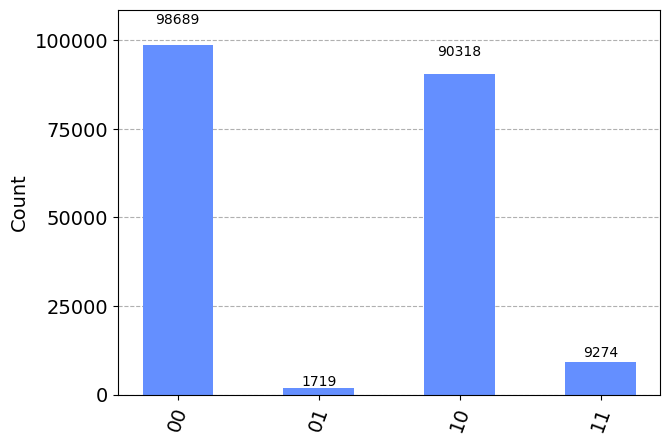

In [ ]:
plot_histogram(counts_ionq)

In [ ]:
qc.draw('mpl')

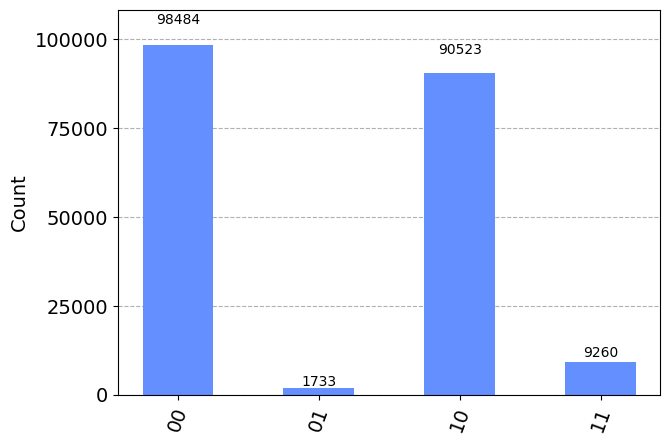

In [26]:
plot_histogram(counts)

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


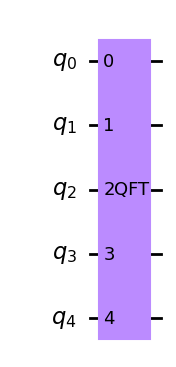

In [3]:
from qiskit.circuit.library import QFT

qft = QFT(5)
qft.draw('mpl')